# UpGrad PGDDS Group Assignment (Capstone)

Market Mixed Model for each category of product in the catalog.

## 1. Observation & Quality Analysis of Data

### 1.1 Importing necessary libraries

In [1]:
# import numpy and pandas
import pandas as pd
import numpy as np

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# do an inline so that plt.show() is not required everytime
%matplotlib inline

# import for pre-processing (Standard Scaling)
from sklearn.preprocessing import StandardScaler 

# test train split and Hyperparameter Optimization
from sklearn.model_selection import train_test_split, GridSearchCV

# import for looking into seasonality in data
from statsmodels.tsa.seasonal import seasonal_decompose

# import for Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

# import for best feature selection
from sklearn.feature_selection import RFE

# import for building model
from sklearn import linear_model
import statsmodels.api as sm

# import for model metrics and vif calculation
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Checking version of imported libraries
np.__version__, pd.__version__, sns.__version__

('1.16.4', '0.24.2', '0.9.0')

### 1.2 Making configuration changes

In [3]:
# Making miscellaneous setting for better experience
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_rows", 250)
pd.set_option("display.max_columns", 250)

### 1.3 Reading & Reviewing datasets

In [4]:
# Importing the 'ConsumerElectronics.csv' dataset
df_data = pd.read_csv('ConsumerElectronics.csv')

In [5]:
# Understanding the dataset | Shape
df_data.shape

(1648824, 20)

In [6]:
# Understanding the dataset | Meta Data
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
fsn_id                             1648824 non-null object
order_date                         1648824 non-null object
Year                               1648824 non-null int64
Month                              1648824 non-null int64
order_id                           1648824 non-null float64
order_item_id                      1648824 non-null float64
gmv                                1648824 non-null object
units                              1648824 non-null int64
deliverybdays                      1648824 non-null object
deliverycdays                      1648824 non-null object
s1_fact.order_payment_type         1648824 non-null object
sla                                1648824 non-null int64
cust_id                            1648824 non-null object
pincode                            1648824 non-null object
product_analytic_super_category    1648824 non-null object
prod

In [7]:
# Understanding the dataset | Data Content
df_data.describe()

Year         Month      order_id  order_item_id         units  \
count  1.648824e+06  1.648824e+06  1.648824e+06   1.648824e+06  1.648824e+06   
mean   2.015519e+03  6.585650e+00  2.842445e+15   1.375628e+16  1.022087e+00   
std    4.996557e-01  3.623351e+00  1.269134e+15   5.594598e+16  2.535318e-01   
min    2.015000e+03  1.000000e+00  7.633152e+07   1.080165e+08  1.000000e+00   
25%    2.015000e+03  3.000000e+00  1.602589e+15   1.606725e+15  1.000000e+00   
50%    2.016000e+03  6.000000e+00  2.611825e+15   2.619185e+15  1.000000e+00   
75%    2.016000e+03  1.000000e+01  3.610614e+15   4.397706e+15  1.000000e+00   
max    2.016000e+03  1.200000e+01  5.395077e+15   3.000373e+17  5.000000e+01   

                sla   product_mrp  product_procurement_sla  
count  1.648824e+06  1.648824e+06             1.648824e+06  
mean   5.687832e+00  4.108309e+03             5.403451e+00  
std    2.983336e+00  8.510918e+03             5.346618e+01  
min    0.000000e+00  0.000000e+00            -1.000000e+00  
25%    4.000000e+00  7.990000e+02             1.000000e+00  
50%    6.000000e+00  1.599000e+03             2.000000e+00  
75%    7.000000e+00  3.499000e+03             3.000000e+00  
max    1.006000e+03  2.999990e+05             1.000000e+03

In [8]:
# Understanding the dataset | Sample Data
df_data.head()

fsn_id           order_date  Year  Month      order_id  \
0  ACCCX3S58G7B5F6P  2015-10-17 15:11:54  2015     10  3.419301e+15   
1  ACCCX3S58G7B5F6P  2015-10-19 10:07:22  2015     10  1.420831e+15   
2  ACCCX3S5AHMF55FV  2015-10-20 15:45:56  2015     10  2.421913e+15   
3  ACCCX3S5AHMF55FV  2015-10-14 12:05:15  2015     10  4.416592e+15   
4  ACCCX3S5AHMF55FV  2015-10-17 21:25:03  2015     10  4.419525e+15   

   order_item_id   gmv  units deliverybdays deliverycdays  \
0   3.419301e+15  6400      1            \N            \N   
1   1.420831e+15  6900      1            \N            \N   
2   2.421913e+15  1990      1            \N            \N   
3   4.416592e+15  1690      1            \N            \N   
4   4.419525e+15  1618      1            \N            \N   

  s1_fact.order_payment_type  sla                 cust_id  \
0                        COD    5  -1.01299130778588E+018   
1                        COD    7  -8.99032457905512E+018   
2                        COD   10   -1.0404429420466E+018   
3                    Prepaid    4  -7.60496084352714E+018   
4                    Prepaid    6    2.8945572083453E+018   

                  pincode product_analytic_super_category  \
0  -7.79175582905735E+018                              CE   
1   7.33541149097431E+018                              CE   
2  -7.47768776228657E+018                              CE   
3  -5.83593163877661E+018                              CE   
4   5.34735360997242E+017                              CE   

  product_analytic_category product_analytic_sub_category  \
0           CameraAccessory               CameraAccessory   
1           CameraAccessory               CameraAccessory   
2           CameraAccessory               CameraAccessory   
3           CameraAccessory               CameraAccessory   
4           CameraAccessory               CameraAccessory   

  product_analytic_vertical  product_mrp  product_procurement_sla  
0              CameraTripod         7190                        0  
1              CameraTripod         7190                        0  
2              CameraTripod         2099                        3  
3              CameraTripod         2099                        3  
4              CameraTripod         2099                        3

### 1.4 Data Pre-processing

#### 1.4.1 Column Value Analysis & Treatment

In [9]:
# Dropping duplicate values
df_data.drop_duplicates(inplace=True)

In [10]:
df_data['Year'].unique() #Values are okay

array([2015, 2016], dtype=int64)

In [11]:
df_data['Month'].unique() #Values are okay

array([10, 11,  4,  3,  9,  2,  1, 12,  8,  5,  6,  7], dtype=int64)

In [12]:
df_data['gmv'].unique()

array(['6400', '6900', '1990', ..., '2686', '12330', '3225'], dtype=object)

In [13]:
# gmv is numeric entry, however dtype is object, thus it contains non-numeric values
import re
non_nemeric_values = [i for i in list(df_data['gmv'].unique()) if not re.match(r'[+-]?([0-9]*[.])?[0-9]+', str(i))]
non_nemeric_values

[' ']

In [14]:
# Removing the blank space from gvm
df_data['gmv'] = df_data['gmv'].replace(' ', np.nan)

In [15]:
df_data['units'].unique() #Values are okay

array([ 1,  2, 10,  4,  3,  6, 50, 30,  7,  8,  5, 12, 34, 22, 17,  9, 13,
       11, 15, 21, 29, 16, 39, 20, 18, 14, 19], dtype=int64)

In [16]:
df_data['deliverybdays'].unique()

array(['\\N', '5', '4', '12', '6', '7', '8', '3', '9', '10', '2', '16',
       '14', '13', '20', '11', '1', '18', '32', '15', '238', '153', '74',
       '128', '148', '145', '147', '135', '124', '94', '111', '101',
       '105', '104', '98', '86', '106', '103', '99', '91', '96', '93',
       '100', '102', '95', '97', '92', '88', '87', '114', '120', '115',
       '132', '70', '83', '72', '0', '73', '76', '67', '75', '68', '65',
       '84', '63', '82', '81', '79', '64', '69', '61', '59', '60', '78',
       '66', '62', '71', '77', '80', '85', '90', '22', '23', '36', '19',
       '17', '35', '26', '29', '25', '45', '40', '47', '56', '55', '42',
       '49', '57', '37', '38', '58', '34', '50', '44', '39', '54', '51',
       '52', '48', '43', '46', '53', '33', '41', '21', '27', '31', '24',
       '-71', '-72', '-53', '-40', '-39', '-41', '28', '30', '-14', '-45',
       '-56', '-73', '-75', '-12', '-22', '-44', '-42', '-43', '-74',
       '-13', '-98', '-46', '-76', '-10', '-77'], dtype=obj

In [17]:
# Removing the \\N from deliverybdays
df_data['deliverybdays'] = df_data['deliverybdays'].replace('\\N', np.nan)

In [18]:
df_data['deliverycdays'].unique()

array(['\\N', '6', '5', '14', '7', '9', '4', '11', '12', '3', '8', '19',
       '17', '16', '23', '13', '2', '20', '10', '15', '37', '1', '18',
       '278', '178', '87', '149', '172', '169', '157', '145', '109',
       '130', '118', '123', '122', '114', '101', '120', '115', '106',
       '112', '108', '110', '117', '124', '119', '111', '113', '107',
       '100', '116', '121', '103', '102', '133', '140', '134', '154',
       '82', '97', '84', '83', '85', '89', '86', '79', '88', '76', '98',
       '74', '96', '95', '92', '75', '81', '73', '71', '69', '70', '91',
       '77', '94', '72', '80', '78', '90', '99', '21', '26', '27', '42',
       '22', '41', '31', '30', '34', '29', '24', '53', '47', '55', '65',
       '49', '57', '66', '43', '45', '68', '40', '67', '38', '59', '52',
       '51', '46', '63', '44', '60', '61', '56', '50', '64', '54', '62',
       '58', '39', '48', '32', '36', '28', '0', '-832', '-840', '-628',
       '-836', '-834', '-476', '-466', '-848', '-844', '-482', '25'

In [19]:
# Removing the \\N from deliverycdays
df_data['deliverycdays'] = df_data['deliverycdays'].replace('\\N', np.nan)

In [20]:
df_data['s1_fact.order_payment_type'].unique()

array(['COD', 'Prepaid'], dtype=object)

In [21]:
df_data['sla'].unique() #Values are okay, outliers will be treated later

array([   5,    7,   10,    4,    6,    9,    8,    2,    3,   12,    1,
         13,   11,   14,   19,   15,   17,   16,   20,   18,    0,   21,
         25,   22,   41,   23,   39,   40,   33,  184,   38,   27,   35,
         42,   28,   37,   26,   60,  175,  145,   56,   24,   29,   30,
         31,   45,   44,   32, 1004, 1006,   34,   46,   61,   52,   51,
         36,   43,   68,  239,   47], dtype=int64)

In [22]:
df_data['pincode'].unique() #Values are okay but in scientific notation

array(['-7.79175582905735E+018', '7.33541149097431E+018',
       '-7.47768776228657E+018', ..., '-3.82849698897366E+018',
       '9.10213833569318E+018', '7.79889977174575E+018'], dtype=object)

In [23]:
# pincode is numeric entry, however dtype is object, thus it contains non-numeric values
non_nemeric_values = [i for i in list(df_data['pincode'].unique()) if not re.match(r'[+-]?([0-9]*[.])?[0-9]+', str(i))]
non_nemeric_values

[' ']

In [24]:
# Removing the blank space from pincode
df_data['pincode'] = df_data['pincode'].replace(' ', np.nan)

In [25]:
df_data['product_analytic_super_category'].unique()

array(['CE'], dtype=object)

In [26]:
df_data['product_analytic_category'].unique()

array(['CameraAccessory', 'GamingHardware', 'EntertainmentSmall',
       'GameCDDVD', 'Camera'], dtype=object)

In [27]:
df_data['product_analytic_sub_category'].unique()

array(['CameraAccessory', 'GamingAccessory', 'Speaker', 'HomeAudio',
       'CameraStorage', 'AmplifierReceiver', 'AudioMP3Player', 'Game',
       'Camera', 'GamingConsole', 'HomeTheatre', 'AudioAccessory',
       'TVVideoSmall', 'GameMembershipCards'], dtype=object)

In [28]:
df_data['product_analytic_vertical'].unique()

array(['CameraTripod', 'Lens', 'CameraBag', 'Flash', 'CameraBattery',
       'CameraBatteryCharger', 'GamePad', 'GamingAccessoryKit',
       'GamingHeadset', 'GamingMemoryCard', 'MotionController',
       'GamingMouse', 'GamingAdapter', 'TVOutCableAccessory', 'GamingGun',
       'JoystickGamingWheel', 'LaptopSpeaker', 'HomeAudioSpeaker',
       'MobileSpeaker', 'CameraRemoteControl', 'Binoculars', 'Filter',
       'GamingMousePad', 'CameraStorageMemoryCard', 'Strap',
       'GamingKeyboard', 'Dock', '\\N', 'SlingBox', 'GamingSpeaker',
       'CoolingPad', 'AmplifierReceiver', 'AudioMP3Player',
       'PhysicalGame', 'BoomBox', 'DSLR', 'Point & Shoot',
       'Instant Cameras', 'Camcorders', 'SportsAndAction',
       'CameraBatteryGrip', 'CameraAccessory', 'CameraFilmRolls',
       'CodeInTheBoxGame', 'CameraMount', 'DockingStation',
       'DJController', 'ExtensionTube', 'FMRadio', 'GamingConsole',
       'HandheldGamingConsole', 'HiFiSystem', 'HomeTheatre',
       'KaraokePlayer', 'M

In [29]:
# Removing the \\N from product_analytic_vertical
df_data['product_analytic_vertical'] = df_data['product_analytic_vertical'].replace('\\N', np.nan)

In [30]:
df_data['product_procurement_sla'].unique()

array([   0,    3,    5,   -1,    1,    6,    2,    7,    4,   13,   14,
         10,    9,   12,    8,   15, 1000], dtype=int64)

In [31]:
# Removing the -1 from product_procurement_sla | replacing it with 0 as per TA
df_data['product_procurement_sla'] = df_data['product_procurement_sla'].replace(-1, 0)

In [32]:
# Getting min and max of product_mrp & looking for non numeric values
print(f'Min: {df_data["product_mrp"].min()} \t\t Max:{df_data["product_mrp"].max()}')

non_nemeric_values = [i for i in list(df_data['product_mrp'].unique()) if not re.match(r'[+-]?([0-9]*[.])?[0-9]+', str(i))]
non_nemeric_values

Min: 0 		 Max:299999


[]

In [33]:
# Getting min and max of gmv
print(f'Min: {pd.to_numeric(df_data["gmv"]).min()} \t Max:{pd.to_numeric(df_data["gmv"]).max()}')

Min: 0.0 	 Max:226947.0


#### 1.4.2 Datatype Analysis & Treatment

In [34]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1543981 entries, 0 to 1543996
Data columns (total 20 columns):
fsn_id                             1543981 non-null object
order_date                         1543981 non-null object
Year                               1543981 non-null int64
Month                              1543981 non-null int64
order_id                           1543981 non-null float64
order_item_id                      1543981 non-null float64
gmv                                1539943 non-null object
units                              1543981 non-null int64
deliverybdays                      335802 non-null object
deliverycdays                      335803 non-null object
s1_fact.order_payment_type         1543981 non-null object
sla                                1543981 non-null int64
cust_id                            1543981 non-null object
pincode                            1539943 non-null object
product_analytic_super_category    1543981 non-null object
produc

In [35]:
# Making order_date as date type
df_data['order_date'] = pd.to_datetime(df_data['order_date'])

In [36]:
# Making gmv as float type
df_data['gmv'] = pd.to_numeric(df_data['gmv'])

In [37]:
# Making pincode as float type
df_data['pincode'] = pd.to_numeric(df_data['pincode'])

In [38]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1543981 entries, 0 to 1543996
Data columns (total 20 columns):
fsn_id                             1543981 non-null object
order_date                         1543981 non-null datetime64[ns]
Year                               1543981 non-null int64
Month                              1543981 non-null int64
order_id                           1543981 non-null float64
order_item_id                      1543981 non-null float64
gmv                                1539943 non-null float64
units                              1543981 non-null int64
deliverybdays                      335802 non-null object
deliverycdays                      335803 non-null object
s1_fact.order_payment_type         1543981 non-null object
sla                                1543981 non-null int64
cust_id                            1543981 non-null object
pincode                            1539943 non-null float64
product_analytic_super_category    1543981 non-null obj

#### 1.4.4 Removing un-necessary columns

In [39]:
# ID columns will not be significant for our analysis, thus dropping them
df_data.drop(columns=['fsn_id','order_id','order_item_id','cust_id'], inplace=True)

In [40]:
# Pincode column contains scientific values | Also it is yet another identifier only, thus dropping it
df_data.drop(columns=['pincode'], inplace=True)

In [41]:
# Year and Month information is already available in the order_date hence they are redundant columns, thus removing them
df_data.drop(columns=['Year','Month'], inplace=True)

In [42]:
# Removing product_analytic_super_category, product_analytic_vertical and product_analytic_category since they are not much significant in analysis
df_data.drop(columns=['product_analytic_super_category','product_analytic_vertical','product_analytic_category'], inplace=True)

#### 1.4.5 Validating Business logic & removing outliers

In [43]:
# Removing the data points outside of time range (July 2015 to June 2016)
mask = (df_data['order_date'] >= '2015-07-01') & (df_data['order_date'] <= '2016-06-30')
df_data = df_data[mask]

In [44]:
# UNITS cannot be less than 1
df_data[df_data['units']<1].size

0

In [45]:
# product_mrp cannot be 0 or less | Removing such entries
print(df_data[df_data['product_mrp']<=0].size)
df_data = df_data[df_data['product_mrp']>0]

49210


In [46]:
# gmv cannot be 0 or less | Removing such entries
print(df_data[df_data['gmv']<=0].size)
df_data = df_data[df_data['gmv']>0]

9720


In [47]:
# gmv cannot be greater than mrp*unit | Removing such entries
print(df_data[df_data['gmv']>df_data['product_mrp']*df_data['units']].size)
df_data = df_data[df_data['gmv'] <= df_data['product_mrp']*df_data['units']]

301850


In [48]:
# Removing outliers | sla, product_procurement_sla, product_mrp
cols = ['sla', 'product_procurement_sla']
for col in cols:
    Q1 = df_data[col].quantile(0.25)
    Q3 = df_data[col].quantile(0.75)
    IQR = Q3 - Q1
    df_data = df_data[~((df_data[col] < (Q1 - 1.5 * IQR)) |(df_data[col] > (Q3 + 1.5 * IQR)))]

In [49]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1433568 entries, 0 to 1543996
Data columns (total 10 columns):
order_date                       1433568 non-null datetime64[ns]
gmv                              1433568 non-null float64
units                            1433568 non-null int64
deliverybdays                    318092 non-null object
deliverycdays                    318093 non-null object
s1_fact.order_payment_type       1433568 non-null object
sla                              1433568 non-null int64
product_analytic_sub_category    1433568 non-null object
product_mrp                      1433568 non-null int64
product_procurement_sla          1433568 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 120.3+ MB


#### 1.4.3 Missing Value Analysis & Treatment

In [50]:
# Understanding the dataset | Overall Percentage of Missing Values
row_with_null_count = df_data.shape[0] - df_data.dropna().shape[0]
(row_with_null_count/df_data.shape[0])*100

77.8111676599924

In [51]:
# Percentage of Missing Values per column
(df_data.isna().sum()/df_data.shape[0])*100

order_date                        0.000000
gmv                               0.000000
units                             0.000000
deliverybdays                    77.811168
deliverycdays                    77.811098
s1_fact.order_payment_type        0.000000
sla                               0.000000
product_analytic_sub_category     0.000000
product_mrp                       0.000000
product_procurement_sla           0.000000
dtype: float64

In [52]:
# Since a few columns have ~80% missing values, they must be removed
df_data.drop(columns=['deliverybdays','deliverycdays'], inplace=True)

In [53]:
# Understanding the updated dataset | Overall Percentage of Missing Values
row_with_null_count = df_data.shape[0] - df_data.dropna().shape[0]
(row_with_null_count/df_data.shape[0])*100

0.0

In [54]:
# Since we lose only few of data in order to get rid of all Missing values, we do so.
df_data.dropna(inplace=True)

In [55]:
# Overall loss in data (percentage compared to initial data)
(1-df_data.shape[0]/1648824)*100

13.055122923974904

In [56]:
df_data.head()

order_date     gmv  units s1_fact.order_payment_type  sla  \
0 2015-10-17 15:11:54  6400.0      1                        COD    5   
1 2015-10-19 10:07:22  6900.0      1                        COD    7   
2 2015-10-20 15:45:56  1990.0      1                        COD   10   
3 2015-10-14 12:05:15  1690.0      1                    Prepaid    4   
4 2015-10-17 21:25:03  1618.0      1                    Prepaid    6   

  product_analytic_sub_category  product_mrp  product_procurement_sla  
0               CameraAccessory         7190                        0  
1               CameraAccessory         7190                        0  
2               CameraAccessory         2099                        3  
3               CameraAccessory         2099                        3  
4               CameraAccessory         2099                        3

In [57]:
df_data.isna().sum().sum()

0

## 2. Feature Engineering (Deriving new features)

### 2.1 Fine Tuning existing features

In [58]:
# Dummyfying Payment Type
df_data['payment_type'] = df_data['s1_fact.order_payment_type'].apply(lambda x:0 if x=='COD' else 1)
df_data.drop(columns=['s1_fact.order_payment_type'], inplace=True)

In [59]:
# Deriving luxury_products and mass_product
low = df_data['product_mrp'].quantile(0.20)
high = df_data['product_mrp'].quantile(0.80)

df_data['luxury_product'] = df_data['product_mrp'].apply(lambda x: 1 if x>high else 0)
df_data['mass_product'] = df_data['product_mrp'].apply(lambda x: 1 if x<low else 0)

In [60]:
# Deriving discount_percentage rather than having product_mrp which correlates with GMV
df_data['discount_percentage'] = 100*(df_data['product_mrp']*df_data['units'] - df_data['gmv'])/df_data['product_mrp']*df_data['units']
df_data.drop(columns=['product_mrp'], inplace=True)

### 2.2 Adding NPS & Stock Index

In [61]:
# Adding column 'nps' | Values taken from the additional file provided
nps_dict = {
    '2015-07':54.6,'2015-08':60.0,'2015-09':46.9,
    '2015-10':44.0,'2015-11':47.0,'2015-12':45.8,
    '2016-01':47.1,'2016-02':50.3,'2016-03':49.0,
    '2016-04':51.8,'2016-05':47.3,'2016-06':50.5,
}
df_data['nps'] = df_data['order_date'].apply(lambda x:nps_dict.get(str(x.date())[:7]))

In [62]:
# Adding column 'stock_index' | Values taken from the additional file provided
stock_index_dict = {
    '2015-07':1177,'2015-08':1206,'2015-09':1101,
    '2015-10':1210,'2015-11':1233,'2015-12':1038,
    '2016-01':1052,'2016-02':1222,'2016-03':1015,
    '2016-04':1242,'2016-05':1228,'2016-06':1194,
}
df_data['stock_index'] = df_data['order_date'].apply(lambda x:stock_index_dict.get(str(x.date())[:7]))

### 2.3 Adding Pay Day Information

In [63]:
# Adding column 'is_pay_day' | Values taken from the additional file provided
df_data['is_pay_day']=df_data['order_date'].apply(lambda x:1 if x.day==1 or x.day==15 else 0)

### 2.4 Adding Sales Day Information

In [64]:
# Adding column 'is_sale_day' | Values taken from the additional file provided
sale_days = [
    '2015-07-18','2015-07-19',
    '2015-08-15','2015-08-16','2015-08-17',
    '2015-08-28','2015-08-29','2015-08-30',
    '2015-10-15','2015-10-16','2015-10-17',
    '2015-11-07','2015-11-08','2015-11-09','2015-11-10','2015-11-11','2015-11-12','2015-11-13','2015-11-14',
    '2015-12-25','2015-12-26','2015-12-27','2015-12-28','2015-12-29','2015-12-30','2015-12-31',
    '2016-01-01','2016-01-02','2016-01-03',
    '2016-01-20','2016-01-21','2016-01-22',
    '2016-02-01','2016-02-02',
    '2016-02-20','2016-02-21',
    '2016-02-14','2016-02-15',
    '2016-03-07','2016-03-08','2016-03-09',
    '2016-03-25','2016-03-26','2016-03-27',
]
df_data['is_sale_day'] = df_data['order_date'].apply(lambda x:1 if str(x.date()) in sale_days else 0)

### 2.5 Processing provided Weather data

In [65]:
# Importing the Ontario Weather dataset for years 2015 & 2016
df_weather_2015 = pd.read_csv('ONTARIO-2015.csv',skiprows=24)
df_weather_2016 = pd.read_csv('ONTARIO-2016.csv',skiprows=24)

In [66]:
# Deleting all columns with more than 50% null values
thresh = len(df_weather_2015) * .50
df_weather_2015.dropna(thresh = thresh, axis = 1, inplace = True)
thresh = len(df_weather_2016) * .50
df_weather_2016.dropna(thresh = thresh, axis = 1, inplace = True)

# Deleting redundant data (year, month, day) and Data Quality columns
df_weather_2015.drop(columns=['Year','Month','Day','Data Quality'], inplace=True)
df_weather_2016.drop(columns=['Year','Month','Day','Data Quality'], inplace=True)

In [67]:
# Interpolating missing values (linear interpolation) since generally there would not be much variation in weather 
df_weather_2015.interpolate(method='linear', inplace=True)
df_weather_2016.interpolate(method='linear', inplace=True)

In [68]:
# merging the two datasets into one since we have same columns using concat function
df_weather = pd.concat([df_weather_2015, df_weather_2016])

# Making the Date/Time as Pandas date type
df_weather['Date/Time'] = pd.to_datetime(df_weather['Date/Time'])

In [69]:
df_weather.describe()

Max Temp (°C)  Min Temp (°C)  Mean Temp (°C)  Heat Deg Days (°C)  \
count     724.000000     724.000000      724.000000          724.000000   
mean       16.529351       6.269682       11.432804            8.245304   
std        11.401268      10.260544       10.621318            8.820564   
min       -12.000000     -24.000000      -18.000000            0.000000   
25%         7.766667      -1.500000        3.300000            0.000000   
50%        17.916667       7.000000       12.500000            5.500000   
75%        26.500000      15.000000       20.800000           14.700000   
max        35.000000      25.500000       30.300000           36.000000   

       Cool Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  \
count          724.000000       724.000000       724.000000   
mean             1.678108         2.724793         0.263812   
std              2.730941         6.679284         1.210666   
min              0.000000         0.000000         0.000000   
25%              0.000000         0.000000         0.000000   
50%              0.000000         0.000000         0.000000   
75%              2.800000         2.000000         0.000000   
max             12.300000        68.000000        15.000000   

       Total Precip (mm)  Snow on Grnd (cm)  
count         724.000000         724.000000  
mean            2.988605           1.549724  
std             6.751790           5.151755  
min             0.000000           0.000000  
25%             0.000000           0.000000  
50%             0.000000           0.000000  
75%             3.000000           0.000000  
max            68.000000          30.000000

In [70]:
# Adding columns to summarize daily weather in more generalized way

# Deriving is_hot
high = df_weather['Mean Temp (°C)'].quantile(0.80)
df_weather['is_hot'] = df_weather['Mean Temp (°C)'].apply(lambda x: 1 if x>high else 0)

# Deviving is_rainy
df_weather['is_rainy'] = df_weather['Total Rain (mm)'].apply(lambda x: 1 if x>0 else 0)

#deriving is_snow_on_ground
df_weather['is_snow_on_ground'] = df_weather['Snow on Grnd (cm)'].apply(lambda x: 1 if x>0 else 0)

In [71]:
# Removing original features to avoid multicollinearity
col_to_drop = ['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)']
df_weather.drop(columns=col_to_drop, inplace=True)

In [72]:
df_weather.head()

Date/Time  is_hot  is_rainy  is_snow_on_ground
0 2015-01-01       0         0                  0
1 2015-01-02       0         0                  0
2 2015-01-03       0         1                  0
3 2015-01-04       0         0                  0
4 2015-01-05       0         0                  1

In [73]:
# Ensuring that there is no/minimum corellation between the derived weather parameters
df_weather.corr()

is_hot  is_rainy  is_snow_on_ground
is_hot             1.000000  0.028589          -0.196239
is_rainy           0.028589  1.000000          -0.088868
is_snow_on_ground -0.196239 -0.088868           1.000000

### 2.6 Adding Weather Information

In [74]:
# Normalizing the datetime of the two dataframe in order to merge the two dataframes
df_data['order_date'] = df_data['order_date'].dt.normalize()
df_weather['Date/Time'] = df_weather['Date/Time'].dt.normalize()

# Adding weather information to our initial dataframe 
df_data = pd.merge(df_data, df_weather, left_on = 'order_date', right_on='Date/Time')

# Removing common column
df_data.drop(columns=['Date/Time'], inplace=True)

### 2.7 Forming 3 Datasets of desired categories for further analysis

In [75]:
# Dividing the Dataframe into 3 Dataframes i.e. camera accessory, home audio and gaming accessory
df_camera_accessory = df_data[df_data['product_analytic_sub_category']=='CameraAccessory']
df_camera_accessory.drop(columns=['product_analytic_sub_category'],inplace=True)
df_home_audio = df_data[df_data['product_analytic_sub_category']=='HomeAudio']
df_home_audio.drop(columns=['product_analytic_sub_category'],inplace=True)
df_gaming_accessory = df_data[df_data['product_analytic_sub_category']=='GamingAccessory']
df_gaming_accessory.drop(columns=['product_analytic_sub_category'],inplace=True)

In [76]:
# Computing percentage share of records of each sub category that we are analysing
# Computing percentage share in GMV of each sub category that we are analysing
share = pd.DataFrame(index={'Record Share','GMV Share'})
share['CameraAccessory'] = {df_camera_accessory.size/df_data.size,df_camera_accessory.gmv.sum()/df_data.gmv.sum()}
share['HomeAudio'] = {df_home_audio.size/df_data.size,df_home_audio.gmv.sum()/df_data.gmv.sum()}
share['GamingAccessory'] = {df_gaming_accessory.size/df_data.size,df_gaming_accessory.gmv.sum()/df_data.gmv.sum()}
share

CameraAccessory  HomeAudio  GamingAccessory
Record Share         0.134725   0.069779         0.117331
GMV Share            0.071926   0.068617         0.044316

### 2.8 Aggregating data on weekly basis

In [77]:
# Custom aggregation function so as to take sum for gvm, units and mean for other columns
def f(x):
    d = {}
    for c in x.columns:
        d[c] = x[c].mean()
    d['gmv'] = x['gmv'].sum()
    d['luxury_product'] = x['luxury_product'].sum()
    d['mass_product'] = x['mass_product'].sum()
    return pd.Series(d, index=list(x.columns))

df_camera_accessory['week_of_year'] = df_camera_accessory['order_date'].dt.weekofyear
df_camera_accessory['week_of_year'] = df_camera_accessory['week_of_year'].apply(lambda x:x+53 if x<27 else x)
df_camera_accessory.drop(columns=['order_date'], inplace=True)
df_camera_accessory = df_camera_accessory.groupby(by='week_of_year', as_index=False).apply(f)

df_home_audio['week_of_year'] = df_home_audio['order_date'].dt.weekofyear
df_home_audio['week_of_year'] = df_home_audio['week_of_year'].apply(lambda x:x+53 if x<27 else x)
df_home_audio.drop(columns=['order_date'], inplace=True)
df_home_audio = df_home_audio.groupby(by='week_of_year', as_index=False).apply(f)

df_gaming_accessory['week_of_year'] = df_gaming_accessory['order_date'].dt.weekofyear
df_gaming_accessory['week_of_year'] = df_gaming_accessory['week_of_year'].apply(lambda x:x+53 if x<27 else x)
df_gaming_accessory.drop(columns=['order_date'], inplace=True)
df_gaming_accessory = df_gaming_accessory.groupby(by='week_of_year', as_index=False).apply(f)

### 2.9 Processing provided Media Investment data

In [78]:
# Importing the Investment Data (Ignoring Radio and Other due to less overall significance)
df_investment = pd.read_excel('Media Data and other information.xlsx',sheet_name='Media Investment',skiprows=2,usecols=range(1,11))

# The given monthly media investment data after adding days
from calendar import monthlen
def calculate_days(x):
    return monthlen(int(x.Year),int(x.Month))
df_investment['days']=df_investment.apply(calculate_days, axis=1)

df_investment['Year_Month'] = df_investment['Year'].astype(str) +'_'+ df_investment['Month'].astype(str)

# Dividing the values by number of days so as to obtain daily investment figures
cols_to_divide = ['Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates', 'SEM']
for col in cols_to_divide:
    df_investment[col] = df_investment[col]/df_investment['days']

df_investment.head()

Year  Month  Total Investment        TV   Digital  Sponsorship  \
0  2015      7          0.550380  0.006946  0.081710     0.239170   
1  2015      8          0.163365  0.000208  0.041228     0.034301   
2  2015      9          3.208479  0.129317  0.045218     2.092922   
3  2015     10          5.488913  0.198216  0.407177     2.731372   
4  2015     11          1.707207  0.140688  0.042516     0.472404   

   Content Marketing  Online marketing   Affiliates       SEM  days Year_Month  
0       3.009347e-05          0.042815     0.017653  0.162055    31     2015_7  
1       2.040365e-07          0.004169     0.002377  0.081082    31     2015_8  
2       2.034307e-02          0.546000     0.167942  0.206738    30     2015_9  
3       1.110992e-01          0.786186     0.224958  1.029904    31    2015_10  
4       5.621106e-03          0.652052     0.219859  0.174068    30    2015_11

In [79]:
# Converting the monthly data to weekly data
df_investment_daily = pd.DataFrame()
df_investment_daily['Date'] = pd.date_range(start='2015-07-01', end='2016-06-30')
df_investment_daily['Year_Month'] = df_investment_daily['Date'].dt.year.astype(str) +'_'+ df_investment_daily['Date'].dt.month.astype(str)

# Adding data
df_investment_daily = df_investment_daily.merge(df_investment, on='Year_Month')
df_investment_daily.drop(columns=['Year_Month','Year','Month','days'], inplace=True)
df_investment_daily['week_of_year'] = df_investment_daily['Date'].dt.weekofyear
df_investment_daily['week_of_year'] = df_investment_daily['week_of_year'].apply(lambda x:x+53 if x<27 else x)
df_investment_daily.drop(columns=['Date'], inplace=True)

df_investment_weekly = df_investment_daily.groupby(by='week_of_year', as_index=False).sum()
df_investment_weekly.set_index('week_of_year', inplace=True)

# Since we need to analyse the individual components of investments, total investment does not make much sense, thus dropping
df_investment_weekly.drop(columns=['Total Investment'], inplace=True)
df_investment_weekly

TV   Digital  Sponsorship  Content Marketing  \
week_of_year                                                       
27            0.034731  0.408551     1.195850           0.000150   
28            0.048623  0.571971     1.674190           0.000211   
29            0.048623  0.571971     1.674190           0.000211   
30            0.048623  0.571971     1.674190           0.000211   
31            0.035146  0.491007     1.264452           0.000151   
32            0.001454  0.288597     0.240107           0.000001   
33            0.001454  0.288597     0.240107           0.000001   
34            0.001454  0.288597     0.240107           0.000001   
35            0.001454  0.288597     0.240107           0.000001   
36            0.776108  0.312534    12.591831           0.122059   
37            0.905218  0.316523    14.650452           0.142401   
38            0.905218  0.316523    14.650452           0.142401   
39            0.905218  0.316523    14.650452           0.142401   
40            1.180816  1.764360    17.204253           0.505426   
41            1.387515  2.850237    19.119604           0.777694   
42            1.387515  2.850237    19.119604           0.777694   
43            1.387515  2.850237    19.119604           0.777694   
44            1.329987  2.485576    16.860636           0.672216   
45            0.984814  0.297609     3.306827           0.039348   
46            0.984814  0.297609     3.306827           0.039348   
47            0.984814  0.297609     3.306827           0.039348   
48            0.984814  0.297609     3.306827           0.039348   
49            1.185366  0.635424    11.447646           0.212197   
50            1.218791  0.691726    12.804449           0.241005   
51            1.218791  0.691726    12.804449           0.241005   
52            1.218791  0.691726    12.804449           0.241005   
53            1.120323  0.439401     7.723280           0.224814   
54            0.989032  0.102968     0.948387           0.203226   
55            0.989032  0.102968     0.948387           0.203226   
56            0.989032  0.102968     0.948387           0.203226   
57            0.989032  0.102968     0.948387           0.203226   
58            0.624209  0.461674     2.830306           0.144048   
59            0.624209  0.461674     2.830306           0.144048   
60            0.624209  0.461674     2.830306           0.144048   
61            0.624209  0.461674     2.830306           0.144048   
62            1.889173  0.472405     8.454007           0.092191   
63            2.100000  0.474194     9.391290           0.083548   
64            2.100000  0.474194     9.391290           0.083548   
65            2.100000  0.474194     9.391290           0.083548   
66            1.720520  0.358157     7.797287           0.051230   
67            1.214546  0.203442     5.671949           0.008138   
68            1.214546  0.203442     5.671949           0.008138   
69            1.214546  0.203442     5.671949           0.008138   
70            1.085233  0.199217     5.883606           0.032459   
71            0.309355  0.173871     7.153548           0.178387   
72            0.309355  0.173871     7.153548           0.178387   
73            0.309355  0.173871     7.153548           0.178387   
74            0.309355  0.173871     7.153548           0.178387   
75            0.365507  0.286471     6.218628           0.058481   
76            0.387967  0.331511     5.844660           0.010519   
77            0.387967  0.331511     5.844660           0.010519   
78            0.387967  0.331511     5.844660           0.010519   
79            0.221696  0.189435     3.339805           0.006011   

              Online marketing   Affiliates       SEM  
week_of_year                                           
27                    0.214077     0.088267  0.810274  
28                    0.299708     0.123573  1.134383  
29                    0.299708     0.123573  1.134383  

### 2.10 Preparing adstock per category & adding it to per category dataset

In [80]:
# Considering share based on GMV and thus dividing Investments based on percentage share of the sub category in GMV
df_investment_weekly_CameraAccessory = pd.DataFrame()
df_investment_weekly_HomeAudio = pd.DataFrame()
df_investment_weekly_GamingAccessory = pd.DataFrame()

df_investment_weekly_CameraAccessory = df_investment_weekly.mul(share['CameraAccessory']['GMV Share'])
df_investment_weekly_HomeAudio = df_investment_weekly.mul(share['HomeAudio']['GMV Share'])
df_investment_weekly_GamingAccessory = df_investment_weekly.mul(share['GamingAccessory']['GMV Share'])

In [81]:
# Preparing respective sub category Adstock
# Considering adstock_rate=0.5
def make_adstock(data, adstock_rate=0.5):
    for i in data.index:
        if i == data.index[0]: 
            pass
        else:
            data[i] = data[i] + adstock_rate * data[i-1]

for col in df_investment_weekly_CameraAccessory.columns:
    make_adstock(df_investment_weekly_CameraAccessory[col],0.5)

for col in df_investment_weekly_HomeAudio.columns:
    make_adstock(df_investment_weekly_HomeAudio[col],0.5)

for col in df_investment_weekly_GamingAccessory.columns:
    make_adstock(df_investment_weekly_GamingAccessory[col],0.5)

In [82]:
weeks = pd.DataFrame(columns=['week_of_year'], data=np.arange(27,80))

In [83]:
# Adding Adstock data to respective sub-category datasets
# camera_accessory
df_camera_accessory = df_camera_accessory.merge(weeks, on='week_of_year', how='right')
df_camera_accessory = df_camera_accessory.merge(df_investment_weekly_CameraAccessory, on='week_of_year', how='left')
# interpolating data for missing week(s) since 0 unit sale throughout a week is unusual and may be due to missing data
df_camera_accessory.interpolate(method='linear', inplace=True)
# Converting to Crore INR (similar unit of investment)
df_camera_accessory['gmv']=df_camera_accessory['gmv']/10000000
df_camera_accessory = df_camera_accessory.sort_values(by='week_of_year').set_index('week_of_year', drop=False)
df_camera_accessory

gmv     units       sla  product_procurement_sla  \
week_of_year                                                          
27.0          0.001731  1.000000  2.000000                 2.880000   
28.0          0.361886  1.043373  6.274297                 2.650201   
29.0          0.435230  1.031571  5.958141                 2.668677   
30.0          0.414983  1.040584  6.068352                 2.711641   
31.0          0.284693  1.044196  6.023429                 2.695953   
32.0          0.000070  1.000000  5.000000                 4.000000   
33.0          0.000030  1.000000  6.000000                 1.000000   
34.0          0.199193  1.026823  4.973177                 2.447043   
35.0          0.000091  1.000000  7.500000                 1.500000   
36.0          0.364078  1.035048  5.874286                 2.717333   
37.0          0.477546  1.030191  5.953789                 2.849969   
38.0          0.456014  1.033069  6.376323                 2.768849   
39.0          0.449891  1.032427  5.925319                 2.960694   
40.0          0.477391  1.023900  5.345544                 2.479786   
41.0          0.387556  1.026596  5.930519                 2.625997   
42.0          1.279943  1.031702  6.030422                 2.929605   
43.0          0.421959  1.030488  6.618742                 2.671053   
44.0          0.518360  1.030876  6.166129                 2.846083   
45.0          0.566903  1.029831  5.764808                 2.777129   
46.0          0.474862  1.020872  6.208724                 2.732673   
47.0          0.387229  1.029160  5.655918                 2.651115   
48.0          0.471638  1.025333  6.051315                 2.763235   
49.0          0.529898  1.022961  5.909037                 2.703562   
50.0          0.616745  1.022057  5.727881                 2.584634   
51.0          0.488145  1.028968  6.404314                 2.670878   
52.0          0.681560  1.027759  6.046111                 2.675614   
53.0          0.523384  1.035497  5.862576                 2.634128   
54.0          0.496140  1.024205  5.545109                 2.771154   
55.0          0.426943  1.020329  6.174325                 2.554720   
56.0          0.667325  1.023522  6.024563                 2.600125   
57.0          0.474607  1.022707  6.320315                 2.498335   
58.0          0.510161  1.023953  6.016748                 2.594352   
59.0          0.482098  1.030114  5.981552                 2.497016   
60.0          0.627350  1.023845  5.811072                 2.597132   
61.0          0.519700  1.020133  5.934799                 2.268378   
62.0          0.491673  1.021264  5.808222                 2.487039   
63.0          0.769644  1.029480  5.738057                 2.460131   
64.0          0.443105  1.019779  5.734591                 2.339926   
65.0          0.439590  1.020572  5.514725                 2.415981   
66.0          0.510032  1.024526  5.453344                 2.369036   
67.0          0.537603  1.018054  5.777461                 2.340175   
68.0          0.425352  1.023102  5.602782                 2.391561   
69.0          0.257665  1.015748  4.683382                 2.488603   
70.0          0.873896  1.019957  6.068306                 2.451414   
71.0          0.559086  1.019738  5.689297                 2.295389   
72.0          0.552022  1.020250  5.625286                 2.343546   
73.0          0.577455  1.025192  5.413501                 2.405432   
74.0          0.825592  1.022589  5.454276                 2.338059   
75.0          0.492680  1.019101  5.779857                 2.318156   
76.0          0.496334  1.030445  5.550243                 2.305006   
77.0          0.489989  1.028876  5.523545                 2.468681   
78.0          0.400673  1.033406  5.770182                 2.494278   
79.0          0.199193  1.026823  4.973177                 2.447043   

              payment_type  luxury_product  mass_product  discount_percentage  \
week_of_year                    

In [84]:
# Adding Adstock data to respective sub-category datasets
# home_audio
df_home_audio = df_home_audio.merge(weeks, on='week_of_year', how='right')
df_home_audio = df_home_audio.merge(df_investment_weekly_HomeAudio, on='week_of_year', how='left')
# interpolating data for missing week(s) since 0 unit sale throughout a week is unusual and may be due to missing data
df_home_audio.interpolate(method='linear', inplace=True)
# Converting to Crore INR (similar unit of investment)
df_home_audio['gmv']=df_home_audio['gmv']/10000000
df_home_audio = df_home_audio.sort_values(by='week_of_year').set_index('week_of_year', drop=False)
df_home_audio

gmv     units       sla  product_procurement_sla  \
week_of_year                                                          
27.0          0.011204  1.000000  2.725000                 3.425000   
28.0          0.401684  1.007433  6.216123                 2.774157   
29.0          0.485775  1.007000  6.165656                 2.679888   
30.0          0.418901  1.009759  6.301489                 2.746276   
31.0          0.301169  1.006618  6.410294                 2.664706   
32.0          0.000260  1.000000  9.000000                 2.000000   
33.0          0.116889  1.015748  3.704724                 2.527559   
34.0          0.116889  1.015748  3.704724                 2.527559   
35.0          0.116889  1.015748  3.704724                 2.527559   
36.0          0.368317  1.004603  5.302647                 2.770426   
37.0          0.405872  1.007071  5.347475                 2.815657   
38.0          0.355913  1.014343  5.941480                 2.654045   
39.0          0.401024  1.005213  6.001896                 2.635071   
40.0          0.389595  1.008560  6.046828                 2.497986   
41.0          0.352906  1.020999  5.751419                 2.585131   
42.0          1.893850  1.009477  5.712060                 2.329871   
43.0          0.562845  1.012159  6.366876                 2.614675   
44.0          0.605725  1.012305  6.265653                 2.487875   
45.0          0.761416  1.009232  4.767123                 2.651578   
46.0          0.518334  1.011470  5.908241                 2.350467   
47.0          0.384208  1.007420  5.614726                 2.540525   
48.0          0.389578  1.010232  6.161012                 2.427033   
49.0          0.436521  1.011336  5.484475                 2.712173   
50.0          0.692872  1.006207  4.719046                 2.874224   
51.0          0.485169  1.001388  5.515726                 2.759019   
52.0          0.946702  1.019133  4.582653                 1.772704   
53.0          0.509107  1.003884  5.623651                 2.428140   
54.0          0.708756  1.003675  4.627871                 2.810413   
55.0          0.493089  1.006369  5.226570                 2.801638   
56.0          0.616725  1.022286  5.135873                 2.379942   
57.0          0.466083  1.007608  5.406562                 2.656681   
58.0          0.701887  1.004390  4.686736                 2.733145   
59.0          0.474994  1.005801  5.113342                 2.750112   
60.0          0.706021  1.015009  4.835835                 2.415885   
61.0          0.518125  1.005446  5.408463                 2.547130   
62.0          0.478750  1.006676  5.520694                 2.635959   
63.0          0.692611  1.007455  5.025608                 2.567261   
64.0          0.465722  1.004134  5.138264                 2.531465   
65.0          0.357740  1.016547  5.528406                 2.576944   
66.0          0.362604  1.010369  5.343894                 2.637097   
67.0          0.339467  1.005556  5.787654                 2.662346   
68.0          0.286128  1.016936  5.542725                 2.548884   
69.0          0.180619  1.057504  4.562412                 2.690042   
70.0          0.592854  1.016123  5.843323                 2.598318   
71.0          0.368075  1.005621  5.081506                 2.484542   
72.0          0.365383  1.012019  5.027043                 2.551683   
73.0          0.339407  1.006627  4.948310                 2.544732   
74.0          0.398405  1.009884  4.216279                 2.436628   
75.0          0.346678  1.001313  4.954038                 2.611950   
76.0          0.352967  1.012461  5.454206                 2.576947   
77.0          0.358534  1.021373  4.859456                 2.676813   
78.0          0.317632  1.006121  4.126243                 2.511859   
79.0          0.116889  1.015748  3.704724                 2.527559   

              payment_type  luxury_product  mass_product  discount_percentage  \
week_of_year                    

In [85]:
# Adding Adstock data to respective sub-category datasets
# gaming_accessory
df_gaming_accessory = df_gaming_accessory.merge(weeks, on='week_of_year', how='right')
df_gaming_accessory = df_gaming_accessory.merge(df_investment_weekly_GamingAccessory, on='week_of_year', how='left')
# interpolating data for missing week(s) since 0 unit sale throughout a week is unusual and may be due to missing data
df_gaming_accessory.interpolate(method='linear', inplace=True)
# Converting to Crore INR (similar unit of investment)
df_gaming_accessory['gmv']=df_gaming_accessory['gmv']/10000000
df_gaming_accessory = df_gaming_accessory.sort_values(by='week_of_year').set_index('week_of_year', drop=False)
df_gaming_accessory

gmv     units       sla  product_procurement_sla  \
week_of_year                                                          
27.0          0.003661  1.037037  2.888889                 2.592593   
28.0          0.260790  1.056750  4.890377                 2.976031   
29.0          0.220966  1.095328  5.055011                 2.470234   
30.0          0.254992  1.039967  5.217141                 2.297075   
31.0          0.175764  1.057846  5.566154                 2.230769   
32.0          0.000264  1.000000  6.400000                 1.800000   
33.0          0.000487  1.000000  6.000000                 2.500000   
34.0          0.000089  1.000000  2.666667                 1.666667   
35.0          0.000230  1.000000  6.000000                 3.250000   
36.0          0.213221  1.050771  5.036856                 2.560737   
37.0          0.239630  1.039920  5.363273                 2.512575   
38.0          0.249468  1.047542  5.665177                 2.483950   
39.0          0.245919  1.039735  5.810674                 2.345929   
40.0          0.236249  1.027470  5.761788                 2.440344   
41.0          0.205660  1.051685  5.385618                 2.351011   
42.0          0.651896  1.039921  5.214822                 2.642391   
43.0          0.224544  1.027629  5.916347                 2.437068   
44.0          0.272417  1.043189  5.657530                 2.040698   
45.0          0.339285  1.058434  4.987674                 2.317736   
46.0          0.255766  1.026200  5.822785                 2.246099   
47.0          0.207613  1.026482  5.586561                 2.343478   
48.0          0.275121  1.037520  5.645459                 2.436922   
49.0          0.292971  1.022154  5.829781                 2.389792   
50.0          0.336434  1.034247  5.370352                 2.543787   
51.0          0.268882  1.034362  6.171229                 2.498835   
52.0          0.420610  1.040087  5.549115                 2.531780   
53.0          0.318889  1.036410  5.817949                 2.376923   
54.0          0.325388  1.029525  5.746279                 2.391263   
55.0          0.293750  1.027041  5.718340                 2.352075   
56.0          0.452293  1.040945  5.672638                 2.473425   
57.0          0.297182  1.026531  5.880175                 2.565598   
58.0          0.306410  1.030453  5.701411                 2.473880   
59.0          0.292003  1.027889  5.496482                 2.437437   
60.0          0.364814  1.036149  5.293551                 2.572934   
61.0          0.319354  1.024212  5.748487                 2.444375   
62.0          0.341908  1.025738  5.523418                 2.395570   
63.0          0.455446  1.029554  5.105576                 2.552788   
64.0          0.304760  1.036534  5.574275                 2.538345   
65.0          0.310116  1.028818  5.767211                 2.525456   
66.0          0.348863  1.030700  5.605663                 2.448882   
67.0          0.359123  1.032374  5.875600                 2.503597   
68.0          0.300837  1.029993  5.694956                 2.480232   
69.0          0.182389  1.040921  4.558568                 2.283376   
70.0          0.583184  1.024636  6.177892                 2.364102   
71.0          0.352706  1.022138  5.767009                 2.330994   
72.0          0.377332  1.025493  5.602971                 2.219907   
73.0          0.379646  1.028246  5.549595                 2.122400   
74.0          0.515328  1.020764  5.192944                 1.983829   
75.0          0.404866  1.027315  5.384722                 2.067593   
76.0          0.355831  1.032812  5.521615                 2.150000   
77.0          0.334189  1.032303  5.662768                 2.167084   
78.0          0.307014  1.036215  5.630016                 2.153670   
79.0          0.131228  1.036220  4.843307                 2.173228   

              payment_type  luxury_product  mass_product  discount_percentage  \
week_of_year                    

In [86]:
# Verifying if we had not introduced any null values during feature engineering
df_data.isnull().sum().sum(),\
df_camera_accessory.isnull().sum().sum(),\
df_home_audio.isnull().sum().sum(),\
df_gaming_accessory.isnull().sum().sum(),

(0, 0, 0, 0)

In [87]:
# Making a copy of the original variables
df_camera_accessory_original = df_camera_accessory.copy(deep=True)
df_home_audio_original = df_home_audio.copy(deep=True)
df_gaming_accessory_original = df_gaming_accessory.copy(deep=True)

## 3. Exploratory Data Analysis

In [88]:
def num_col_univariate_analysis(df,c):
    ax = sns.boxplot(y=c, data=df)
    plt.show()

def num_col_bivariate_analysis(df,c1,c2):
    ax = sns.regplot(x=c1, y=c2, data=df, x_estimator=np.mean)
    plt.show()

In [89]:
# Textual Summary
print('Camera Accessory GMV per week average: ', df_camera_accessory_original['gmv'].mean())
print('Home Audio GMV per week average: ', df_home_audio_original['gmv'].mean())
print('Gaming Accessory GMV per week average: ', df_gaming_accessory_original['gmv'].mean())

Camera Accessory GMV per week average:  0.46824367094592056
Home Audio GMV per week average:  0.44973136190333335
Gaming Accessory GMV per week average:  0.28618448912401684


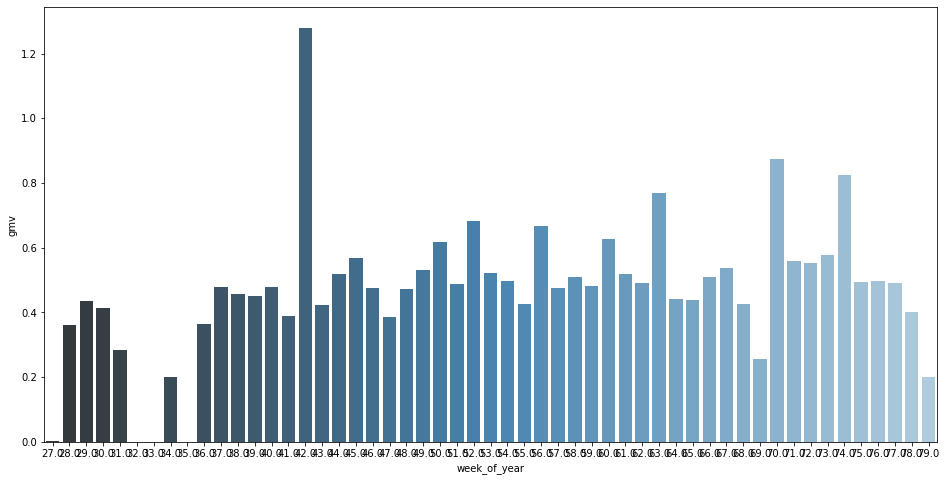

In [90]:
# Categorywise monthwise GMV value bar graph
plt.figure(figsize=(16,8))
sns.barplot(x="week_of_year", y="gmv", data=df_camera_accessory_original, palette="Blues_d")

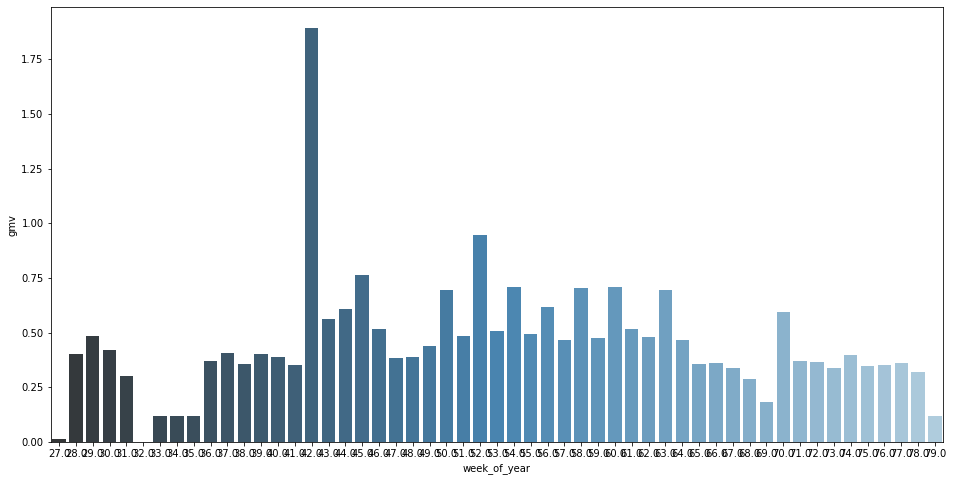

In [91]:
# Categorywise monthwise GMV value bar graph
plt.figure(figsize=(16,8))
sns.barplot(x="week_of_year", y="gmv", data=df_home_audio_original, palette="Blues_d")

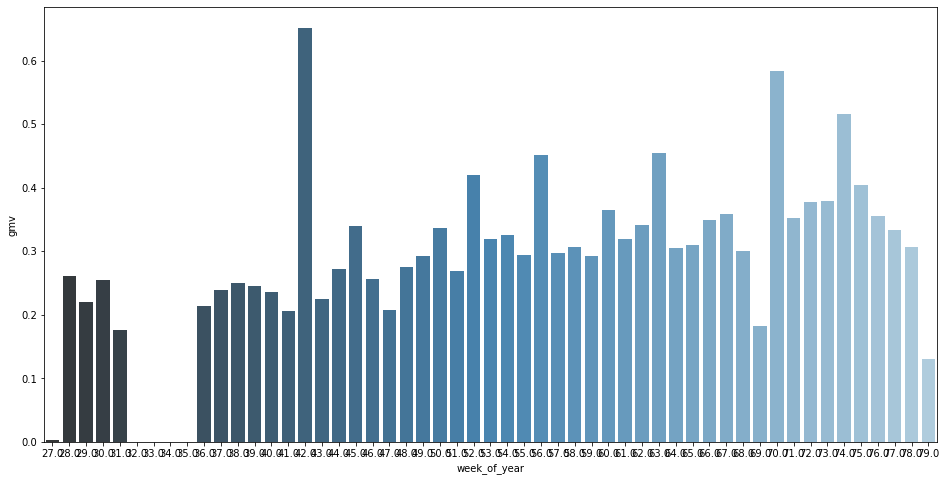

In [92]:
# Categorywise monthwise GMV value bar graph
plt.figure(figsize=(16,8))
sns.barplot(x="week_of_year", y="gmv", data=df_gaming_accessory_original, palette="Blues_d")

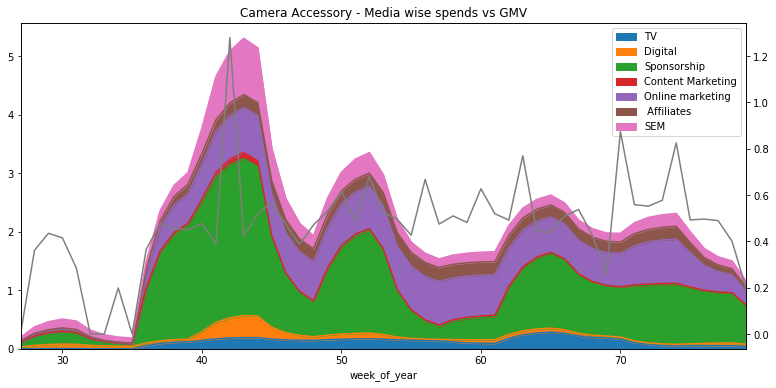

In [93]:
# Plotting Camera Accessory 's monthwise media spends and GMV'
df_camera_accessory.plot.area(y=['TV','Digital','Sponsorship','Content Marketing','Online marketing',' Affiliates','SEM'],figsize=(13,6))
df_camera_accessory['gmv'].plot(secondary_y=True)
plt.title('Camera Accessory - Media wise spends vs GMV')
plt.show()

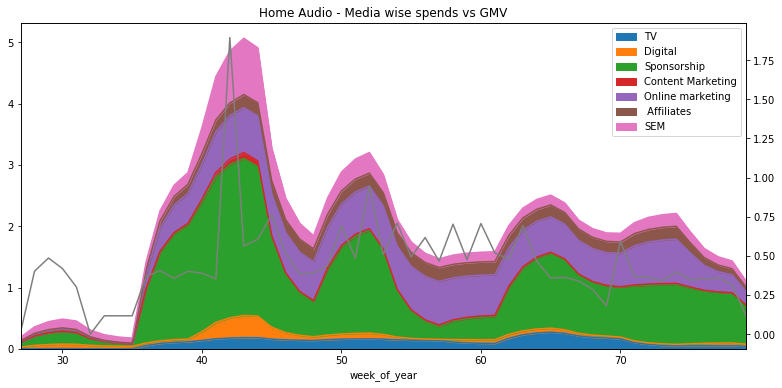

In [94]:
# Plotting Home Audio 's monthwise media spends and GMV'
df_home_audio.plot.area(y=['TV','Digital','Sponsorship','Content Marketing','Online marketing',' Affiliates','SEM'],figsize=(13,6))
df_home_audio['gmv'].plot(secondary_y=True)
plt.title('Home Audio - Media wise spends vs GMV')
plt.show()

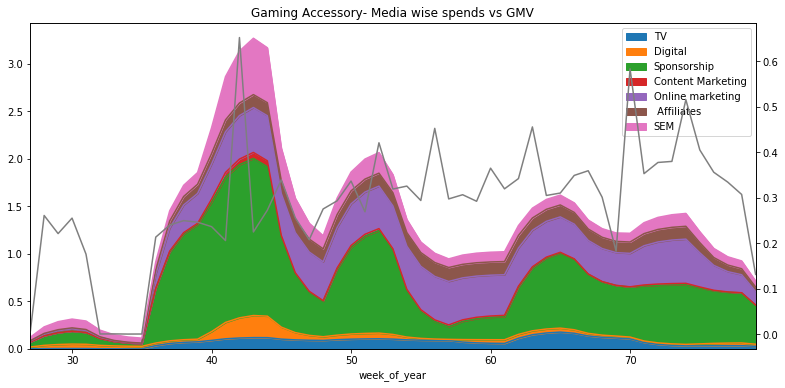

In [95]:
# Plotting Gaming Accessory 's monthwise media spends and GMV'
df_gaming_accessory.plot.area(y=['TV','Digital','Sponsorship','Content Marketing','Online marketing',' Affiliates','SEM'],figsize=(13,6))
df_gaming_accessory['gmv'].plot(secondary_y=True)
plt.title('Gaming Accessory- Media wise spends vs GMV')
plt.show()

### 3.1 EDA of Camera Accessory Dataset

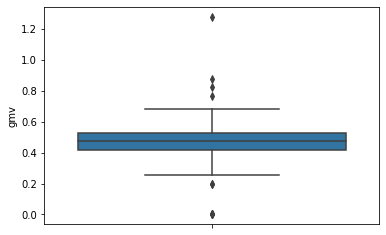

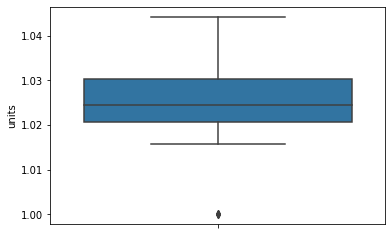

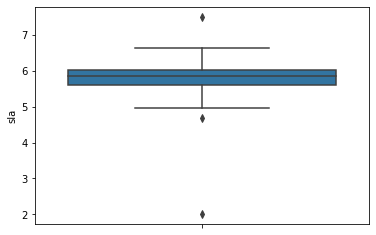

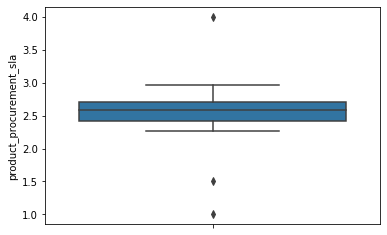

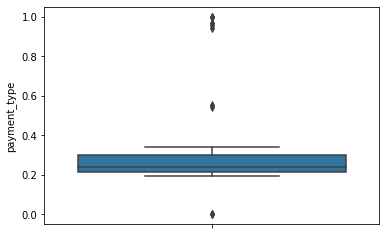

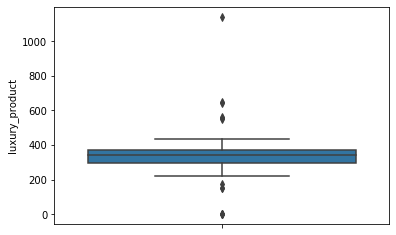

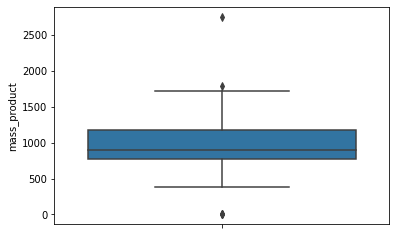

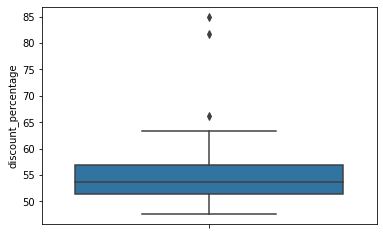

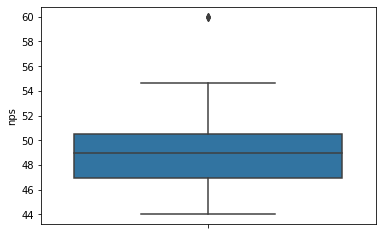

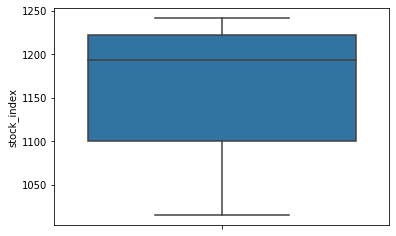

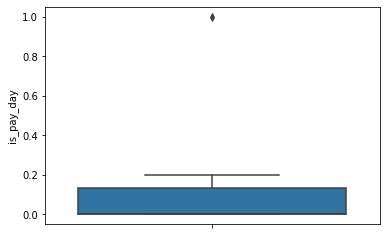

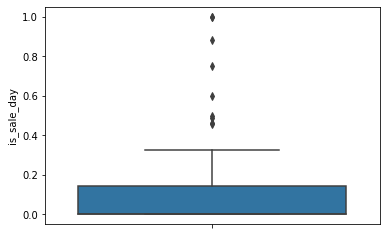

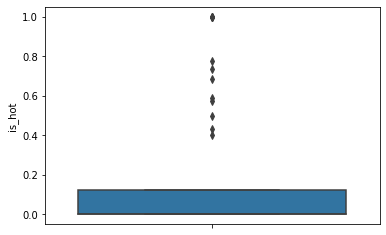

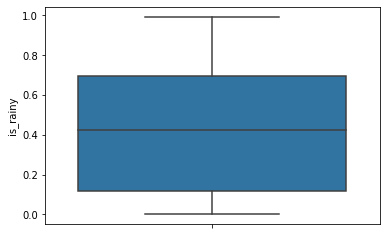

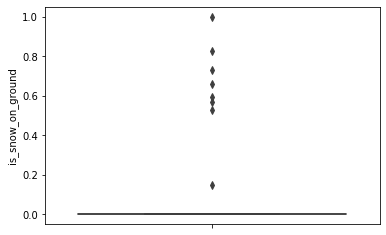

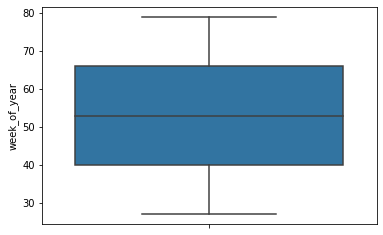

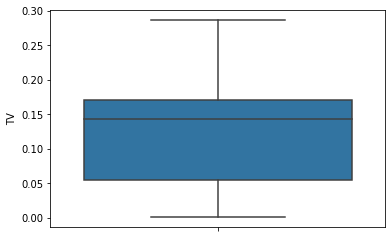

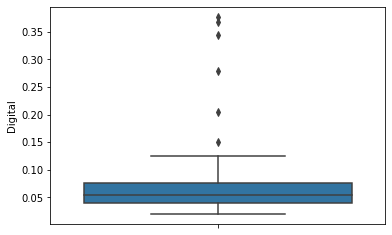

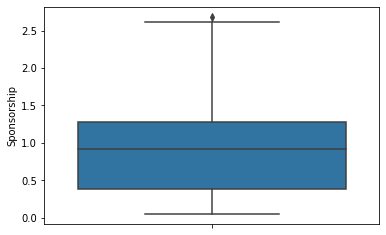

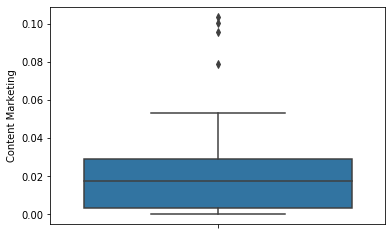

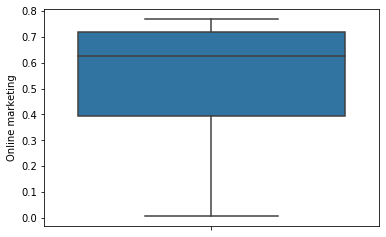

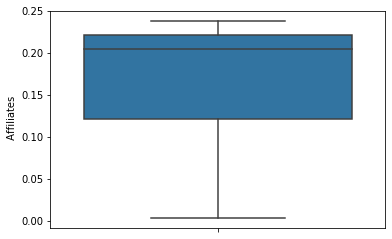

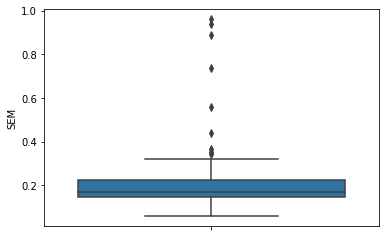

In [96]:
# Univariate Analysis
for col in df_camera_accessory.columns:
    num_col_univariate_analysis(df_camera_accessory,col)

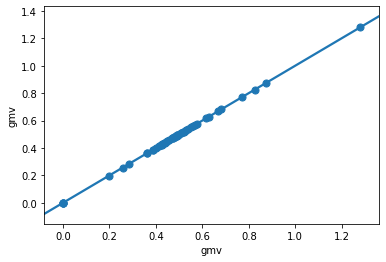

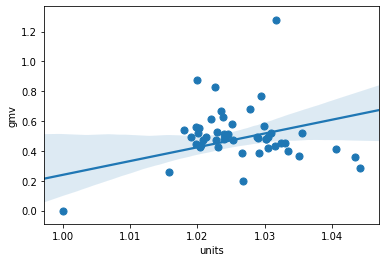

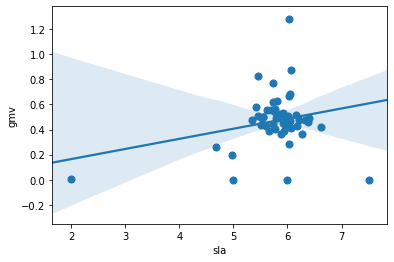

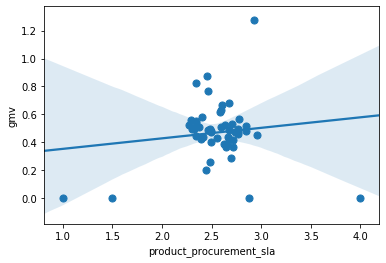

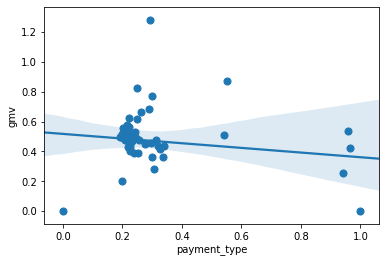

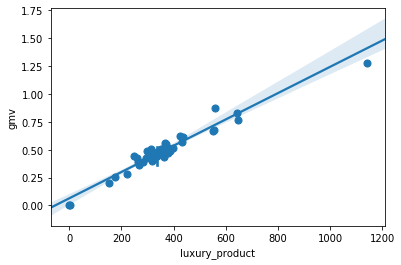

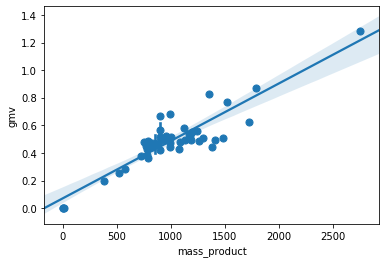

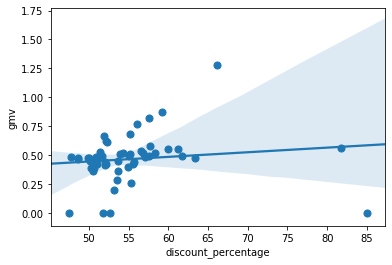

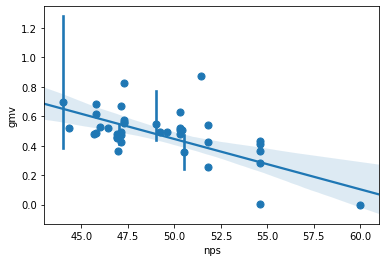

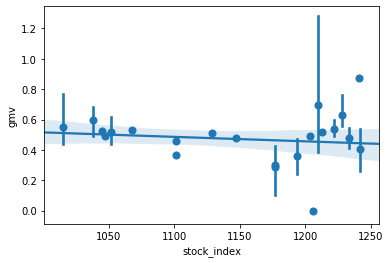

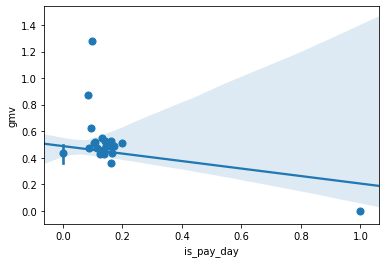

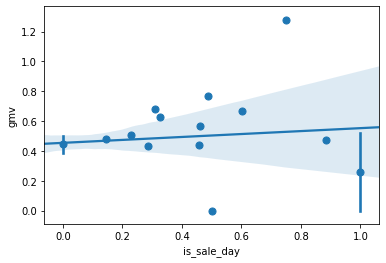

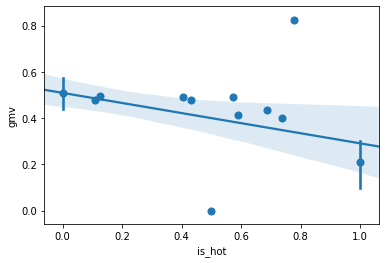

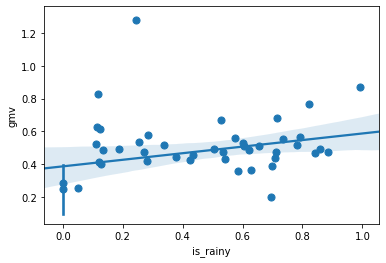

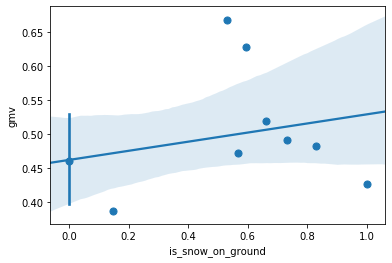

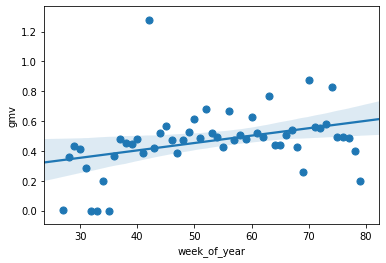

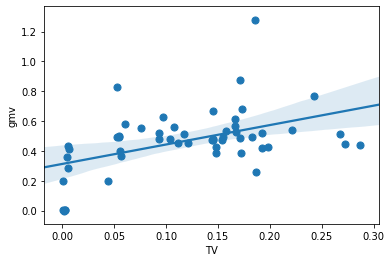

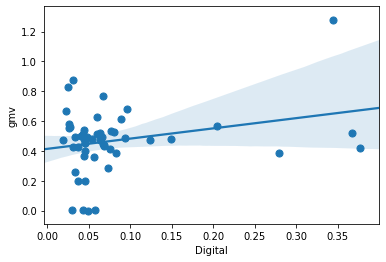

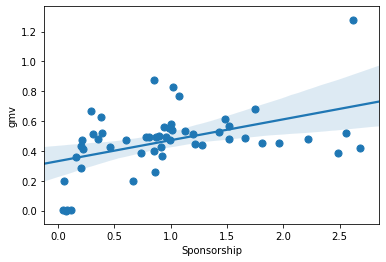

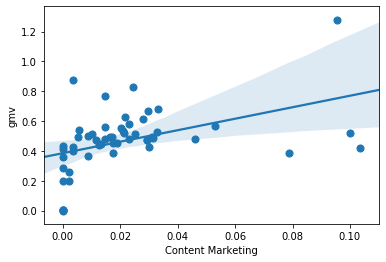

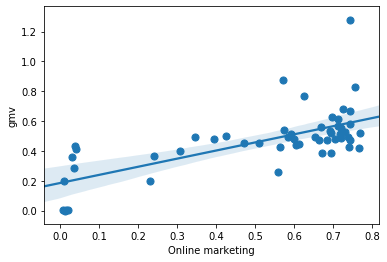

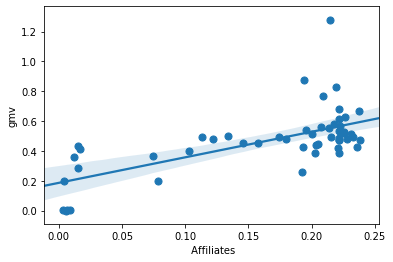

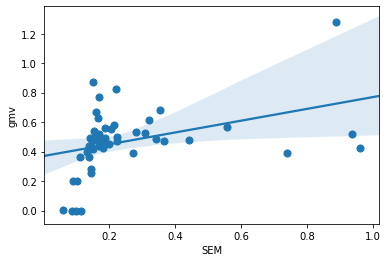

In [97]:
# Bivariate Analysis
for col in df_camera_accessory.columns:
    num_col_bivariate_analysis(df_camera_accessory,col,"gmv")

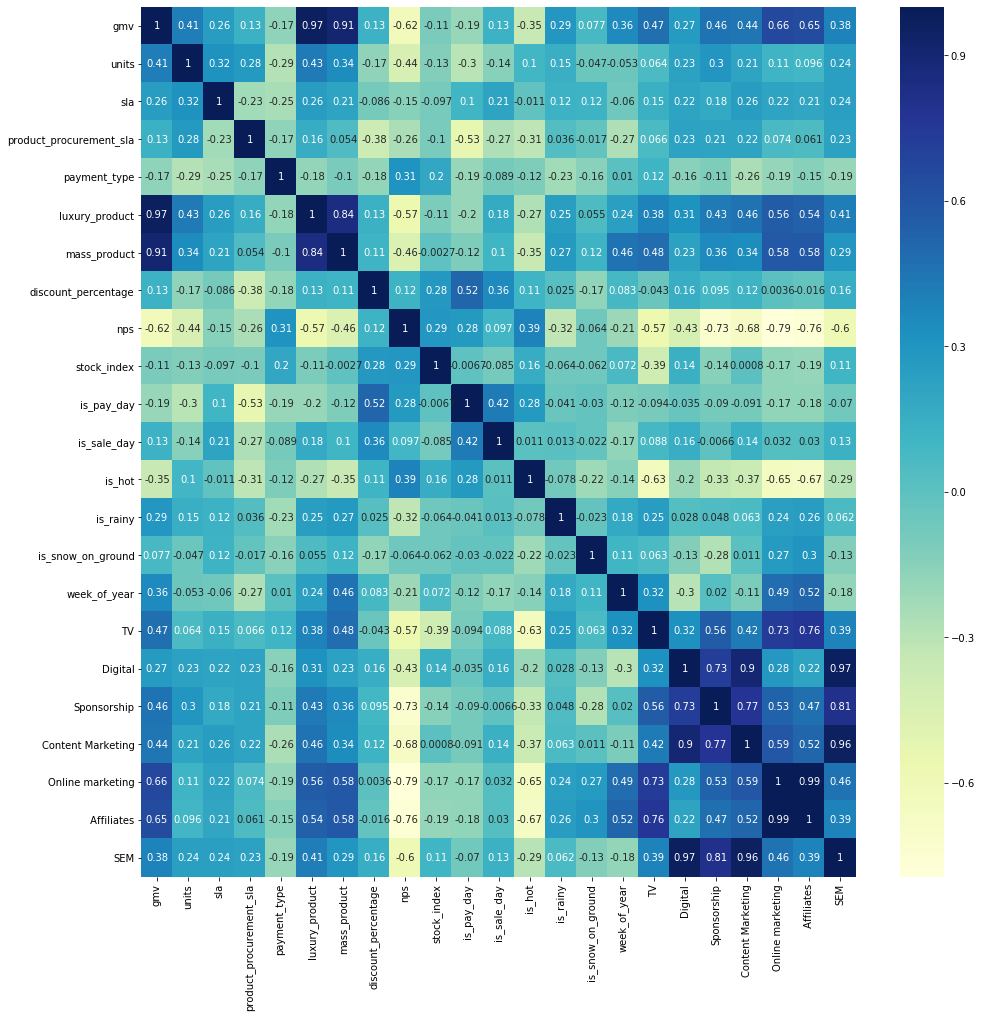

In [98]:
# Correlation Analysis
plt.figure(figsize=(16,16))
sns.heatmap(df_camera_accessory.corr(), cmap="YlGnBu", annot=True)

### 3.2 EDA of Home Audio Dataset

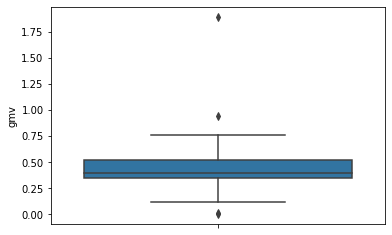

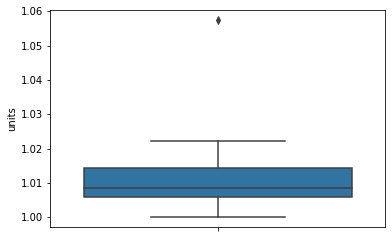

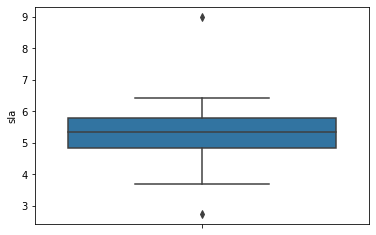

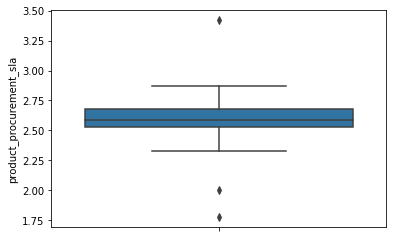

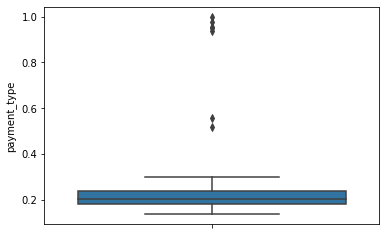

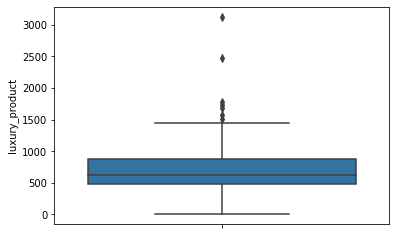

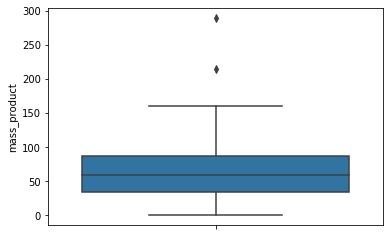

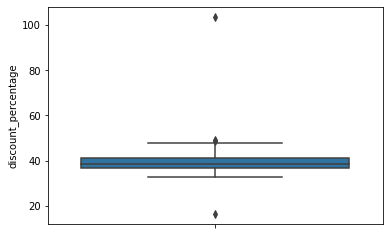

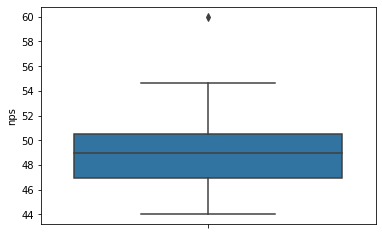

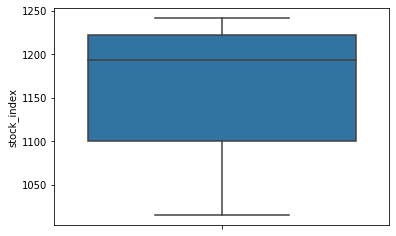

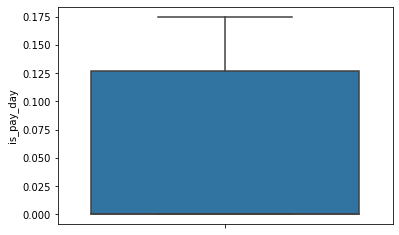

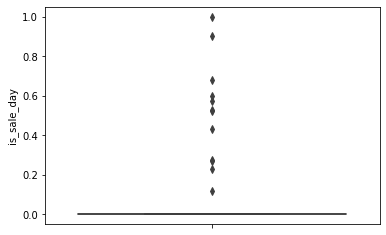

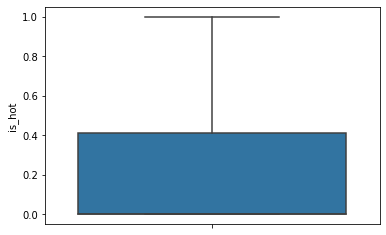

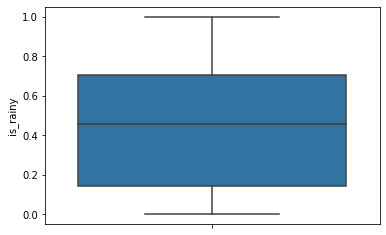

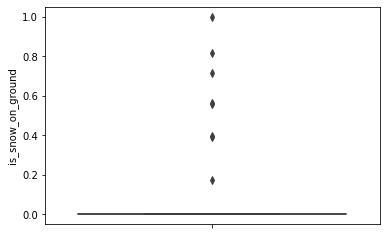

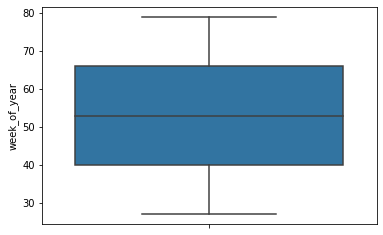

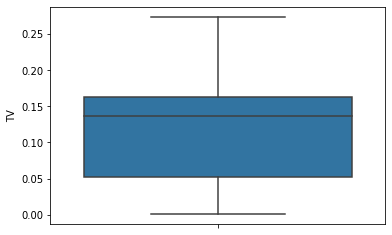

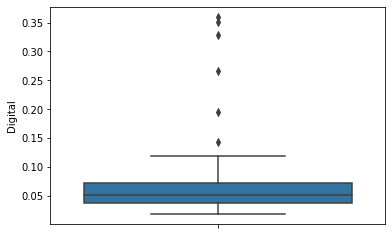

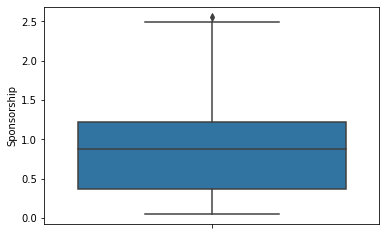

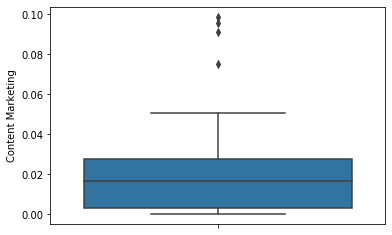

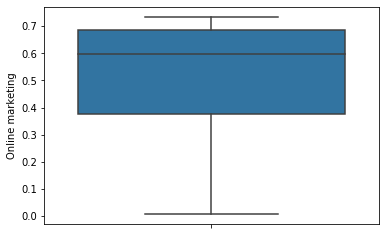

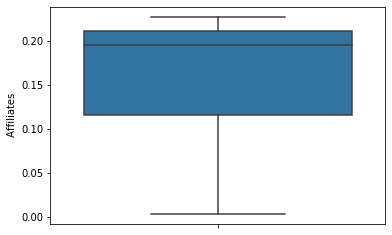

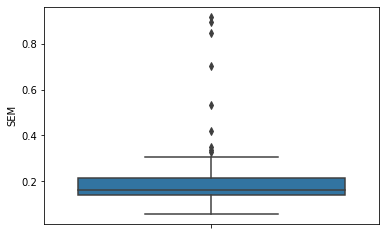

In [99]:
# Univariate Analysis
for col in df_home_audio.columns:
    num_col_univariate_analysis(df_home_audio,col)

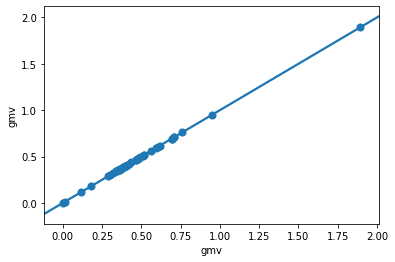

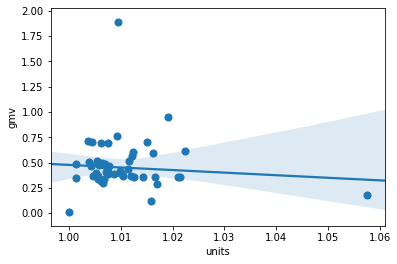

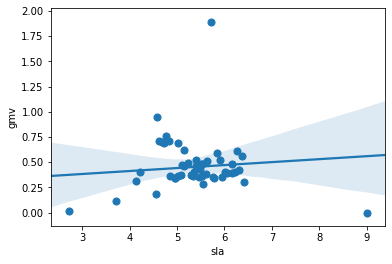

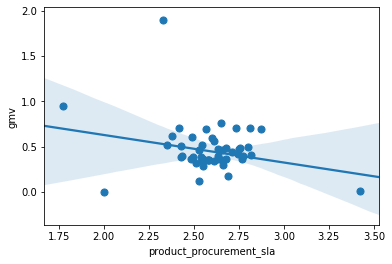

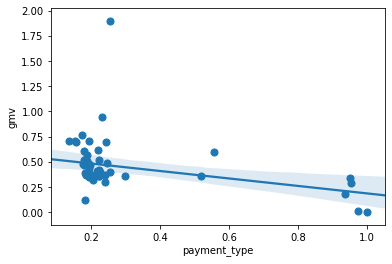

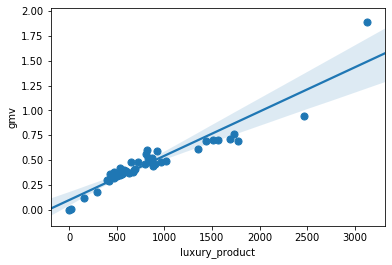

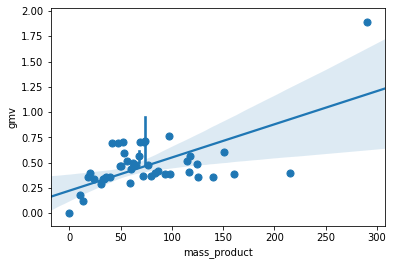

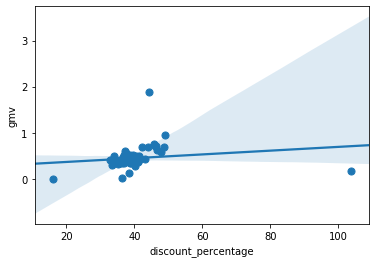

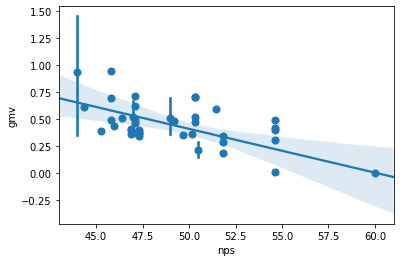

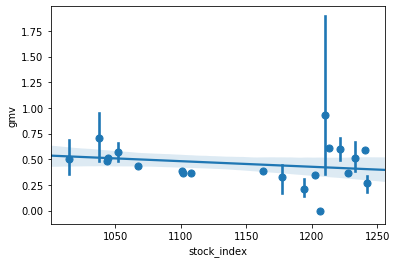

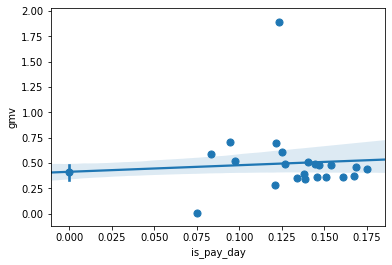

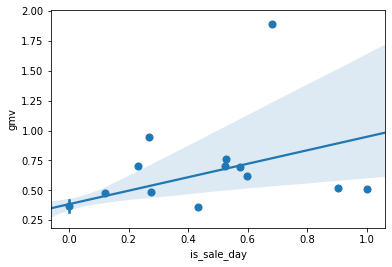

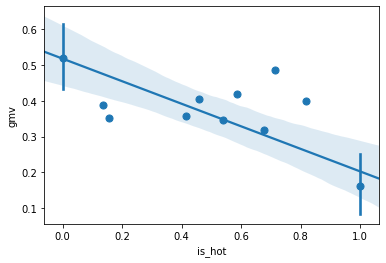

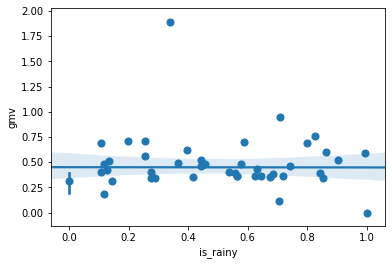

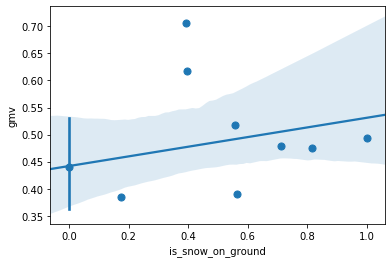

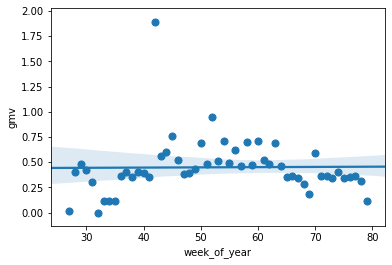

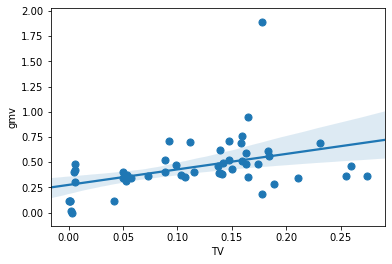

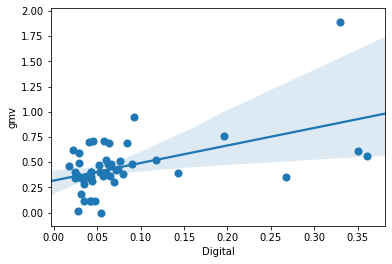

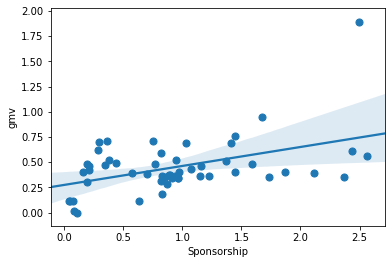

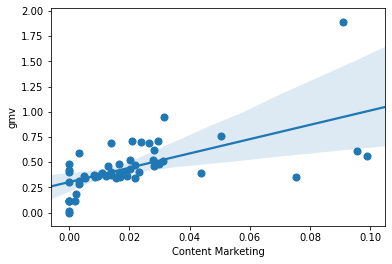

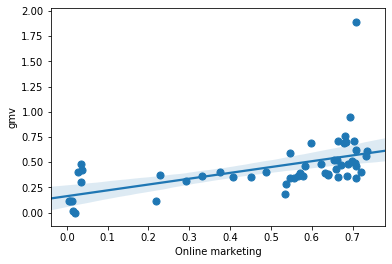

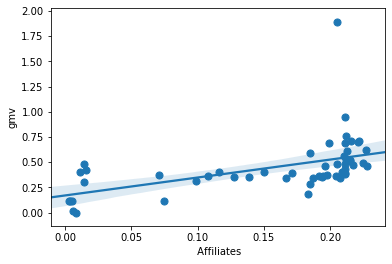

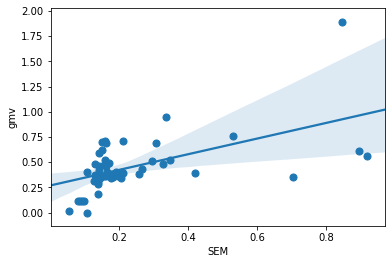

In [100]:
# Bivariate Analysis
for col in df_home_audio.columns:
    num_col_bivariate_analysis(df_home_audio,col,"gmv")

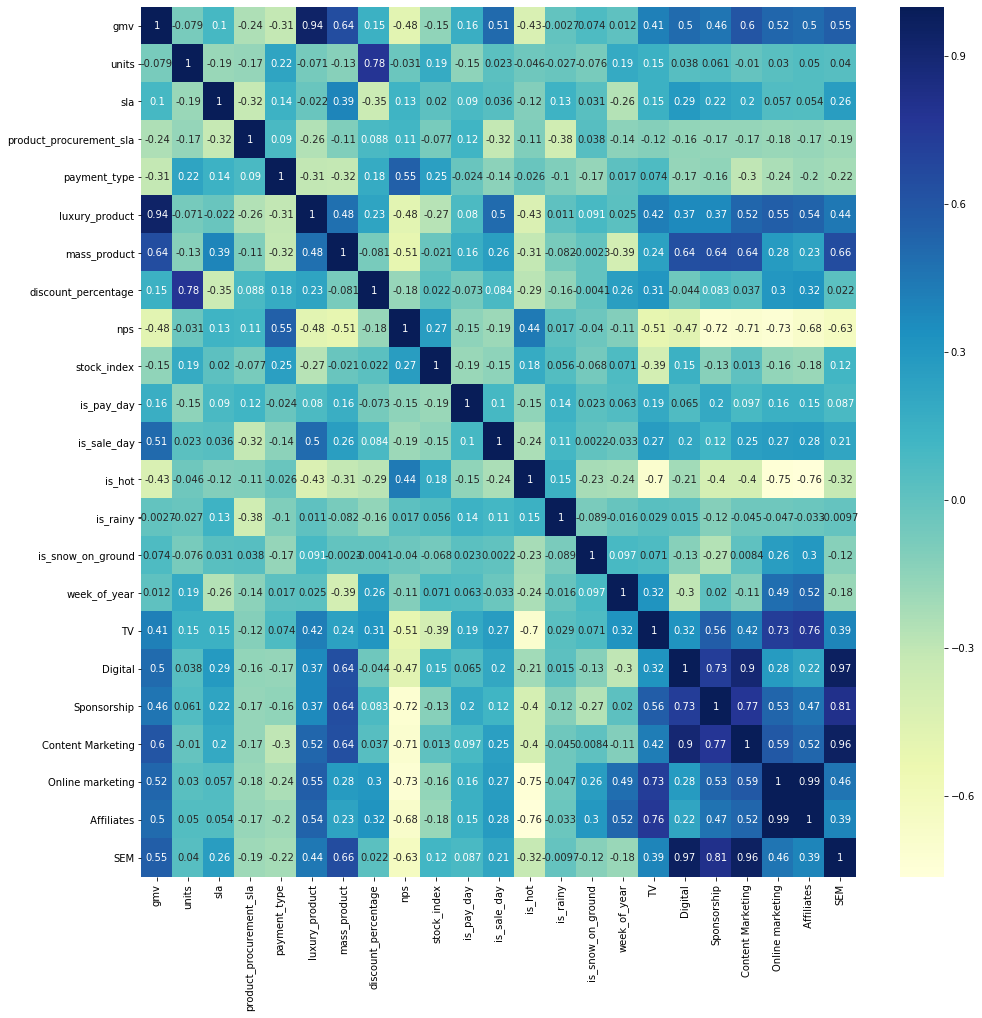

In [101]:
# Correlation Analysis
plt.figure(figsize=(16,16))
sns.heatmap(df_home_audio.corr(), cmap="YlGnBu", annot=True)

### 3.3 EDA of Gaming Accessory Dataset

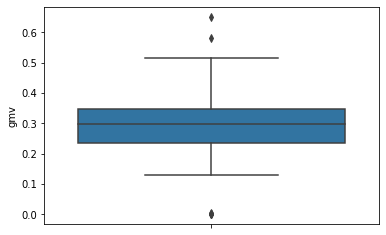

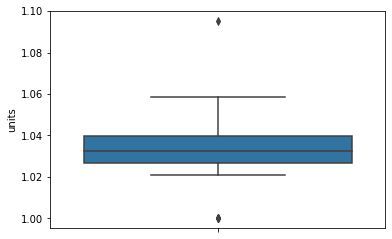

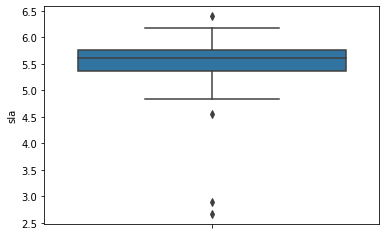

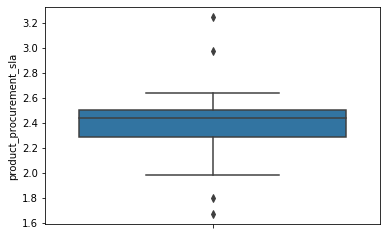

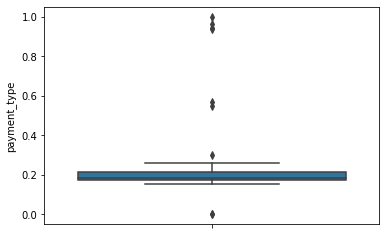

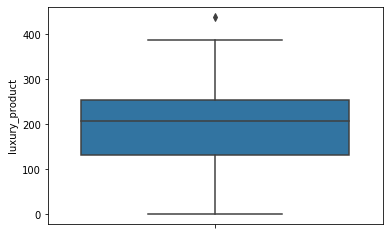

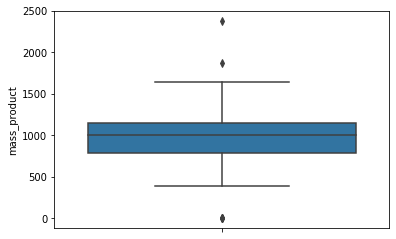

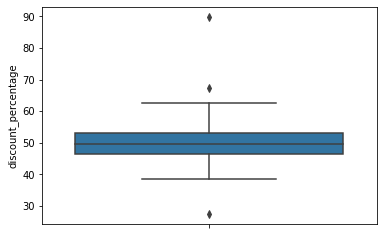

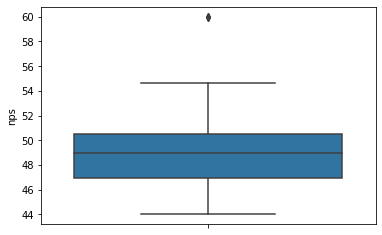

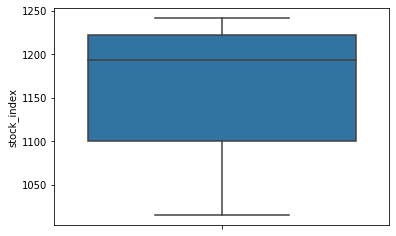

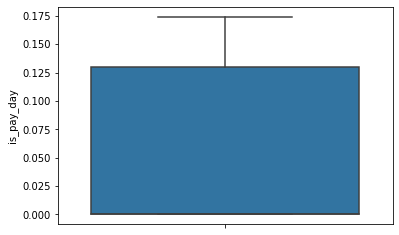

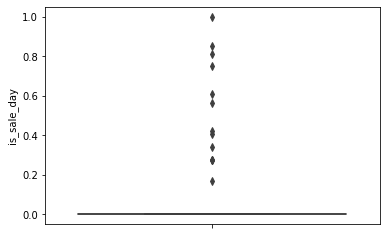

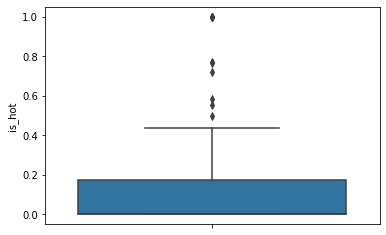

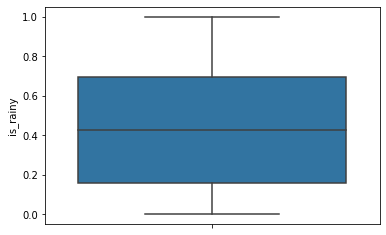

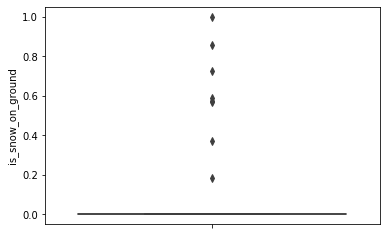

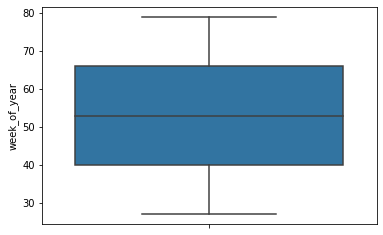

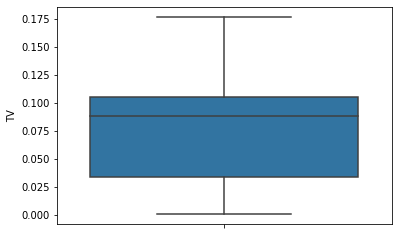

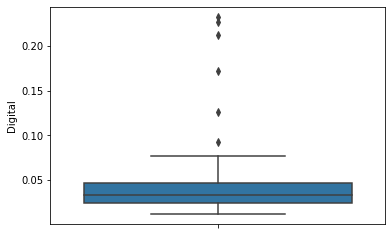

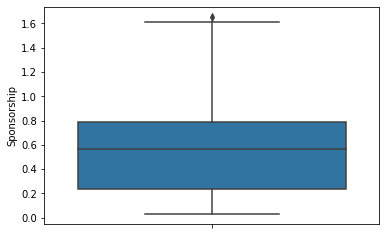

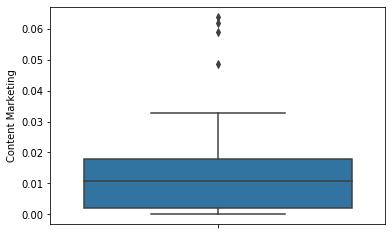

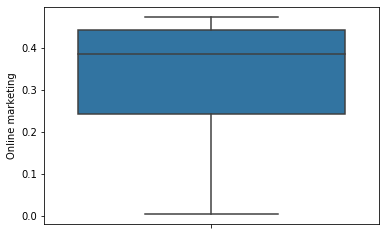

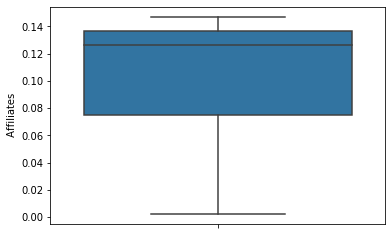

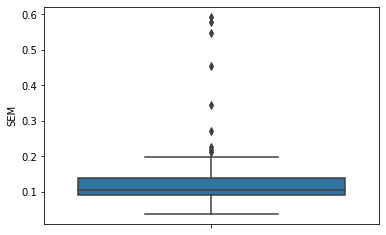

In [102]:
# Univariate Analysis
for col in df_gaming_accessory.columns:
    num_col_univariate_analysis(df_gaming_accessory,col)

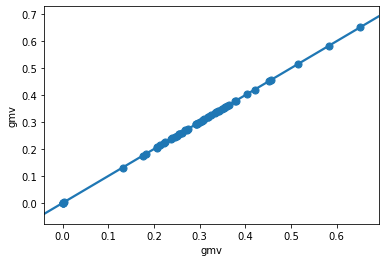

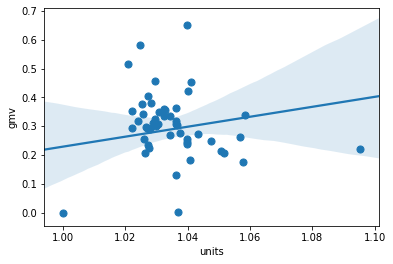

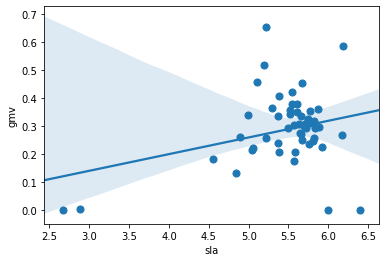

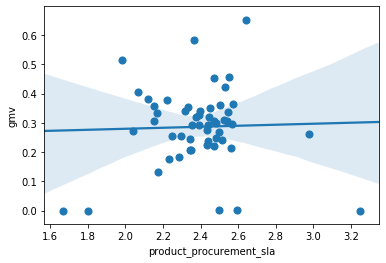

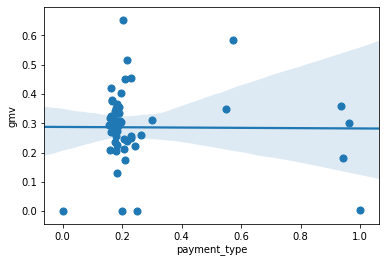

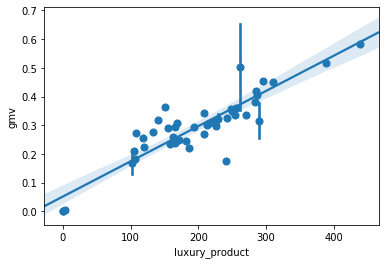

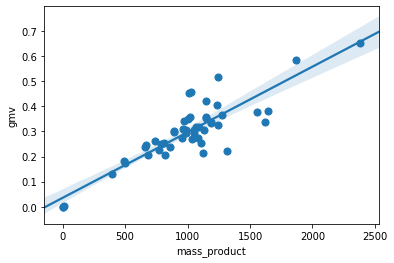

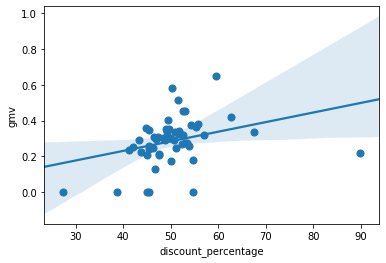

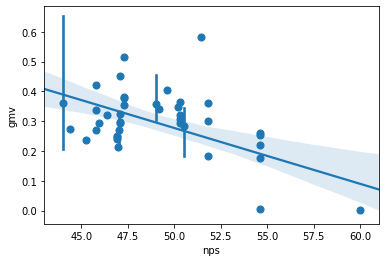

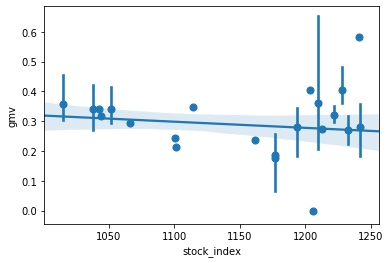

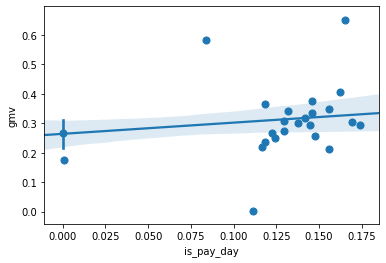

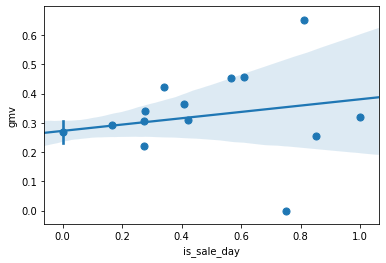

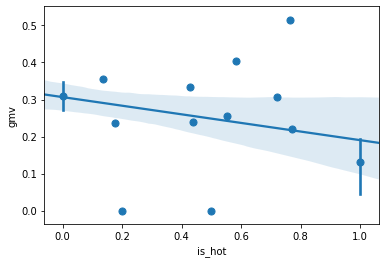

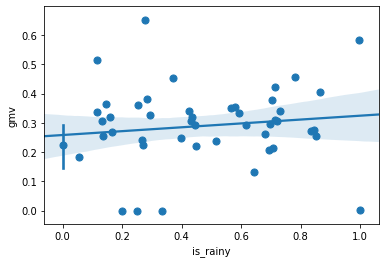

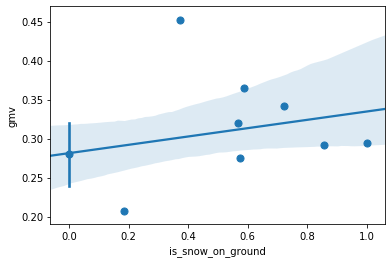

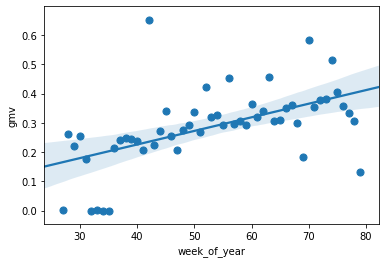

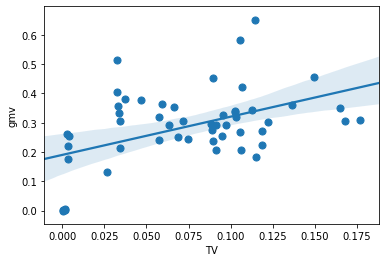

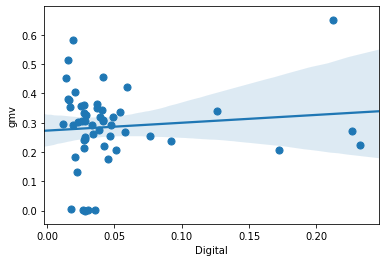

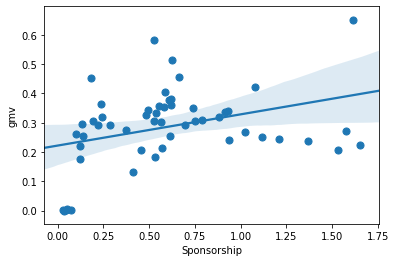

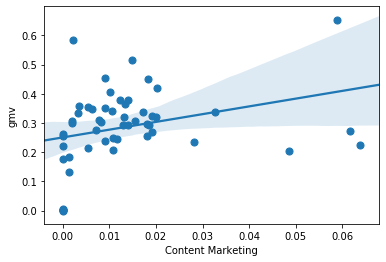

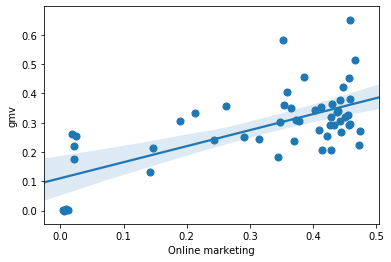

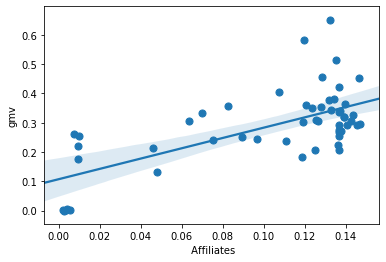

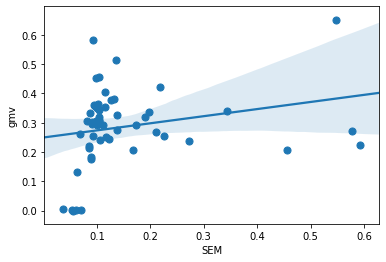

In [103]:
# Bivariate Analysis
for col in df_gaming_accessory.columns:
    num_col_bivariate_analysis(df_gaming_accessory,col,"gmv")

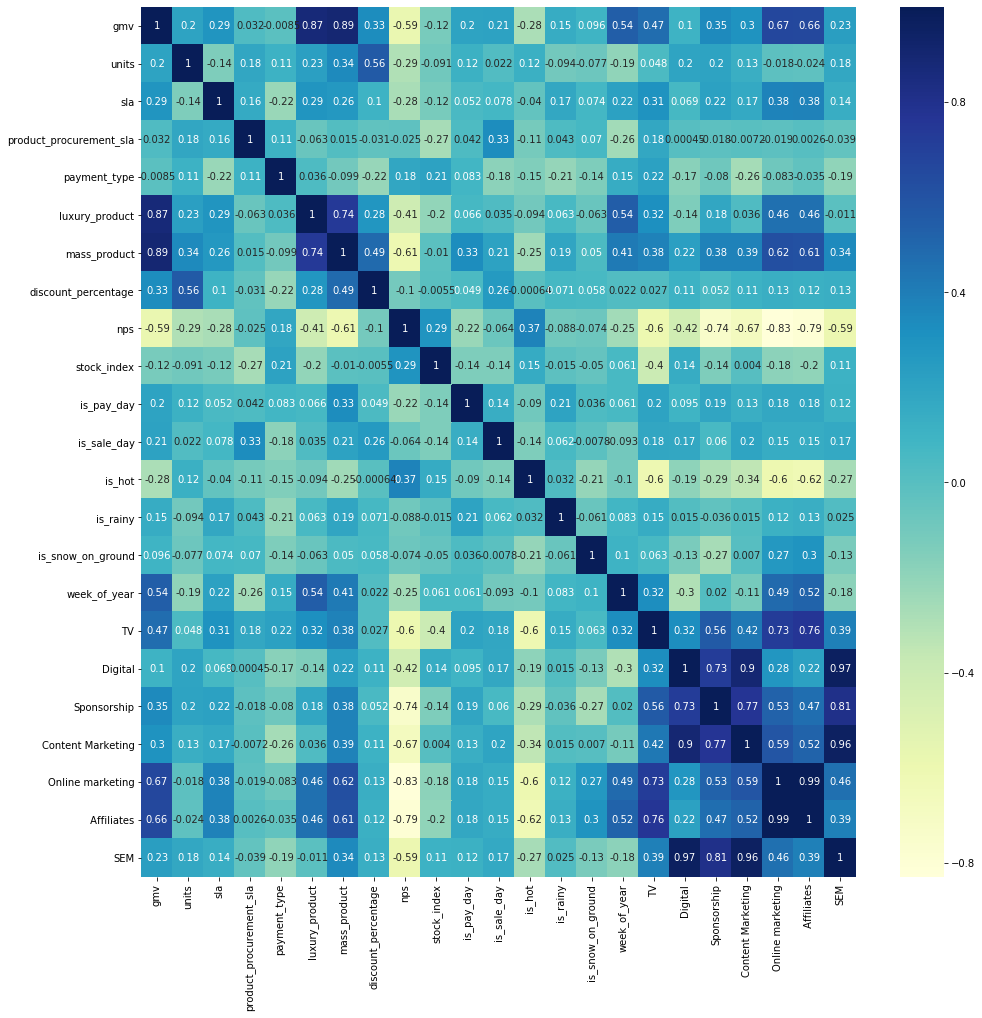

In [104]:
# Correlation Analysis
plt.figure(figsize=(16,16))
sns.heatmap(df_gaming_accessory.corr(), cmap="YlGnBu", annot=True)

### 3.4 Visualizing Seasonality in the overall sales data

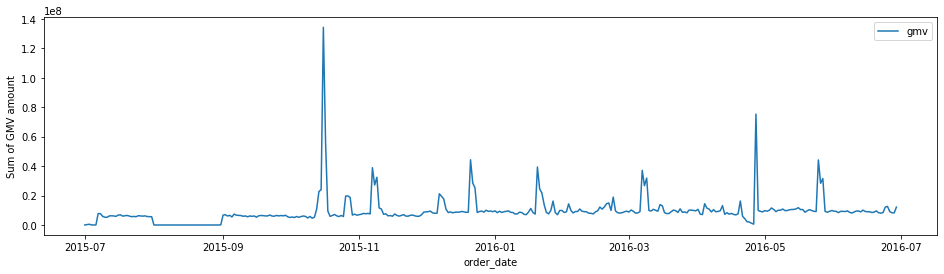

In [105]:
plt.figure(figsize=(16,4))
plt.ylabel('Sum of GMV amount')
data_to_plot = df_data[['order_date','gmv']].groupby(by='order_date').sum()
sns.lineplot(data=data_to_plot)

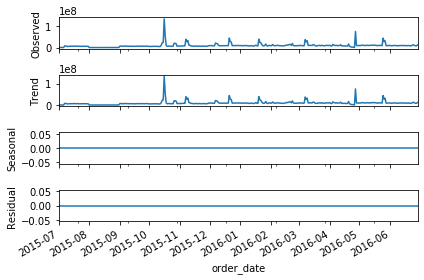

In [106]:
# Observing Seasonality & Trend of Overall Sales Data | Additive Model
series = df_data[['order_date','gmv']].groupby(by='order_date').sum()
seasonal_decompose(series, model='additive', freq=1).plot()
plt.show()

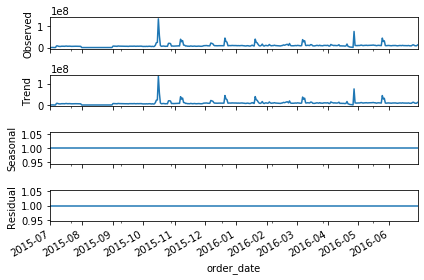

In [107]:
# Observing Seasonality & Trend of Overall Sales Data | Multiplicative Model
series = df_data[['order_date','gmv']].groupby(by='order_date').sum()
seasonal_decompose(series, model='multiplicative', freq=1).plot()
plt.show()

In [108]:
# Testing Stationality of Data using Dickey-Fuller test
result = adfuller(data_to_plot['gmv'].values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -11.768915
p-value: 0.000000
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


## 4. Building Simple Linear Model

In [109]:
# Function to take the column names as parameter and create a model along with displaying its statistics
def make_lr_model_mp(X,y,cols):
    cols=list(cols)
        
    # Add a constant
    X_train_lm = sm.add_constant(X[cols])
    
    # Create a first fitted model
    lr = sm.OLS(y, X_train_lm).fit()
    
    # Print a summary of the linear regression model obtained
    print('='*78)
    print(lr.summary())
    print('='*78,'\n')
    
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    if len(X[cols].columns)<2:
        return
    print('='*78)
    print(f'Computing VIF values to keep track of multicollinearity')
    print('='*78)
    vif = pd.DataFrame()
    vif['Features'] = X[cols].columns
    vif['VIF'] = [variance_inflation_factor(X[cols].values, i) for i in range(X[cols].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    print('='*78)
    
# Function to plot actual and predicted values
def plot_actual_predicted(y_test, y_test_pred):
    c = [i for i in range(0,y_test.shape[0],1)]
    fig = plt.figure(figsize=(16,4))
    plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c, y_test_pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual (blue) and Predicted (red) for Test Data', fontsize=16) # Plot heading 
    plt.xlabel('Week Number', fontsize=14)                               # X-label
    plt.ylabel('Sum of GMV (in Crores)', fontsize=14)                         # Y-label

### 4.1 Building Linear Model for Camera Accessory

In [110]:
# Splitting & Scaling Data
X_camera_accessory = df_camera_accessory_original.drop(columns=['gmv'])
y_camera_accessory = df_camera_accessory_original['gmv']

X_camera_accessory_train, X_camera_accessory_test, y_camera_accessory_train, y_camera_accessory_test = train_test_split(X_camera_accessory, y_camera_accessory, test_size = 0.3, random_state = 100)

scaler = StandardScaler()
cols = X_camera_accessory_train.columns
X_camera_accessory_train[cols] = scaler.fit_transform(X_camera_accessory_train[cols])

# Linear Regression Model
model = linear_model.LinearRegression(n_jobs=-1)
model.fit(X_camera_accessory_train,y_camera_accessory_train)

# Recursive Feature Elimination | Selecting 4 Features
# In regression analysis, many researchers say that there should be at least 10 observations per variable.
# Thus with ~40 observations, we can have max. 4 features
rfe = RFE(model, 4)
rfe = rfe.fit(X_camera_accessory_train,y_camera_accessory_train)

# Ranking of columns w.r.t ranking
auto_selected_predictors = list(X_camera_accessory_train.columns[rfe.support_])

# First Iteration; Considering all columns
model.fit(X_camera_accessory_train,y_camera_accessory_train)
y_pred = model.predict(X_camera_accessory_train)
r_square = r2_score(y_camera_accessory_train, y_pred)

# Computing Adjusted R Square
k = len(list(model.coef_))
adj_r_square = 1-(1-r_square)*(y_camera_accessory_train.size-1)/(y_camera_accessory_train.size-k-1)

# Printing the Equation
predictors = sorted(list(zip(model.coef_,X_camera_accessory_train.columns)),reverse=True, key=lambda x:abs(x[0]))
equation = []
for coff, var in predictors:
    equation.append(f'({coff:.02f})*{var}')
print(f'GMV = {" + ".join(equation)}')

# Displaying the metrics score
print(f'\nR-Square: \t\t{r_square} \nAdjusted R-Square: \t{adj_r_square}')

GMV = (0.49)* Affiliates + (-0.46)*Online marketing + (0.43)*SEM + (-0.37)*Digital + (0.12)*luxury_product + (0.08)*mass_product + (0.07)*nps + (0.05)*Sponsorship + (-0.04)*TV + (-0.03)*week_of_year + (0.03)*is_hot + (-0.02)*product_procurement_sla + (-0.02)*stock_index + (0.02)*is_rainy + (0.02)*units + (-0.01)*sla + (-0.01)*Content Marketing + (-0.01)*is_pay_day + (0.01)*is_snow_on_ground + (-0.01)*payment_type + (-0.00)*is_sale_day + (-0.00)*discount_percentage

R-Square: 		0.9911641360023075 
Adjusted R-Square: 	0.9772792068630763


In [111]:
# CAMERA ACCESSORY SIMPLE LINEAR MODEL | CONSIDERING FEATURES SELECTED BY RFE, THUS BEST FEATURE SUBSET
make_lr_model_mp(X_camera_accessory_train, y_camera_accessory_train, auto_selected_predictors)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     431.4
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.43e-27
Time:                        02:15:37   Log-Likelihood:                 80.686
No. Observations:                  37   AIC:                            -151.4
Df Residuals:                      32   BIC:                            -143.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4959      0.005    102.

In [112]:
# Further feature selection (based on p-value and VIF)
auto_selected_predictors.remove('SEM')
auto_selected_predictors.remove('Digital')
make_lr_model_mp(X_camera_accessory_train, y_camera_accessory_train, auto_selected_predictors)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     398.1
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.57e-24
Time:                        02:15:37   Log-Likelihood:                 65.685
No. Observations:                  37   AIC:                            -125.4
Df Residuals:                      34   BIC:                            -120.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4959      0.007     70.

GMV = (0.15)*luxury_product + (0.06)*mass_product

TRAINING DATASET
R-Square: 		0.9590424862067343 
Adjusted R-Square: 	0.9566332206894833

TEST DATASET
R-Square: 		0.8102822635592903 
Adjusted R-Square: 	0.7810949194914889


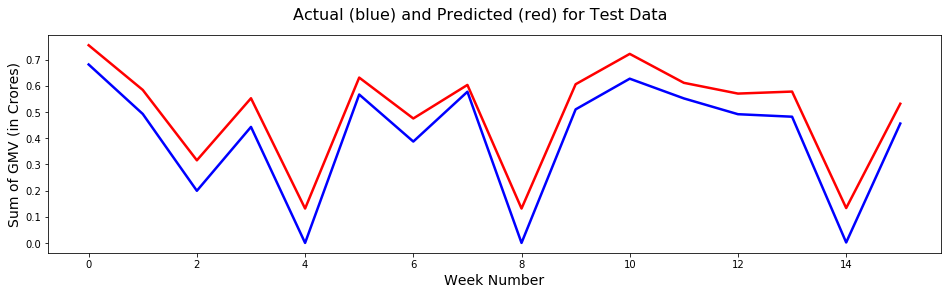

In [113]:
# Using the finally selected features to fit our linear model
model.fit(X_camera_accessory_train[auto_selected_predictors],y_camera_accessory_train)

# Scaling test dataset
scaler = StandardScaler()
cols = X_camera_accessory_test.columns
X_camera_accessory_test[cols] = scaler.fit_transform(X_camera_accessory_test[cols])

# Predicting on train and test dataset
y_train_pred = model.predict(X_camera_accessory_train[auto_selected_predictors])
r_square_train = r2_score(y_camera_accessory_train, y_train_pred)
y_test_pred = model.predict(X_camera_accessory_test[auto_selected_predictors])
r_square_test = r2_score(y_camera_accessory_test, y_test_pred)

# Plotting actual vs. predicted for test dataset
plot_actual_predicted(y_camera_accessory_test, y_test_pred)

# Computing Adjusted R Square
k = len(list(model.coef_))
adj_r_square_train = 1-(1-r_square_train)*(y_camera_accessory_train.size-1)/(y_camera_accessory_train.size-k-1)
adj_r_square_test = 1-(1-r_square_test)*(y_camera_accessory_test.size-1)/(y_camera_accessory_test.size-k-1)

# Printing the Equation
predictors = sorted(list(zip(model.coef_,auto_selected_predictors)),reverse=True, key=lambda x:abs(x[0]))
equation = []
for coff, var in predictors:
    equation.append(f'({coff:.02f})*{var}')
print(f'GMV = {" + ".join(equation)}')

# Displaying the metrics score
print(f'\nTRAINING DATASET\nR-Square: \t\t{r_square_train} \nAdjusted R-Square: \t{adj_r_square_train}')
print(f'\nTEST DATASET\nR-Square: \t\t{r_square_test} \nAdjusted R-Square: \t{adj_r_square_test}')

### 4.2 Building Linear Model for Home Audio

In [114]:
# Splitting & Scaling Data
X_home_audio = df_home_audio_original.drop(columns=['gmv'])
y_home_audio = df_home_audio_original['gmv']

X_home_audio_train, X_home_audio_test, y_home_audio_train, y_home_audio_test = train_test_split(X_home_audio, y_home_audio, test_size = 0.3, random_state = 100)

scaler = StandardScaler()
cols = X_home_audio_train.columns
X_home_audio_train[cols] = scaler.fit_transform(X_home_audio_train[cols])

# Linear Regression Model
model = linear_model.LinearRegression(n_jobs=-1)
model.fit(X_home_audio_train,y_home_audio_train)

# Recursive Feature Elimination | Selecting 4 Features
# In regression analysis, many researchers say that there should be at least 10 observations per variable.
# Thus with ~40 observations, we can have max. 4 features
rfe = RFE(model, 4)
rfe = rfe.fit(X_home_audio_train,y_home_audio_train)

# Ranking of columns w.r.t ranking
auto_selected_predictors = list(X_home_audio_train.columns[rfe.support_])

# First Iteration; Considering all columns
model.fit(X_home_audio_train,y_home_audio_train)
y_pred = model.predict(X_home_audio_train)
r_square = r2_score(y_home_audio_train, y_pred)

# Computing Adjusted R Square
k = len(list(model.coef_))
adj_r_square = 1-(1-r_square)*(y_home_audio_train.size-1)/(y_home_audio_train.size-k-1)

# Printing the Equation
predictors = sorted(list(zip(model.coef_,X_home_audio_train.columns)),reverse=True, key=lambda x:abs(x[0]))
equation = []
for coff, var in predictors:
    equation.append(f'({coff:.02f})*{var}')
print(f'GMV = {" + ".join(equation)}')

# Displaying the metrics score
print(f'\nR-Square: \t\t{r_square} \nAdjusted R-Square: \t{adj_r_square}')

GMV = (-0.74)* Affiliates + (0.72)*Online marketing + (0.29)*Digital + (-0.26)*SEM + (0.25)*luxury_product + (0.08)*week_of_year + (0.07)*mass_product + (-0.06)*Content Marketing + (-0.06)*Sponsorship + (0.04)*sla + (-0.04)*nps + (0.03)*payment_type + (0.02)*TV + (0.01)*stock_index + (0.01)*is_pay_day + (0.01)*is_sale_day + (0.01)*is_rainy + (-0.01)*is_hot + (0.01)*discount_percentage + (0.01)*is_snow_on_ground + (-0.00)*product_procurement_sla + (-0.00)*units

R-Square: 		0.9882487393860553 
Adjusted R-Square: 	0.9697824727069994


In [115]:
# HOME audio_train SIMPLE LINEAR MODEL | CONSIDERING FEATURES SELECTED BY RFE, THUS BEST FEATURE SUBSET
make_lr_model_mp(X_home_audio_train, y_home_audio_train, auto_selected_predictors)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     150.8
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.78e-20
Time:                        02:15:38   Log-Likelihood:                 50.475
No. Observations:                  37   AIC:                            -90.95
Df Residuals:                      32   BIC:                            -82.90
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4666      0.011     42.

In [116]:
# Further feature selection (based on p-value and VIF)
auto_selected_predictors.remove('SEM')
auto_selected_predictors.remove('Digital')
make_lr_model_mp(X_home_audio_train, y_home_audio_train, auto_selected_predictors)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     242.3
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           7.66e-21
Time:                        02:15:38   Log-Likelihood:                 45.594
No. Observations:                  37   AIC:                            -85.19
Df Residuals:                      34   BIC:                            -80.36
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4666      0.012     38.

GMV = (0.23)*luxury_product + (0.06)*mass_product

TRAINING DATASET
R-Square: 		0.9344264300195911 
Adjusted R-Square: 	0.9305691611972141

TEST DATASET
R-Square: 		0.9112129554673417 
Adjusted R-Square: 	0.8975534101546251


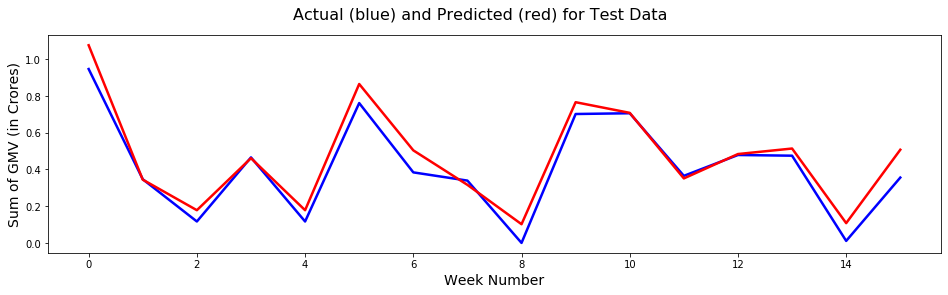

In [117]:
# Using the finally selected features to fit our linear model
model.fit(X_home_audio_train[auto_selected_predictors],y_home_audio_train)

# Scaling test dataset
scaler = StandardScaler()
cols = X_home_audio_test.columns
X_home_audio_test[cols] = scaler.fit_transform(X_home_audio_test[cols])

# Predicting on train and test dataset
y_train_pred = model.predict(X_home_audio_train[auto_selected_predictors])
r_square_train = r2_score(y_home_audio_train, y_train_pred)
y_test_pred = model.predict(X_home_audio_test[auto_selected_predictors])
r_square_test = r2_score(y_home_audio_test, y_test_pred)

# Plotting actual vs. predicted for test dataset
plot_actual_predicted(y_home_audio_test, y_test_pred)

# Computing Adjusted R Square
k = len(list(model.coef_))
adj_r_square_train = 1-(1-r_square_train)*(y_home_audio_train.size-1)/(y_home_audio_train.size-k-1)
adj_r_square_test = 1-(1-r_square_test)*(y_home_audio_test.size-1)/(y_home_audio_test.size-k-1)

# Printing the Equation
predictors = sorted(list(zip(model.coef_,auto_selected_predictors)),reverse=True, key=lambda x:abs(x[0]))
equation = []
for coff, var in predictors:
    equation.append(f'({coff:.02f})*{var}')
print(f'GMV = {" + ".join(equation)}')

# Displaying the metrics score
print(f'\nTRAINING DATASET\nR-Square: \t\t{r_square_train} \nAdjusted R-Square: \t{adj_r_square_train}')
print(f'\nTEST DATASET\nR-Square: \t\t{r_square_test} \nAdjusted R-Square: \t{adj_r_square_test}')

### 4.3 Building Linear Model for Gaming Accessory

In [118]:
# Splitting & Scaling Data
X_gaming_accessory = df_gaming_accessory_original.drop(columns=['gmv'])
y_gaming_accessory = df_gaming_accessory_original['gmv']

X_gaming_accessory_train, X_gaming_accessory_test, y_gaming_accessory_train, y_gaming_accessory_test = train_test_split(X_gaming_accessory, y_gaming_accessory, test_size = 0.3, random_state = 100)

scaler = StandardScaler()
cols = X_gaming_accessory_train.columns
X_gaming_accessory_train[cols] = scaler.fit_transform(X_gaming_accessory_train[cols])

# Linear Regression Model
model = linear_model.LinearRegression(n_jobs=-1)
model.fit(X_gaming_accessory_train,y_gaming_accessory_train)

# Recursive Feature Elimination | Selecting 4 Features
# In regression analysis, many researchers say that there should be at least 10 observations per variable.
# Thus with ~40 observations, we can have max. 4 features
rfe = RFE(model, 4)
rfe = rfe.fit(X_gaming_accessory_train,y_gaming_accessory_train)

# Ranking of columns w.r.t ranking
auto_selected_predictors = list(X_gaming_accessory_train.columns[rfe.support_])

# First Iteration; Considering all columns
model.fit(X_gaming_accessory_train,y_gaming_accessory_train)
y_pred = model.predict(X_gaming_accessory_train)
r_square = r2_score(y_gaming_accessory_train, y_pred)

# Computing Adjusted R Square
k = len(list(model.coef_))
adj_r_square = 1-(1-r_square)*(y_gaming_accessory_train.size-1)/(y_gaming_accessory_train.size-k-1)

# Printing the Equation
predictors = sorted(list(zip(model.coef_,X_gaming_accessory_train.columns)),reverse=True, key=lambda x:abs(x[0]))
equation = []
for coff, var in predictors:
    equation.append(f'({coff:.02f})*{var}')
print(f'GMV = {" + ".join(equation)}')

# Displaying the metrics score
print(f'\nR-Square: \t\t{r_square} \nAdjusted R-Square: \t{adj_r_square}')

GMV = (-0.14)*SEM + (0.10)* Affiliates + (0.10)*Digital + (0.08)*luxury_product + (-0.05)*TV + (0.05)*mass_product + (0.05)*Sponsorship + (-0.03)*sla + (0.03)*Content Marketing + (-0.03)*Online marketing + (0.02)*product_procurement_sla + (0.02)*nps + (-0.02)*discount_percentage + (0.02)*is_sale_day + (0.01)*week_of_year + (0.01)*is_rainy + (0.01)*units + (0.01)*is_snow_on_ground + (0.01)*stock_index + (0.01)*payment_type + (0.00)*is_pay_day + (-0.00)*is_hot

R-Square: 		0.9787932340906688 
Adjusted R-Square: 	0.9454683162331482


In [119]:
# GAMING accessory_train SIMPLE LINEAR MODEL | CONSIDERING FEATURES SELECTED BY RFE, THUS BEST FEATURE SUBSET
make_lr_model_mp(X_gaming_accessory_train, y_gaming_accessory_train, auto_selected_predictors)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     38.67
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           7.93e-12
Time:                        02:15:39   Log-Likelihood:                 57.343
No. Observations:                  37   AIC:                            -104.7
Df Residuals:                      32   BIC:                            -96.63
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2985      0.009  

In [120]:
# Further feature selection (based on p-value and VIF)
auto_selected_predictors.remove('SEM')
make_lr_model_mp(X_gaming_accessory_train, y_gaming_accessory_train, auto_selected_predictors)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     50.22
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.14e-12
Time:                        02:15:39   Log-Likelihood:                 56.473
No. Observations:                  37   AIC:                            -104.9
Df Residuals:                      33   BIC:                            -98.50
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2985      0.009  

GMV = (0.10)*luxury_product + (0.03)*Online marketing + (0.02)*Digital

TRAINING DATASET
R-Square: 		0.8203152580274294 
Adjusted R-Square: 	0.8039802814844685

TEST DATASET
R-Square: 		0.8441001705328189 
Adjusted R-Square: 	0.8051252131660237


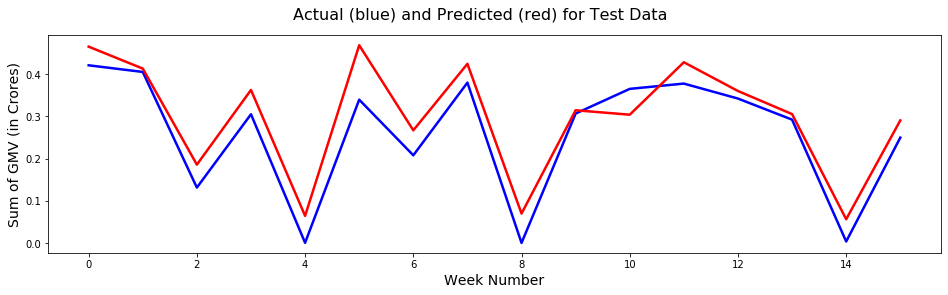

In [121]:
# Using the finally selected features to fit our linear model
model.fit(X_gaming_accessory_train[auto_selected_predictors],y_gaming_accessory_train)

# Scaling test dataset
scaler = StandardScaler()
cols = X_gaming_accessory_test.columns
X_gaming_accessory_test[cols] = scaler.fit_transform(X_gaming_accessory_test[cols])

# Predicting on train and test dataset
y_train_pred = model.predict(X_gaming_accessory_train[auto_selected_predictors])
r_square_train = r2_score(y_gaming_accessory_train, y_train_pred)
y_test_pred = model.predict(X_gaming_accessory_test[auto_selected_predictors])
r_square_test = r2_score(y_gaming_accessory_test, y_test_pred)

# Plotting actual vs. predicted for test dataset
plot_actual_predicted(y_gaming_accessory_test, y_test_pred)

# Computing Adjusted R Square
k = len(list(model.coef_))
adj_r_square_train = 1-(1-r_square_train)*(y_gaming_accessory_train.size-1)/(y_gaming_accessory_train.size-k-1)
adj_r_square_test = 1-(1-r_square_test)*(y_gaming_accessory_test.size-1)/(y_gaming_accessory_test.size-k-1)

# Printing the Equation
predictors = sorted(list(zip(model.coef_,auto_selected_predictors)),reverse=True, key=lambda x:abs(x[0]))
equation = []
for coff, var in predictors:
    equation.append(f'({coff:.02f})*{var}')
print(f'GMV = {" + ".join(equation)}')

# Displaying the metrics score
print(f'\nTRAINING DATASET\nR-Square: \t\t{r_square_train} \nAdjusted R-Square: \t{adj_r_square_train}')
print(f'\nTEST DATASET\nR-Square: \t\t{r_square_test} \nAdjusted R-Square: \t{adj_r_square_test}')

### 4.4 Conclusion of Simple Linear Additive Model

1. We obtained a good r-square value and adjusted r-square value for product subcategory 'Camera Accessory'
2. The features that are mostly affecting GMV for subcategory 'Camera Accessory' are:
    * luxury_product
    * mass_product
    * SEM (Media Investment)
3. We obtained a good r-square value and adjusted r-square value for product subcategory 'Home Audio'
4. The features that are mostly affecting GMV for subcategory 'Home Audio' are:
    * luxury_product
    * mass_product
    * Digital (Media Investment)
5. We obtained a good r-square value and adjusted r-square value for product subcategory 'Gaming Accessory'
6. The features that are mostly affecting GMV for subcategory 'Gaming Accessory' are:
    * luxury_product
    * Online marketing (Media Investment)
    * Digital (Media Investment)
7. The results do not vary much for training and testing dataset, thus model is relatively stable and generalizable.


## 5. Building Multiplicative Models

### 5.1 Building Multiplicative Model for Camera Accessory

In [122]:
# Taking Logarithm, Splitting & Scaling Data
X_camera_accessory = np.log1p(df_camera_accessory_original.drop(columns=['gmv']))
y_camera_accessory = np.log1p(df_camera_accessory_original['gmv'])

X_camera_accessory_train, X_camera_accessory_test, y_camera_accessory_train, y_camera_accessory_test = train_test_split(X_camera_accessory, y_camera_accessory, test_size = 0.3, random_state = 42)

scaler = StandardScaler()
cols = X_camera_accessory_train.columns
X_camera_accessory_train[cols] = scaler.fit_transform(X_camera_accessory_train[cols])

# Linear Regression Model
model = linear_model.LinearRegression(n_jobs=-1)
model.fit(X_camera_accessory_train,y_camera_accessory_train)

# Recursive Feature Elimination | Selecting 3 Features
# In regression analysis, many researchers say that there should be at least 10 observations per variable.
# Thus with ~40 observations, we can have max. 4 features
rfe = RFE(model, 3)
rfe = rfe.fit(X_camera_accessory_train,y_camera_accessory_train)

# Ranking of columns w.r.t ranking
auto_selected_predictors = list(X_camera_accessory_train.columns[rfe.support_])

# First Iteration; Considering all columns
model.fit(X_camera_accessory_train,y_camera_accessory_train)
y_pred = model.predict(X_camera_accessory_train)
r_square = r2_score(y_camera_accessory_train, y_pred)

# Computing Adjusted R Square
k = len(list(model.coef_))
adj_r_square = 1-(1-r_square)*(y_camera_accessory_train.size-1)/(y_camera_accessory_train.size-k-1)

# Printing the Equation
predictors = sorted(list(zip(model.coef_,X_camera_accessory_train.columns)),reverse=True, key=lambda x:abs(x[0]))
equation = []
for coff, var in predictors:
    equation.append(f'log(({coff:.02f})*{var})')
print(f'log(GMV) = {" + ".join(equation)}')

# Displaying the metrics score
print(f'\nR-Square: \t\t{r_square} \nAdjusted R-Square: \t{adj_r_square}')

log(GMV) = log((0.73)*Online marketing) + log((-0.70)* Affiliates) + log((0.22)*Digital) + log((0.17)*luxury_product) + log((-0.15)*SEM) + log((-0.09)*Content Marketing) + log((-0.07)*Sponsorship) + log((-0.07)*sla) + log((-0.05)*is_hot) + log((-0.05)*nps) + log((0.03)*product_procurement_sla) + log((0.03)*payment_type) + log((0.03)*week_of_year) + log((-0.03)*units) + log((-0.03)*stock_index) + log((-0.02)*TV) + log((0.02)*is_sale_day) + log((0.02)*mass_product) + log((0.01)*is_pay_day) + log((0.00)*discount_percentage) + log((0.00)*is_rainy) + log((-0.00)*is_snow_on_ground)

R-Square: 		0.9490423564173324 
Adjusted R-Square: 	0.8689660593588546


In [123]:
# CAMERA ACCESSORY MULTIPLICATIVE MODEL | CONSIDERING FEATURES SELECTED BY RFE, THUS BEST FEATURE SUBSET
make_lr_model_mp(X_camera_accessory_train, y_camera_accessory_train, auto_selected_predictors)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     25.49
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.01e-08
Time:                        02:15:40   Log-Likelihood:                 46.569
No. Observations:                  37   AIC:                            -85.14
Df Residuals:                      33   BIC:                            -78.69
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3895      0.012  

log(GMV) = log((0.15)*Online marketing) + log((-0.12)* Affiliates) + log((0.08)*luxury_product)

TRAINING DATASET
R-Square: 		0.6985144522621072 
Adjusted R-Square: 	0.6711066751950261

TEST DATASET
R-Square: 		0.6743588374925871 
Adjusted R-Square: 	0.5929485468657338


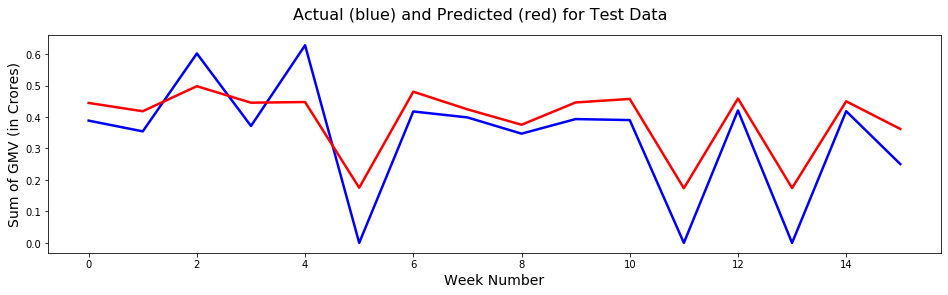

In [124]:
# Using the finally selected features to fit our linear model
model.fit(X_camera_accessory_train[auto_selected_predictors],y_camera_accessory_train)

# Scaling test dataset
scaler = StandardScaler()
cols = X_camera_accessory_test.columns
X_camera_accessory_test[cols] = scaler.fit_transform(X_camera_accessory_test[cols])

# Predicting on train and test dataset
y_train_pred = model.predict(X_camera_accessory_train[auto_selected_predictors])
r_square_train = r2_score(y_camera_accessory_train, y_train_pred)
y_test_pred = model.predict(X_camera_accessory_test[auto_selected_predictors])
r_square_test = r2_score(y_camera_accessory_test, y_test_pred)

# Plotting actual vs. predicted for test dataset
plot_actual_predicted(y_camera_accessory_test, y_test_pred)

# Computing Adjusted R Square
k = len(list(model.coef_))
adj_r_square_train = 1-(1-r_square_train)*(y_camera_accessory_train.size-1)/(y_camera_accessory_train.size-k-1)
adj_r_square_test = 1-(1-r_square_test)*(y_camera_accessory_test.size-1)/(y_camera_accessory_test.size-k-1)

# Printing the Equation
predictors = sorted(list(zip(model.coef_,auto_selected_predictors)),reverse=True, key=lambda x:abs(x[0]))
equation = []
for coff, var in predictors:
    equation.append(f'log(({coff:.02f})*{var})')
print(f'log(GMV) = {" + ".join(equation)}')

# Displaying the metrics score
print(f'\nTRAINING DATASET\nR-Square: \t\t{r_square_train} \nAdjusted R-Square: \t{adj_r_square_train}')
print(f'\nTEST DATASET\nR-Square: \t\t{r_square_test} \nAdjusted R-Square: \t{adj_r_square_test}')

### 5.2 Building Multiplicative Model for Home Audio

In [125]:
# Taking Logarithm, Splitting & Scaling Data
X_home_audio = np.log1p(df_home_audio_original.drop(columns=['gmv']))
y_home_audio = np.log1p(df_home_audio_original['gmv'])

X_home_audio_train, X_home_audio_test, y_home_audio_train, y_home_audio_test = train_test_split(X_home_audio, y_home_audio, test_size = 0.3, random_state = 100)

scaler = StandardScaler()
cols = X_home_audio_train.columns
X_home_audio_train[cols] = scaler.fit_transform(X_home_audio_train[cols])

# Linear Regression Model
model = linear_model.LinearRegression(n_jobs=-1)
model.fit(X_home_audio_train,y_home_audio_train)

# Recursive Feature Elimination | Selecting 3 Features
# In regression analysis, many researchers say that there should be at least 10 observations per variable.
# Thus with ~40 observations, we can have max. 4 features
rfe = RFE(model, 3)
rfe = rfe.fit(X_home_audio_train,y_home_audio_train)

# Ranking of columns w.r.t ranking
auto_selected_predictors = list(X_home_audio_train.columns[rfe.support_])

# First Iteration; Considering all columns
model.fit(X_home_audio_train,y_home_audio_train)
y_pred = model.predict(X_home_audio_train)
r_square = r2_score(y_home_audio_train, y_pred)

# Computing Adjusted R Square
k = len(list(model.coef_))
adj_r_square = 1-(1-r_square)*(y_home_audio_train.size-1)/(y_home_audio_train.size-k-1)

# Printing the Equation
predictors = sorted(list(zip(model.coef_,X_home_audio_train.columns)),reverse=True, key=lambda x:abs(x[0]))
equation = []
for coff, var in predictors:
    equation.append(f'log(({coff:.02f})*{var})')
print(f'log(GMV) = {" + ".join(equation)}')

# Displaying the metrics score
print(f'\nR-Square: \t\t{r_square} \nAdjusted R-Square: \t{adj_r_square}')

log(GMV) = log((-0.29)* Affiliates) + log((0.20)*luxury_product) + log((-0.16)*SEM) + log((0.11)*Content Marketing) + log((0.11)*TV) + log((0.11)*Online marketing) + log((0.08)*stock_index) + log((-0.06)*mass_product) + log((-0.05)*payment_type) + log((-0.04)*is_hot) + log((-0.04)*product_procurement_sla) + log((-0.03)*nps) + log((0.03)*discount_percentage) + log((-0.02)*is_rainy) + log((-0.02)*units) + log((0.02)*sla) + log((0.02)*is_pay_day) + log((0.02)*Digital) + log((-0.01)*week_of_year) + log((-0.01)*is_sale_day) + log((0.01)*Sponsorship) + log((0.00)*is_snow_on_ground)

R-Square: 		0.9649862301315235 
Adjusted R-Square: 	0.9099645917667748


In [126]:
# HOME AUDIO MULTIPLICATIVE MODEL | CONSIDERING FEATURES SELECTED BY RFE, THUS BEST FEATURE SUBSET
make_lr_model_mp(X_home_audio_train, y_home_audio_train, auto_selected_predictors)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     79.43
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.54e-15
Time:                        02:15:42   Log-Likelihood:                 56.182
No. Observations:                  37   AIC:                            -104.4
Df Residuals:                      33   BIC:                            -97.92
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3698      0.009     40.

log(GMV) = log((0.14)*luxury_product) + log((-0.04)* Affiliates) + log((0.04)*SEM)

TRAINING DATASET
R-Square: 		0.8783542019398418 
Adjusted R-Square: 	0.867295493025282

TEST DATASET
R-Square: 		0.6640956327451815 
Adjusted R-Square: 	0.5801195409314768


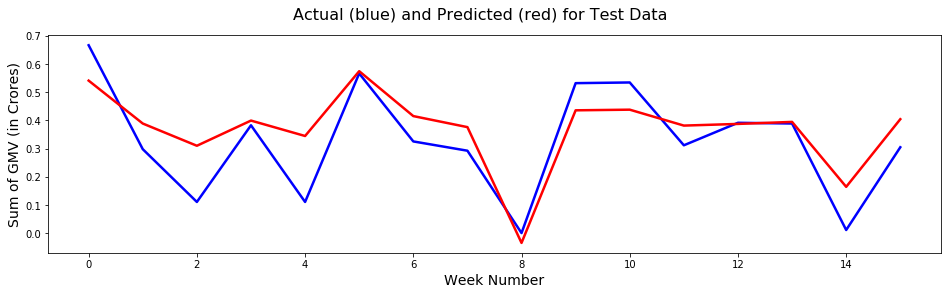

In [127]:
# Using the finally selected features to fit our linear model
model.fit(X_home_audio_train[auto_selected_predictors],y_home_audio_train)

# Scaling test dataset
scaler = StandardScaler()
cols = X_home_audio_test.columns
X_home_audio_test[cols] = scaler.fit_transform(X_home_audio_test[cols])

# Predicting on train and test dataset
y_train_pred = model.predict(X_home_audio_train[auto_selected_predictors])
r_square_train = r2_score(y_home_audio_train, y_train_pred)
y_test_pred = model.predict(X_home_audio_test[auto_selected_predictors])
r_square_test = r2_score(y_home_audio_test, y_test_pred)

# Plotting actual vs. predicted for test dataset
plot_actual_predicted(y_home_audio_test, y_test_pred)

# Computing Adjusted R Square
k = len(list(model.coef_))
adj_r_square_train = 1-(1-r_square_train)*(y_home_audio_train.size-1)/(y_home_audio_train.size-k-1)
adj_r_square_test = 1-(1-r_square_test)*(y_home_audio_test.size-1)/(y_home_audio_test.size-k-1)

# Printing the Equation
predictors = sorted(list(zip(model.coef_,auto_selected_predictors)),reverse=True, key=lambda x:abs(x[0]))
equation = []
for coff, var in predictors:
    equation.append(f'log(({coff:.02f})*{var})')
print(f'log(GMV) = {" + ".join(equation)}')

# Displaying the metrics score
print(f'\nTRAINING DATASET\nR-Square: \t\t{r_square_train} \nAdjusted R-Square: \t{adj_r_square_train}')
print(f'\nTEST DATASET\nR-Square: \t\t{r_square_test} \nAdjusted R-Square: \t{adj_r_square_test}')

### 5.3 Building Multiplicative Model for Gaming Accessory

In [128]:
# Taking Logarithm, Splitting & Scaling Data
X_gaming_accessory = np.log1p(df_gaming_accessory_original.drop(columns=['gmv']))
y_gaming_accessory = np.log1p(df_gaming_accessory_original['gmv'])

X_gaming_accessory_train, X_gaming_accessory_test, y_gaming_accessory_train, y_gaming_accessory_test = train_test_split(X_gaming_accessory, y_gaming_accessory, test_size = 0.3, random_state = 100)

scaler = StandardScaler()
cols = X_gaming_accessory_train.columns
X_gaming_accessory_train[cols] = scaler.fit_transform(X_gaming_accessory_train[cols])

# Linear Regression Model
model = linear_model.LinearRegression(n_jobs=-1)
model.fit(X_gaming_accessory_train,y_gaming_accessory_train)

# Recursive Feature Elimination | Selecting 3 Features
# In regression analysis, many researchers say that there should be at least 10 observations per variable.
# Thus with ~40 observations, we can have max. 4 features
rfe = RFE(model, 3)
rfe = rfe.fit(X_gaming_accessory_train,y_gaming_accessory_train)

# Ranking of columns w.r.t ranking
auto_selected_predictors = list(X_gaming_accessory_train.columns[rfe.support_])

# First Iteration; Considering all columns
model.fit(X_gaming_accessory_train,y_gaming_accessory_train)
y_pred = model.predict(X_gaming_accessory_train)
r_square = r2_score(y_gaming_accessory_train, y_pred)

# Computing Adjusted R Square
k = len(list(model.coef_))
adj_r_square = 1-(1-r_square)*(y_gaming_accessory_train.size-1)/(y_gaming_accessory_train.size-k-1)

# Printing the Equation
predictors = sorted(list(zip(model.coef_,X_gaming_accessory_train.columns)),reverse=True, key=lambda x:abs(x[0]))
equation = []
for coff, var in predictors:
    equation.append(f'log(({coff:.02f})*{var})')
print(f'log(GMV) = {" + ".join(equation)}')

# Displaying the metrics score
print(f'\nR-Square: \t\t{r_square} \nAdjusted R-Square: \t{adj_r_square}')

log(GMV) = log((-0.17)*Online marketing) + log((-0.17)*Digital) + log((0.11)* Affiliates) + log((0.11)*Content Marketing) + log((0.11)*luxury_product) + log((0.10)*SEM) + log((-0.06)*units) + log((0.06)*nps) + log((-0.04)*sla) + log((0.04)*TV) + log((0.04)*mass_product) + log((0.03)*Sponsorship) + log((0.03)*stock_index) + log((-0.03)*payment_type) + log((0.03)*product_procurement_sla) + log((0.03)*discount_percentage) + log((0.01)*is_hot) + log((0.01)*is_sale_day) + log((0.01)*week_of_year) + log((0.01)*is_rainy) + log((0.01)*is_snow_on_ground) + log((0.00)*is_pay_day)

R-Square: 		0.9021366313897294 
Adjusted R-Square: 	0.7483513378593043


In [129]:
# GAMING ACCESSORY MULTIPLICATIVE MODEL | CONSIDERING FEATURES SELECTED BY RFE, THUS BEST FEATURE SUBSET
make_lr_model_mp(X_gaming_accessory_train, y_gaming_accessory_train, auto_selected_predictors)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     41.26
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.86e-11
Time:                        02:15:43   Log-Likelihood:                 63.168
No. Observations:                  37   AIC:                            -118.3
Df Residuals:                      33   BIC:                            -111.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2566    

log(GMV) = log((0.09)*luxury_product) + log((-0.06)*units) + log((0.04)*discount_percentage)

TRAINING DATASET
R-Square: 		0.7895102882203775 
Adjusted R-Square: 	0.7703748598767755

TEST DATASET
R-Square: 		0.6274443702749457 
Adjusted R-Square: 	0.5343054628436821


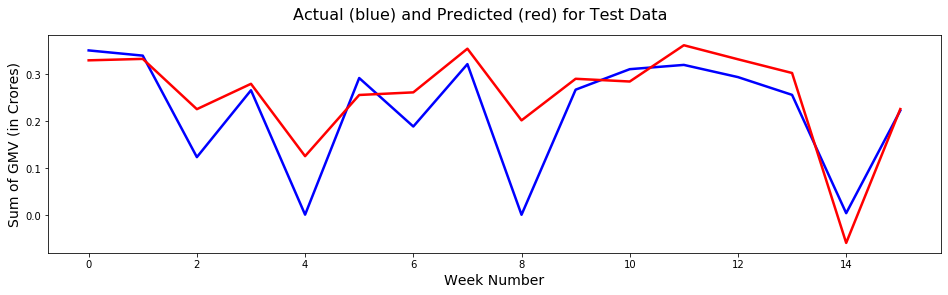

In [130]:
# Using the finally selected features to fit our linear model
model.fit(X_gaming_accessory_train[auto_selected_predictors],y_gaming_accessory_train)

# Scaling test dataset
scaler = StandardScaler()
cols = X_gaming_accessory_test.columns
X_gaming_accessory_test[cols] = scaler.fit_transform(X_gaming_accessory_test[cols])

# Predicting on train and test dataset
y_train_pred = model.predict(X_gaming_accessory_train[auto_selected_predictors])
r_square_train = r2_score(y_gaming_accessory_train, y_train_pred)
y_test_pred = model.predict(X_gaming_accessory_test[auto_selected_predictors])
r_square_test = r2_score(y_gaming_accessory_test, y_test_pred)

# Plotting actual vs. predicted for test dataset
plot_actual_predicted(y_gaming_accessory_test, y_test_pred)

# Computing Adjusted R Square
k = len(list(model.coef_))
adj_r_square_train = 1-(1-r_square_train)*(y_gaming_accessory_train.size-1)/(y_gaming_accessory_train.size-k-1)
adj_r_square_test = 1-(1-r_square_test)*(y_gaming_accessory_test.size-1)/(y_gaming_accessory_test.size-k-1)

# Printing the Equation
predictors = sorted(list(zip(model.coef_,auto_selected_predictors)),reverse=True, key=lambda x:abs(x[0]))
equation = []
for coff, var in predictors:
    equation.append(f'log(({coff:.02f})*{var})')
print(f'log(GMV) = {" + ".join(equation)}')

# Displaying the metrics score
print(f'\nTRAINING DATASET\nR-Square: \t\t{r_square_train} \nAdjusted R-Square: \t{adj_r_square_train}')
print(f'\nTEST DATASET\nR-Square: \t\t{r_square_test} \nAdjusted R-Square: \t{adj_r_square_test}')

### 5.4 Conclusion of Multiplicative Model

1. We noticed a significant drop in r-square value and adjusted r-square value for product subcategory 'Camera Accessory'
2. The features that are mostly affecting GMV for subcategory 'Camera Accessory' are:
    * luxury_product
    * sla
    * Online marketing (Media Investment)
3. We noticed a significant drop in r-square value and adjusted r-square value for product subcategory 'Home Audio'
4. The features that are mostly affecting GMV for subcategory 'Home Audio' are:
    * luxury_product
    * Affiliates
    * SEM (Media Investment)
5. We noticed a significant drop in r-square value and adjusted r-square value for product subcategory 'Gaming Accessory'
6. The features that are mostly affecting GMV for subcategory 'Gaming Accessory' are:
    * luxury_product
    * units
    * Online marketing (Media Investment)
7. The drop in r-square value is significantly high and thus we would prefer simple linear additive model over multiplicative model
8. The performance of all three model varies tremendously and this confirms that the model does not generalize well and thus we would prefer simple linear additive model over multiplicative model


## 6. Building Koyck Model

In [131]:
# Camera Accessory Dataset Preparation (Introducing gmv_lag value) | Lag of dependent feature
X_camera_accessory = df_camera_accessory_original.copy(deep=True)
X_camera_accessory['gmv_lag_1'] = X_camera_accessory['gmv'].shift(1)
X_camera_accessory['gmv_lag_2'] = X_camera_accessory['gmv'].shift(2)
X_camera_accessory['gmv_lag_3'] = X_camera_accessory['gmv'].shift(3)
X_camera_accessory.drop(columns=['gmv'], inplace=True)
X_camera_accessory.interpolate(method ='linear', limit_direction ='backward', inplace=True)
y_camera_accessory = df_camera_accessory_original['gmv']

In [132]:
# Home Audio Dataset Preparation (Introducing gmv_lag value) | Lag of dependent feature
X_home_audio = df_home_audio_original.copy(deep=True)
X_home_audio['gmv_lag_1'] = X_home_audio['gmv'].shift(1)
X_home_audio['gmv_lag_2'] = X_home_audio['gmv'].shift(2)
X_home_audio['gmv_lag_3'] = X_home_audio['gmv'].shift(3)
X_home_audio.drop(columns=['gmv'], inplace=True)
X_home_audio.interpolate(method ='linear', limit_direction ='backward', inplace=True)
y_home_audio = df_home_audio_original['gmv']

In [133]:
# Gaming Accessory Dataset Preparation (Introducing gmv_lag value) | Lag of dependent feature
X_gaming_accessory = df_gaming_accessory_original.copy(deep=True)
X_gaming_accessory['gmv_lag_1'] = X_gaming_accessory['gmv'].shift(1)
X_gaming_accessory['gmv_lag_2'] = X_gaming_accessory['gmv'].shift(2)
X_gaming_accessory['gmv_lag_3'] = X_gaming_accessory['gmv'].shift(3)
X_gaming_accessory.drop(columns=['gmv'], inplace=True)
X_gaming_accessory.interpolate(method ='linear', limit_direction ='backward', inplace=True)
y_gaming_accessory = df_gaming_accessory_original['gmv']

### 6.1 Building Koyck Model for Camera Accessory

In [134]:
# Splitting & Scaling Data
X_camera_accessory_train, X_camera_accessory_test, y_camera_accessory_train, y_camera_accessory_test = train_test_split(X_camera_accessory, y_camera_accessory, test_size = 0.3, random_state = 100)

scaler = StandardScaler()
cols = X_camera_accessory_train.columns
X_camera_accessory_train[cols] = scaler.fit_transform(X_camera_accessory_train[cols])

# Linear Regression Model
model = linear_model.LinearRegression(n_jobs=-1)
model.fit(X_camera_accessory_train,y_camera_accessory_train)

# Recursive Feature Elimination | Selecting 2 Features
# In regression analysis, many researchers say that there should be at least 10 observations per variable.
# Thus with ~40 observations, we can have max. 4 features
rfe = RFE(model, 2)
rfe = rfe.fit(X_camera_accessory_train,y_camera_accessory_train)

# Ranking of columns w.r.t ranking
auto_selected_predictors = list(X_camera_accessory_train.columns[rfe.support_])

# First Iteration; Considering all columns
model.fit(X_camera_accessory_train,y_camera_accessory_train)
y_pred = model.predict(X_camera_accessory_train)
r_square = r2_score(y_camera_accessory_train, y_pred)

# Computing Adjusted R Square
k = len(list(model.coef_))
adj_r_square = 1-(1-r_square)*(y_camera_accessory_train.size-1)/(y_camera_accessory_train.size-k-1)

# Printing the Equation
predictors = sorted(list(zip(model.coef_,X_camera_accessory_train.columns)),reverse=True, key=lambda x:abs(x[0]))
equation = []
for coff, var in predictors:
    equation.append(f'({coff:.02f})*{var}')
print(f'GMV = {" + ".join(equation)}')

# Displaying the metrics score
print(f'\nR-Square: \t\t{r_square} \nAdjusted R-Square: \t{adj_r_square}')

GMV = (0.58)* Affiliates + (-0.56)*Online marketing + (0.48)*SEM + (-0.42)*Digital + (0.12)*luxury_product + (0.08)*nps + (0.08)*mass_product + (0.06)*Sponsorship + (0.03)*is_hot + (-0.03)*TV + (-0.03)*product_procurement_sla + (-0.02)*week_of_year + (-0.02)*payment_type + (0.02)*is_rainy + (-0.02)*stock_index + (0.02)*units + (-0.02)*sla + (-0.01)*gmv_lag_3 + (0.01)*is_snow_on_ground + (-0.01)*is_pay_day + (0.00)*Content Marketing + (-0.00)*gmv_lag_1 + (-0.00)*gmv_lag_2 + (-0.00)*is_sale_day + (-0.00)*discount_percentage

R-Square: 		0.9918365586568143 
Adjusted R-Square: 	0.9732832828768468


In [135]:
# CAMERA ACCESSORY KOYCK MODEL | CONSIDERING FEATURES SELECTED BY RFE, THUS BEST FEATURE SUBSET
make_lr_model_mp(X_camera_accessory_train, y_camera_accessory_train, auto_selected_predictors)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     364.5
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.08e-23
Time:                        02:15:44   Log-Likelihood:                 64.126
No. Observations:                  37   AIC:                            -122.3
Df Residuals:                      34   BIC:                            -117.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4959      0.007     67.

GMV = (0.18)*luxury_product + (0.03)* Affiliates

TRAINING DATASET
R-Square: 		0.9554414816975262 
Adjusted R-Square: 	0.952820392385616

TEST DATASET
R-Square: 		0.805889886325213 
Adjusted R-Square: 	0.7760267919137073


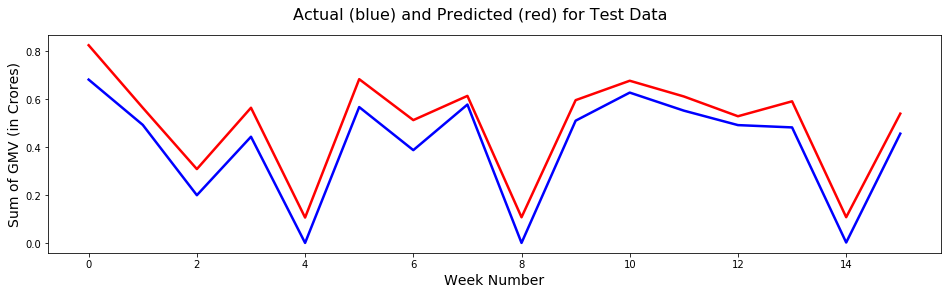

In [136]:
# Using the finally selected features to fit our linear model
model.fit(X_camera_accessory_train[auto_selected_predictors],y_camera_accessory_train)

# Scaling test dataset
scaler = StandardScaler()
cols = X_camera_accessory_test.columns
X_camera_accessory_test[cols] = scaler.fit_transform(X_camera_accessory_test[cols])

# Predicting on train and test dataset
y_train_pred = model.predict(X_camera_accessory_train[auto_selected_predictors])
r_square_train = r2_score(y_camera_accessory_train, y_train_pred)
y_test_pred = model.predict(X_camera_accessory_test[auto_selected_predictors])
r_square_test = r2_score(y_camera_accessory_test, y_test_pred)

# Plotting actual vs. predicted for test dataset
plot_actual_predicted(y_camera_accessory_test, y_test_pred)

# Computing Adjusted R Square
k = len(list(model.coef_))
adj_r_square_train = 1-(1-r_square_train)*(y_camera_accessory_train.size-1)/(y_camera_accessory_train.size-k-1)
adj_r_square_test = 1-(1-r_square_test)*(y_camera_accessory_test.size-1)/(y_camera_accessory_test.size-k-1)

# Printing the Equation
predictors = sorted(list(zip(model.coef_,auto_selected_predictors)),reverse=True, key=lambda x:abs(x[0]))
equation = []
for coff, var in predictors:
    equation.append(f'({coff:.02f})*{var}')
print(f'GMV = {" + ".join(equation)}')

# Displaying the metrics score
print(f'\nTRAINING DATASET\nR-Square: \t\t{r_square_train} \nAdjusted R-Square: \t{adj_r_square_train}')
print(f'\nTEST DATASET\nR-Square: \t\t{r_square_test} \nAdjusted R-Square: \t{adj_r_square_test}')

### 6.2 Building Koyck Model for Home Audio

In [137]:
# Splitting & Scaling Data
X_home_audio_train, X_home_audio_test, y_home_audio_train, y_home_audio_test = train_test_split(X_home_audio, y_home_audio, test_size = 0.3, random_state = 100)

scaler = StandardScaler()
cols = X_home_audio_train.columns
X_home_audio_train[cols] = scaler.fit_transform(X_home_audio_train[cols])

# Linear Regression Model
model = linear_model.LinearRegression(n_jobs=-1)
model.fit(X_home_audio_train,y_home_audio_train)

# Recursive Feature Elimination | Selecting 2 Features
# In regression analysis, many researchers say that there should be at least 10 observations per variable.
# Thus with ~40 observations, we can have max. 4 features
rfe = RFE(model, 2)
rfe = rfe.fit(X_home_audio_train,y_home_audio_train)

# Ranking of columns w.r.t ranking
auto_selected_predictors = list(X_home_audio_train.columns[rfe.support_])

# First Iteration; Considering all columns
model.fit(X_home_audio_train,y_home_audio_train)
y_pred = model.predict(X_home_audio_train)
r_square = r2_score(y_home_audio_train, y_pred)

# Computing Adjusted R Square
k = len(list(model.coef_))
adj_r_square = 1-(1-r_square)*(y_home_audio_train.size-1)/(y_home_audio_train.size-k-1)

# Printing the Equation
predictors = sorted(list(zip(model.coef_,X_home_audio_train.columns)),reverse=True, key=lambda x:abs(x[0]))
equation = []
for coff, var in predictors:
    equation.append(f'({coff:.02f})*{var}')
print(f'GMV = {" + ".join(equation)}')

# Displaying the metrics score
print(f'\nR-Square: \t\t{r_square} \nAdjusted R-Square: \t{adj_r_square}')

GMV = (-0.73)* Affiliates + (0.72)*Online marketing + (0.27)*Digital + (0.24)*luxury_product + (-0.21)*SEM + (0.08)*week_of_year + (-0.08)*Content Marketing + (0.08)*mass_product + (-0.06)*Sponsorship + (0.04)*payment_type + (0.03)*sla + (-0.02)*nps + (0.01)*is_rainy + (0.01)*gmv_lag_3 + (0.01)*TV + (-0.01)*gmv_lag_2 + (0.01)*is_sale_day + (0.01)*is_pay_day + (-0.00)*is_hot + (0.00)*discount_percentage + (-0.00)*gmv_lag_1 + (0.00)*is_snow_on_ground + (-0.00)*stock_index + (-0.00)*product_procurement_sla + (0.00)*units

R-Square: 		0.9891903210459464 
Adjusted R-Square: 	0.9646228688776427


In [138]:
# HOME audio_train KOYCK MODEL | CONSIDERING FEATURES SELECTED BY RFE, THUS BEST FEATURE SUBSET
make_lr_model_mp(X_home_audio_train, y_home_audio_train, auto_selected_predictors)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     207.0
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           9.16e-20
Time:                        02:15:45   Log-Likelihood:                 42.894
No. Observations:                  37   AIC:                            -79.79
Df Residuals:                      34   BIC:                            -74.96
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4666      0.013     35.

GMV = (0.24)*luxury_product + (0.05)*Digital

TRAINING DATASET
R-Square: 		0.9241238759960344 
Adjusted R-Square: 	0.9196605745840364

TEST DATASET
R-Square: 		0.8649211591406532 
Adjusted R-Square: 	0.8441397990084459


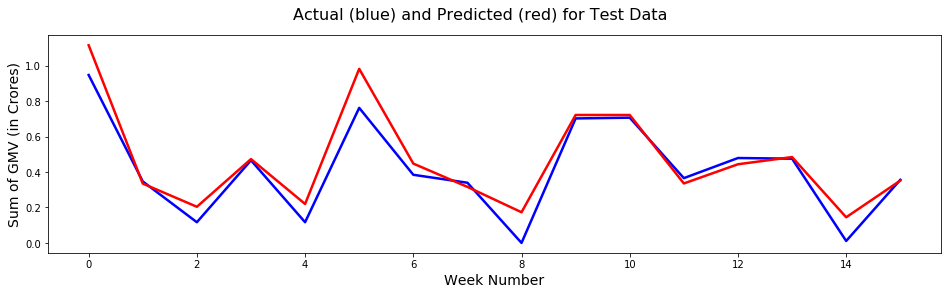

In [139]:
# Using the finally selected features to fit our linear model
model.fit(X_home_audio_train[auto_selected_predictors],y_home_audio_train)

# Scaling test dataset
scaler = StandardScaler()
cols = X_home_audio_test.columns
X_home_audio_test[cols] = scaler.fit_transform(X_home_audio_test[cols])

# Predicting on train and test dataset
y_train_pred = model.predict(X_home_audio_train[auto_selected_predictors])
r_square_train = r2_score(y_home_audio_train, y_train_pred)
y_test_pred = model.predict(X_home_audio_test[auto_selected_predictors])
r_square_test = r2_score(y_home_audio_test, y_test_pred)

# Plotting actual vs. predicted for test dataset
plot_actual_predicted(y_home_audio_test, y_test_pred)

# Computing Adjusted R Square
k = len(list(model.coef_))
adj_r_square_train = 1-(1-r_square_train)*(y_home_audio_train.size-1)/(y_home_audio_train.size-k-1)
adj_r_square_test = 1-(1-r_square_test)*(y_home_audio_test.size-1)/(y_home_audio_test.size-k-1)

# Printing the Equation
predictors = sorted(list(zip(model.coef_,auto_selected_predictors)),reverse=True, key=lambda x:abs(x[0]))
equation = []
for coff, var in predictors:
    equation.append(f'({coff:.02f})*{var}')
print(f'GMV = {" + ".join(equation)}')

# Displaying the metrics score
print(f'\nTRAINING DATASET\nR-Square: \t\t{r_square_train} \nAdjusted R-Square: \t{adj_r_square_train}')
print(f'\nTEST DATASET\nR-Square: \t\t{r_square_test} \nAdjusted R-Square: \t{adj_r_square_test}')

### 6.3 Building Koyck Model for Gaming Accessory

In [140]:
# Splitting & Scaling Data
X_gaming_accessory_train, X_gaming_accessory_test, y_gaming_accessory_train, y_gaming_accessory_test = train_test_split(X_gaming_accessory, y_gaming_accessory, test_size = 0.3, random_state = 100)

scaler = StandardScaler()
cols = X_gaming_accessory_train.columns
X_gaming_accessory_train[cols] = scaler.fit_transform(X_gaming_accessory_train[cols])

# Linear Regression Model
model = linear_model.LinearRegression(n_jobs=-1)
model.fit(X_gaming_accessory_train,y_gaming_accessory_train)

# Recursive Feature Elimination | Selecting 2 Features
# In regression analysis, many researchers say that there should be at least 10 observations per variable.
# Thus with ~40 observations, we can have max. 4 features
rfe = RFE(model, 2)
rfe = rfe.fit(X_gaming_accessory_train,y_gaming_accessory_train)

# Ranking of columns w.r.t ranking
auto_selected_predictors = list(X_gaming_accessory_train.columns[rfe.support_])

# First Iteration; Considering all columns
model.fit(X_gaming_accessory_train,y_gaming_accessory_train)
y_pred = model.predict(X_gaming_accessory_train)
r_square = r2_score(y_gaming_accessory_train, y_pred)

# Computing Adjusted R Square
k = len(list(model.coef_))
adj_r_square = 1-(1-r_square)*(y_gaming_accessory_train.size-1)/(y_gaming_accessory_train.size-k-1)

# Printing the Equation
predictors = sorted(list(zip(model.coef_,X_gaming_accessory_train.columns)),reverse=True, key=lambda x:abs(x[0]))
equation = []
for coff, var in predictors:
    equation.append(f'({coff:.02f})*{var}')
print(f'GMV = {" + ".join(equation)}')

# Displaying the metrics score
print(f'\nR-Square: \t\t{r_square} \nAdjusted R-Square: \t{adj_r_square}')

GMV = (-0.52)* Affiliates + (0.49)*Online marketing + (-0.49)*SEM + (0.47)*Digital + (-0.20)*nps + (0.09)*luxury_product + (-0.09)*units + (0.07)*payment_type + (0.06)*discount_percentage + (-0.06)*Sponsorship + (-0.05)*gmv_lag_1 + (-0.04)*is_hot + (0.03)*gmv_lag_3 + (-0.02)*TV + (0.02)*sla + (0.02)*is_sale_day + (0.02)*mass_product + (-0.01)*Content Marketing + (-0.01)*gmv_lag_2 + (-0.01)*product_procurement_sla + (-0.01)*is_pay_day + (0.01)*week_of_year + (-0.01)*is_rainy + (0.01)*stock_index + (-0.00)*is_snow_on_ground

R-Square: 		0.9888607078328014 
Adjusted R-Square: 	0.963544134725532


In [141]:
# GAMING accessory_train KOYCK MODEL | CONSIDERING FEATURES SELECTED BY RFE, THUS BEST FEATURE SUBSET
make_lr_model_mp(X_gaming_accessory_train, y_gaming_accessory_train, auto_selected_predictors)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     60.95
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.71e-12
Time:                        02:15:46   Log-Likelihood:                 52.890
No. Observations:                  37   AIC:                            -99.78
Df Residuals:                      34   BIC:                            -94.95
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2985      0.010     30.

GMV = (0.11)*luxury_product + (0.04)*SEM

TRAINING DATASET
R-Square: 		0.7819150775352584 
Adjusted R-Square: 	0.7690865526843912

TEST DATASET
R-Square: 		0.7780251754017589 
Adjusted R-Square: 	0.7438752023866448


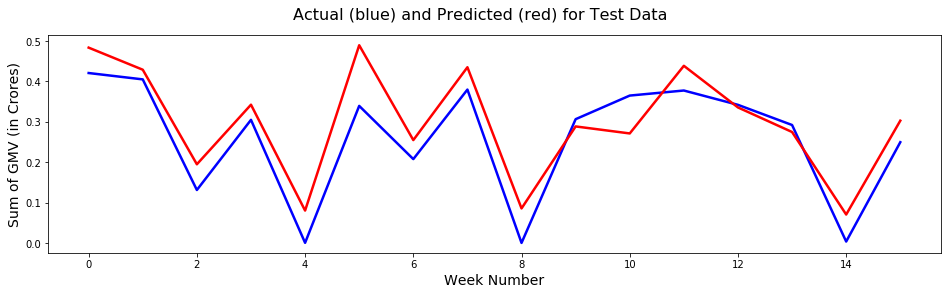

In [142]:
# Using the finally selected features to fit our linear model
model.fit(X_gaming_accessory_train[auto_selected_predictors],y_gaming_accessory_train)

# Scaling test dataset
scaler = StandardScaler()
cols = X_gaming_accessory_test.columns
X_gaming_accessory_test[cols] = scaler.fit_transform(X_gaming_accessory_test[cols])

# Predicting on train and test dataset
y_train_pred = model.predict(X_gaming_accessory_train[auto_selected_predictors])
r_square_train = r2_score(y_gaming_accessory_train, y_train_pred)
y_test_pred = model.predict(X_gaming_accessory_test[auto_selected_predictors])
r_square_test = r2_score(y_gaming_accessory_test, y_test_pred)

# Plotting actual vs. predicted for test dataset
plot_actual_predicted(y_gaming_accessory_test, y_test_pred)

# Computing Adjusted R Square
k = len(list(model.coef_))
adj_r_square_train = 1-(1-r_square_train)*(y_gaming_accessory_train.size-1)/(y_gaming_accessory_train.size-k-1)
adj_r_square_test = 1-(1-r_square_test)*(y_gaming_accessory_test.size-1)/(y_gaming_accessory_test.size-k-1)

# Printing the Equation
predictors = sorted(list(zip(model.coef_,auto_selected_predictors)),reverse=True, key=lambda x:abs(x[0]))
equation = []
for coff, var in predictors:
    equation.append(f'({coff:.02f})*{var}')
print(f'GMV = {" + ".join(equation)}')

# Displaying the metrics score
print(f'\nTRAINING DATASET\nR-Square: \t\t{r_square_train} \nAdjusted R-Square: \t{adj_r_square_train}')
print(f'\nTEST DATASET\nR-Square: \t\t{r_square_test} \nAdjusted R-Square: \t{adj_r_square_test}')

### 6.4 Conclusion of Koyck Model

1. We are able to achieve decent r-square value and adjusted r-square value for product subcategory 'Camera Accessory', however the model is not much generalizable as performance varies greatly on test and train dataset.
2. The features that are mostly affecting GMV for subcategory 'Camera Accessory' are:
    * luxury_product
    * Affiliates (Media Investment)
3. We are able to achieve decent r-square value and adjusted r-square value for product subcategory 'Home Audio'
4. The features that are mostly affecting GMV for subcategory 'Home Audio' are:
    * luxury_product
    * Digital (Media Investment)
5. We are able to achieve decent r-square value and adjusted r-square value for product subcategory 'Gaming Accessory'
6. The features that are mostly affecting GMV for subcategory 'Gaming Accessory' are:
    * luxury_product
    * SEM (Media Investment)

## 7. Building Distributed Lag Model (Additive)

In [143]:
# Camera Accessory Dataset Preparation (Introducing lag values) | Lag of dependent as well as independent features
X_camera_accessory = df_camera_accessory_original.copy(deep=True)
X_camera_accessory['gmv_lag_1'] = X_camera_accessory['gmv'].shift(1)
X_camera_accessory['TV_lag_1'] = X_camera_accessory['TV'].shift(1)
X_camera_accessory['Digital_lag_1'] = X_camera_accessory['Digital'].shift(1)
X_camera_accessory['Sponsorship_lag_1'] = X_camera_accessory['Sponsorship'].shift(1)
X_camera_accessory['Content_Marketing_lag_1'] = X_camera_accessory['Content Marketing'].shift(1)
X_camera_accessory['Online_marketing_lag_1'] = X_camera_accessory['Online marketing'].shift(1)
X_camera_accessory['Affiliates_lag_1'] = X_camera_accessory[' Affiliates'].shift(1)
X_camera_accessory['SEM_lag_1'] = X_camera_accessory['SEM'].shift(1)

X_camera_accessory.drop(columns=['gmv', 'TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates', 'SEM'], inplace=True)
X_camera_accessory.interpolate(method ='linear', limit_direction ='backward', inplace=True)
y_camera_accessory = df_camera_accessory_original['gmv']

In [144]:
# Home Audio Dataset Preparation (Introducing lag values) | Lag of dependent as well as independent features
X_home_audio = df_home_audio_original.copy(deep=True)
X_home_audio['gmv_lag_1'] = X_home_audio['gmv'].shift(1)
X_home_audio['TV_lag_1'] = X_home_audio['TV'].shift(1)
X_home_audio['Digital_lag_1'] = X_home_audio['Digital'].shift(1)
X_home_audio['Sponsorship_lag_1'] = X_home_audio['Sponsorship'].shift(1)
X_home_audio['Content_Marketing_lag_1'] = X_home_audio['Content Marketing'].shift(1)
X_home_audio['Online_marketing_lag_1'] = X_home_audio['Online marketing'].shift(1)
X_home_audio['Affiliates_lag_1'] = X_home_audio[' Affiliates'].shift(1)
X_home_audio['SEM_lag_1'] = X_home_audio['SEM'].shift(1)

X_home_audio.drop(columns=['gmv', 'TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates', 'SEM'], inplace=True)
X_home_audio.interpolate(method ='linear', limit_direction ='backward', inplace=True)
y_home_audio = df_home_audio_original['gmv']

In [145]:
# Gaming Accessory Dataset Preparation (Introducing lag values) | Lag of dependent as well as independent features
X_gaming_accessory = df_gaming_accessory_original.copy(deep=True)
X_gaming_accessory['gmv_lag_1'] = X_gaming_accessory['gmv'].shift(1)
X_gaming_accessory['TV_lag_1'] = X_gaming_accessory['TV'].shift(1)
X_gaming_accessory['Digital_lag_1'] = X_gaming_accessory['Digital'].shift(1)
X_gaming_accessory['Sponsorship_lag_1'] = X_gaming_accessory['Sponsorship'].shift(1)
X_gaming_accessory['Content_Marketing_lag_1'] = X_gaming_accessory['Content Marketing'].shift(1)
X_gaming_accessory['Online_marketing_lag_1'] = X_gaming_accessory['Online marketing'].shift(1)
X_gaming_accessory['Affiliates_lag_1'] = X_gaming_accessory[' Affiliates'].shift(1)
X_gaming_accessory['SEM_lag_1'] = X_gaming_accessory['SEM'].shift(1)

X_gaming_accessory.drop(columns=['gmv', 'TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates', 'SEM'], inplace=True)
X_gaming_accessory.interpolate(method ='linear', limit_direction ='backward', inplace=True)
y_gaming_accessory = df_gaming_accessory_original['gmv']

### 7.1 Building Distributed Lag (Additive) Model for Camera Accessory

In [146]:
# Splitting & Scaling Data
X_camera_accessory_train, X_camera_accessory_test, y_camera_accessory_train, y_camera_accessory_test = train_test_split(X_camera_accessory, y_camera_accessory, test_size = 0.3, random_state = 100)

scaler = StandardScaler()
cols = X_camera_accessory_train.columns
X_camera_accessory_train[cols] = scaler.fit_transform(X_camera_accessory_train[cols])

# Linear Regression Model
model = linear_model.LinearRegression(n_jobs=-1)
model.fit(X_camera_accessory_train,y_camera_accessory_train)

# Recursive Feature Elimination | Selecting 4 Features
# In regression analysis, many researchers say that there should be at least 10 observations per variable.
# Thus with ~40 observations, we can have max. 4 features
rfe = RFE(model, 4)
rfe = rfe.fit(X_camera_accessory_train,y_camera_accessory_train)

# Ranking of columns w.r.t ranking
auto_selected_predictors = list(X_camera_accessory_train.columns[rfe.support_])

# First Iteration; Considering all columns
model.fit(X_camera_accessory_train,y_camera_accessory_train)
y_pred = model.predict(X_camera_accessory_train)
r_square = r2_score(y_camera_accessory_train, y_pred)

# Computing Adjusted R Square
k = len(list(model.coef_))
adj_r_square = 1-(1-r_square)*(y_camera_accessory_train.size-1)/(y_camera_accessory_train.size-k-1)

# Printing the Equation
predictors = sorted(list(zip(model.coef_,X_camera_accessory_train.columns)),reverse=True, key=lambda x:abs(x[0]))
equation = []
for coff, var in predictors:
    equation.append(f'({coff:.02f})*{var}')
print(f'GMV = {" + ".join(equation)}')

# Displaying the metrics score
print(f'\nR-Square: \t\t{r_square} \nAdjusted R-Square: \t{adj_r_square}')

GMV = (0.16)*SEM_lag_1 + (0.13)*luxury_product + (-0.11)*Digital_lag_1 + (-0.08)*Content_Marketing_lag_1 + (0.07)*Online_marketing_lag_1 + (0.06)*mass_product + (-0.02)*Affiliates_lag_1 + (0.02)*is_hot + (-0.02)*week_of_year + (0.02)*is_rainy + (0.02)*payment_type + (0.02)*discount_percentage + (0.01)*sla + (-0.01)*stock_index + (0.01)*Sponsorship_lag_1 + (0.00)*product_procurement_sla + (-0.00)*nps + (-0.00)*is_pay_day + (-0.00)*is_sale_day + (0.00)*units + (0.00)*TV_lag_1 + (0.00)*gmv_lag_1 + (0.00)*is_snow_on_ground

R-Square: 		0.9884964871722582 
Adjusted R-Square: 	0.9681441183231767


In [147]:
# CAMERA ACCESSORY DISTRIBUTED LAG (ADDITIVE) MODEL | CONSIDERING FEATURES SELECTED BY RFE, THUS BEST FEATURE SUBSET
make_lr_model_mp(X_camera_accessory_train, y_camera_accessory_train, auto_selected_predictors)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     186.8
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.07e-21
Time:                        02:15:48   Log-Likelihood:                 65.634
No. Observations:                  37   AIC:                            -121.3
Df Residuals:                      32   BIC:                            -113.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [148]:
# Further feature selection (based on p-value and VIF)
auto_selected_predictors.remove('SEM_lag_1')
auto_selected_predictors.remove('Online_marketing_lag_1')
make_lr_model_mp(X_camera_accessory_train, y_camera_accessory_train, auto_selected_predictors)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     362.6
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.17e-23
Time:                        02:15:48   Log-Likelihood:                 64.031
No. Observations:                  37   AIC:                            -122.1
Df Residuals:                      34   BIC:                            -117.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4959      0.007  

GMV = (0.18)*luxury_product + (0.03)*Affiliates_lag_1

TRAINING DATASET
R-Square: 		0.9552128596365181 
Adjusted R-Square: 	0.952578321968078

TEST DATASET
R-Square: 		0.8055352714311541 
Adjusted R-Square: 	0.7756176208821008


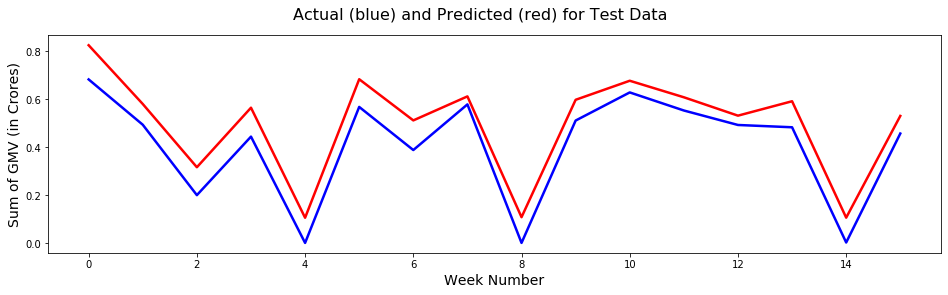

In [149]:
# Using the finally selected features to fit our linear model
model.fit(X_camera_accessory_train[auto_selected_predictors],y_camera_accessory_train)

# Scaling test dataset
scaler = StandardScaler()
cols = X_camera_accessory_test.columns
X_camera_accessory_test[cols] = scaler.fit_transform(X_camera_accessory_test[cols])

# Predicting on train and test dataset
y_train_pred = model.predict(X_camera_accessory_train[auto_selected_predictors])
r_square_train = r2_score(y_camera_accessory_train, y_train_pred)
y_test_pred = model.predict(X_camera_accessory_test[auto_selected_predictors])
r_square_test = r2_score(y_camera_accessory_test, y_test_pred)

# Plotting actual vs. predicted for test dataset
plot_actual_predicted(y_camera_accessory_test, y_test_pred)

# Computing Adjusted R Square
k = len(list(model.coef_))
adj_r_square_train = 1-(1-r_square_train)*(y_camera_accessory_train.size-1)/(y_camera_accessory_train.size-k-1)
adj_r_square_test = 1-(1-r_square_test)*(y_camera_accessory_test.size-1)/(y_camera_accessory_test.size-k-1)

# Printing the Equation
predictors = sorted(list(zip(model.coef_,auto_selected_predictors)),reverse=True, key=lambda x:abs(x[0]))
equation = []
for coff, var in predictors:
    equation.append(f'({coff:.02f})*{var}')
print(f'GMV = {" + ".join(equation)}')

# Displaying the metrics score
print(f'\nTRAINING DATASET\nR-Square: \t\t{r_square_train} \nAdjusted R-Square: \t{adj_r_square_train}')
print(f'\nTEST DATASET\nR-Square: \t\t{r_square_test} \nAdjusted R-Square: \t{adj_r_square_test}')

### 7.2 Building Distributed Lag (Additive) Model for Home Audio

In [150]:
# Splitting & Scaling Data
X_home_audio_train, X_home_audio_test, y_home_audio_train, y_home_audio_test = train_test_split(X_home_audio, y_home_audio, test_size = 0.3, random_state = 100)

scaler = StandardScaler()
cols = X_home_audio_train.columns
X_home_audio_train[cols] = scaler.fit_transform(X_home_audio_train[cols])

# Linear Regression Model
model = linear_model.LinearRegression(n_jobs=-1)
model.fit(X_home_audio_train,y_home_audio_train)

# Recursive Feature Elimination | Selecting 4 Features
# In regression analysis, many researchers say that there should be at least 10 observations per variable.
# Thus with ~40 observations, we can have max. 4 features
rfe = RFE(model, 4)
rfe = rfe.fit(X_home_audio_train,y_home_audio_train)

# Ranking of columns w.r.t ranking
auto_selected_predictors = list(X_home_audio_train.columns[rfe.support_])

# First Iteration; Considering all columns
model.fit(X_home_audio_train,y_home_audio_train)
y_pred = model.predict(X_home_audio_train)
r_square = r2_score(y_home_audio_train, y_pred)

# Computing Adjusted R Square
k = len(list(model.coef_))
adj_r_square = 1-(1-r_square)*(y_home_audio_train.size-1)/(y_home_audio_train.size-k-1)

# Printing the Equation
predictors = sorted(list(zip(model.coef_,X_home_audio_train.columns)),reverse=True, key=lambda x:abs(x[0]))
equation = []
for coff, var in predictors:
    equation.append(f'({coff:.02f})*{var}')
print(f'GMV = {" + ".join(equation)}')

# Displaying the metrics score
print(f'\nR-Square: \t\t{r_square} \nAdjusted R-Square: \t{adj_r_square}')

GMV = (-0.85)*Affiliates_lag_1 + (0.82)*Online_marketing_lag_1 + (0.26)*luxury_product + (0.19)*Digital_lag_1 + (-0.15)*SEM_lag_1 + (-0.08)*Content_Marketing_lag_1 + (0.07)*mass_product + (-0.06)*Sponsorship_lag_1 + (0.06)*week_of_year + (0.06)*TV_lag_1 + (-0.02)*product_procurement_sla + (-0.02)*is_hot + (0.02)*sla + (0.02)*stock_index + (0.02)*units + (0.01)*is_pay_day + (0.01)*gmv_lag_1 + (-0.01)*is_sale_day + (0.01)*nps + (-0.00)*payment_type + (0.00)*is_rainy + (-0.00)*discount_percentage + (0.00)*is_snow_on_ground

R-Square: 		0.9879885661795806 
Adjusted R-Square: 	0.9667375678819157


In [151]:
# HOME audio_train DISTRIBUTED LAG (ADDITIVE) MODEL | CONSIDERING FEATURES SELECTED BY RFE, THUS BEST FEATURE SUBSET
make_lr_model_mp(X_home_audio_train, y_home_audio_train, auto_selected_predictors)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     101.3
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.07e-17
Time:                        02:15:49   Log-Likelihood:                 43.568
No. Observations:                  37   AIC:                            -77.14
Df Residuals:                      32   BIC:                            -69.08
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [152]:
# Further feature selection (based on p-value and VIF)
auto_selected_predictors.remove('Affiliates_lag_1')
make_lr_model_mp(X_home_audio_train, y_home_audio_train, auto_selected_predictors)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     139.3
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           8.25e-19
Time:                        02:15:49   Log-Likelihood:                 43.568
No. Observations:                  37   AIC:                            -79.14
Df Residuals:                      33   BIC:                            -72.69
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

GMV = (0.25)*luxury_product + (0.05)*Digital_lag_1 + (-0.03)*Online_marketing_lag_1

TRAINING DATASET
R-Square: 		0.9268362232994745 
Adjusted R-Square: 	0.9201849708721539

TEST DATASET
R-Square: 		0.8196967704237463 
Adjusted R-Square: 	0.7746209630296829


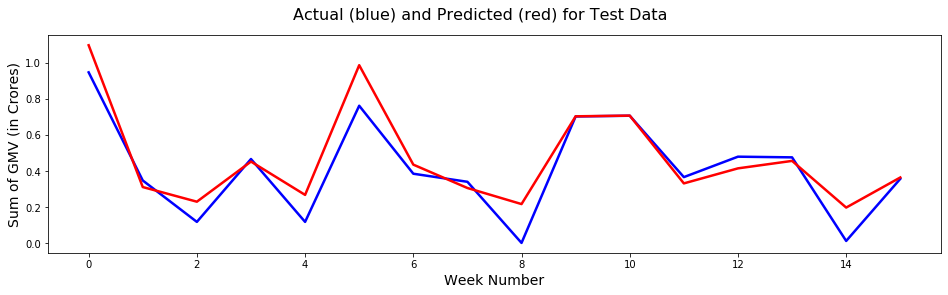

In [153]:
# Using the finally selected features to fit our linear model
model.fit(X_home_audio_train[auto_selected_predictors],y_home_audio_train)

# Scaling test dataset
scaler = StandardScaler()
cols = X_home_audio_test.columns
X_home_audio_test[cols] = scaler.fit_transform(X_home_audio_test[cols])

# Predicting on train and test dataset
y_train_pred = model.predict(X_home_audio_train[auto_selected_predictors])
r_square_train = r2_score(y_home_audio_train, y_train_pred)
y_test_pred = model.predict(X_home_audio_test[auto_selected_predictors])
r_square_test = r2_score(y_home_audio_test, y_test_pred)

# Plotting actual vs. predicted for test dataset
plot_actual_predicted(y_home_audio_test, y_test_pred)

# Computing Adjusted R Square
k = len(list(model.coef_))
adj_r_square_train = 1-(1-r_square_train)*(y_home_audio_train.size-1)/(y_home_audio_train.size-k-1)
adj_r_square_test = 1-(1-r_square_test)*(y_home_audio_test.size-1)/(y_home_audio_test.size-k-1)

# Printing the Equation
predictors = sorted(list(zip(model.coef_,auto_selected_predictors)),reverse=True, key=lambda x:abs(x[0]))
equation = []
for coff, var in predictors:
    equation.append(f'({coff:.02f})*{var}')
print(f'GMV = {" + ".join(equation)}')

# Displaying the metrics score
print(f'\nTRAINING DATASET\nR-Square: \t\t{r_square_train} \nAdjusted R-Square: \t{adj_r_square_train}')
print(f'\nTEST DATASET\nR-Square: \t\t{r_square_test} \nAdjusted R-Square: \t{adj_r_square_test}')

### 7.3 Building Distributed Lag (Additive) Model for Gaming Accessory

In [154]:
# Splitting & Scaling Data
X_gaming_accessory_train, X_gaming_accessory_test, y_gaming_accessory_train, y_gaming_accessory_test = train_test_split(X_gaming_accessory, y_gaming_accessory, test_size = 0.3, random_state = 100)

scaler = StandardScaler()
cols = X_gaming_accessory_train.columns
X_gaming_accessory_train[cols] = scaler.fit_transform(X_gaming_accessory_train[cols])

# Linear Regression Model
model = linear_model.LinearRegression(n_jobs=-1)
model.fit(X_gaming_accessory_train,y_gaming_accessory_train)

# Recursive Feature Elimination | Selecting 4 Features
# In regression analysis, many researchers say that there should be at least 10 observations per variable.
# Thus with ~40 observations, we can have max. 4 features
rfe = RFE(model, 4)
rfe = rfe.fit(X_gaming_accessory_train,y_gaming_accessory_train)

# Ranking of columns w.r.t ranking
auto_selected_predictors = list(X_gaming_accessory_train.columns[rfe.support_])

# First Iteration; Considering all columns
model.fit(X_gaming_accessory_train,y_gaming_accessory_train)
y_pred = model.predict(X_gaming_accessory_train)
r_square = r2_score(y_gaming_accessory_train, y_pred)

# Computing Adjusted R Square
k = len(list(model.coef_))
adj_r_square = 1-(1-r_square)*(y_gaming_accessory_train.size-1)/(y_gaming_accessory_train.size-k-1)

# Printing the Equation
predictors = sorted(list(zip(model.coef_,X_gaming_accessory_train.columns)),reverse=True, key=lambda x:abs(x[0]))
equation = []
for coff, var in predictors:
    equation.append(f'({coff:.02f})*{var}')
print(f'GMV = {" + ".join(equation)}')

# Displaying the metrics score
print(f'\nR-Square: \t\t{r_square} \nAdjusted R-Square: \t{adj_r_square}')

GMV = (-0.22)*SEM_lag_1 + (0.17)*Digital_lag_1 + (0.09)*luxury_product + (-0.05)*nps + (0.05)*Content_Marketing_lag_1 + (0.04)*Online_marketing_lag_1 + (0.03)*mass_product + (-0.03)*TV_lag_1 + (0.02)*stock_index + (-0.02)*gmv_lag_1 + (0.02)*week_of_year + (-0.02)*is_hot + (-0.02)*units + (-0.02)*sla + (0.01)*product_procurement_sla + (-0.01)*Affiliates_lag_1 + (0.01)*is_sale_day + (0.01)*discount_percentage + (0.01)*payment_type + (-0.00)*is_rainy + (0.00)*is_pay_day + (0.00)*is_snow_on_ground + (0.00)*Sponsorship_lag_1

R-Square: 		0.9864812228382394 
Adjusted R-Square: 	0.9625633863212782


In [155]:
# GAMING accessory_train DISTRIBUTED LAG (ADDITIVE) MODEL | CONSIDERING FEATURES SELECTED BY RFE, THUS BEST FEATURE SUBSET
make_lr_model_mp(X_gaming_accessory_train, y_gaming_accessory_train, auto_selected_predictors)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     3.786
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0125
Time:                        02:15:50   Log-Likelihood:                 31.884
No. Observations:                  37   AIC:                            -53.77
Df Residuals:                      32   BIC:                            -45.71
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [156]:
# Further feature selection (based on p-value and VIF)
auto_selected_predictors.remove('SEM_lag_1')
make_lr_model_mp(X_gaming_accessory_train, y_gaming_accessory_train, auto_selected_predictors)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     5.064
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00539
Time:                        02:15:50   Log-Likelihood:                 31.723
No. Observations:                  37   AIC:                            -55.45
Df Residuals:                      33   BIC:                            -49.00
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

GMV = (0.11)*Online_marketing_lag_1 + (-0.03)*Affiliates_lag_1 + (-0.02)*Digital_lag_1

TRAINING DATASET
R-Square: 		0.3152558188042086 
Adjusted R-Square: 	0.2530063477864094

TEST DATASET
R-Square: 		0.618351949057205 
Adjusted R-Square: 	0.5229399363215064


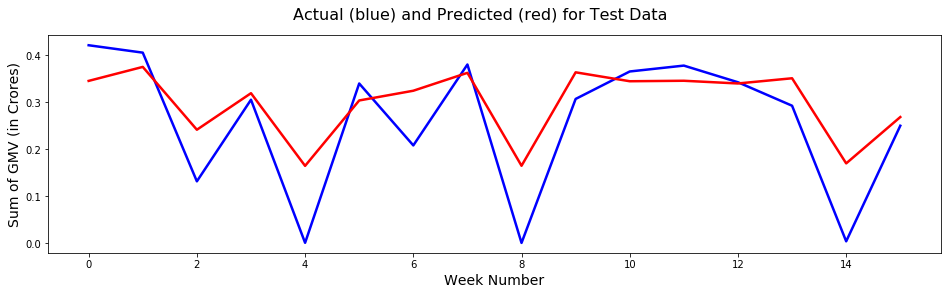

In [157]:
# Using the finally selected features to fit our linear model
model.fit(X_gaming_accessory_train[auto_selected_predictors],y_gaming_accessory_train)

# Scaling test dataset
scaler = StandardScaler()
cols = X_gaming_accessory_test.columns
X_gaming_accessory_test[cols] = scaler.fit_transform(X_gaming_accessory_test[cols])

# Predicting on train and test dataset
y_train_pred = model.predict(X_gaming_accessory_train[auto_selected_predictors])
r_square_train = r2_score(y_gaming_accessory_train, y_train_pred)
y_test_pred = model.predict(X_gaming_accessory_test[auto_selected_predictors])
r_square_test = r2_score(y_gaming_accessory_test, y_test_pred)

# Plotting actual vs. predicted for test dataset
plot_actual_predicted(y_gaming_accessory_test, y_test_pred)

# Computing Adjusted R Square
k = len(list(model.coef_))
adj_r_square_train = 1-(1-r_square_train)*(y_gaming_accessory_train.size-1)/(y_gaming_accessory_train.size-k-1)
adj_r_square_test = 1-(1-r_square_test)*(y_gaming_accessory_test.size-1)/(y_gaming_accessory_test.size-k-1)

# Printing the Equation
predictors = sorted(list(zip(model.coef_,auto_selected_predictors)),reverse=True, key=lambda x:abs(x[0]))
equation = []
for coff, var in predictors:
    equation.append(f'({coff:.02f})*{var}')
print(f'GMV = {" + ".join(equation)}')

# Displaying the metrics score
print(f'\nTRAINING DATASET\nR-Square: \t\t{r_square_train} \nAdjusted R-Square: \t{adj_r_square_train}')
print(f'\nTEST DATASET\nR-Square: \t\t{r_square_test} \nAdjusted R-Square: \t{adj_r_square_test}')

### 7.4 Conclusion of Distributed Lag (Additive) Model

1. We are able to achieve decent r-square value and adjusted r-square value for product subcategory 'Camera Accessory'
2. The features that are mostly affecting GMV for subcategory 'Camera Accessory' are:
    * luxury_product
    * Affiliates_lag_1 (Media Investment Lagged by 1 week)
3. We are able to achieve decent r-square value and adjusted r-square value for product subcategory 'Home Audio'
4. The features that are mostly affecting GMV for subcategory 'Home Audio' are:
    * luxury_product
    * Digital_lag_1 (Media Investment Lagged by 1 week)
    * Online_marketing_lag_1 (Media Investment Lagged by 1 week)
5. We are able to achieve decent r-square value and adjusted r-square value for product subcategory 'Gaming Accessory'
6. The features that are mostly affecting GMV for subcategory 'Gaming Accessory' are:
    * luxury_product
    * mass_product 
    * Content_Marketing_lag_1 (Media Investment Lagged by 1 week)
7. The results do not vary much for training and testing dataset, thus model is relatively stable and generalizable.

## 8. Building Distributed Lag Model (Multiplicative)

In [158]:
# Camera Accessory Dataset Preparation (Introducing lag values) | Lag of dependent as well as independent features
X_camera_accessory = df_camera_accessory_original.copy(deep=True)
X_camera_accessory['gmv_lag_1'] = X_camera_accessory['gmv'].shift(1)
X_camera_accessory['TV_lag_1'] = X_camera_accessory['TV'].shift(1)
X_camera_accessory['Digital_lag_1'] = X_camera_accessory['Digital'].shift(1)
X_camera_accessory['Sponsorship_lag_1'] = X_camera_accessory['Sponsorship'].shift(1)
X_camera_accessory['Content_Marketing_lag_1'] = X_camera_accessory['Content Marketing'].shift(1)
X_camera_accessory['Online_marketing_lag_1'] = X_camera_accessory['Online marketing'].shift(1)
X_camera_accessory['Affiliates_lag_1'] = X_camera_accessory[' Affiliates'].shift(1)
X_camera_accessory['SEM_lag_1'] = X_camera_accessory['SEM'].shift(1)

X_camera_accessory.drop(columns=['gmv', 'TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates', 'SEM'], inplace=True)
X_camera_accessory.interpolate(method ='linear', limit_direction ='backward', inplace=True)
y_camera_accessory = df_camera_accessory_original['gmv']

X_camera_accessory = np.log1p(X_camera_accessory)
y_camera_accessory = np.log1p(y_camera_accessory)

In [159]:
# Home Audio Dataset Preparation (Introducing lag values) | Lag of dependent as well as independent features
X_home_audio = df_home_audio_original.copy(deep=True)
X_home_audio['gmv_lag_1'] = X_home_audio['gmv'].shift(1)
X_home_audio['TV_lag_1'] = X_home_audio['TV'].shift(1)
X_home_audio['Digital_lag_1'] = X_home_audio['Digital'].shift(1)
X_home_audio['Sponsorship_lag_1'] = X_home_audio['Sponsorship'].shift(1)
X_home_audio['Content_Marketing_lag_1'] = X_home_audio['Content Marketing'].shift(1)
X_home_audio['Online_marketing_lag_1'] = X_home_audio['Online marketing'].shift(1)
X_home_audio['Affiliates_lag_1'] = X_home_audio[' Affiliates'].shift(1)
X_home_audio['SEM_lag_1'] = X_home_audio['SEM'].shift(1)

X_home_audio.drop(columns=['gmv', 'TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates', 'SEM'], inplace=True)
X_home_audio.interpolate(method ='linear', limit_direction ='backward', inplace=True)
y_home_audio = df_home_audio_original['gmv']

X_home_audio = np.log1p(X_home_audio)
y_home_audio = np.log1p(y_home_audio)

In [160]:
# Gaming Accessory Dataset Preparation (Introducing lag values) | Lag of dependent as well as independent features
X_gaming_accessory = df_gaming_accessory_original.copy(deep=True)
X_gaming_accessory['gmv_lag_1'] = X_gaming_accessory['gmv'].shift(1)
X_gaming_accessory['TV_lag_1'] = X_gaming_accessory['TV'].shift(1)
X_gaming_accessory['Digital_lag_1'] = X_gaming_accessory['Digital'].shift(1)
X_gaming_accessory['Sponsorship_lag_1'] = X_gaming_accessory['Sponsorship'].shift(1)
X_gaming_accessory['Content_Marketing_lag_1'] = X_gaming_accessory['Content Marketing'].shift(1)
X_gaming_accessory['Online_marketing_lag_1'] = X_gaming_accessory['Online marketing'].shift(1)
X_gaming_accessory['Affiliates_lag_1'] = X_gaming_accessory[' Affiliates'].shift(1)
X_gaming_accessory['SEM_lag_1'] = X_gaming_accessory['SEM'].shift(1)

X_gaming_accessory.drop(columns=['gmv', 'TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates', 'SEM'], inplace=True)
X_gaming_accessory.interpolate(method ='linear', limit_direction ='backward', inplace=True)
y_gaming_accessory = df_gaming_accessory_original['gmv']

X_gaming_accessory = np.log1p(X_gaming_accessory)
y_gaming_accessory = np.log1p(y_gaming_accessory)

### 8.1 Building Distributed Lag (Multiplicative) Model for Camera Accessory

In [161]:
# Splitting & Scaling Data
X_camera_accessory_train, X_camera_accessory_test, y_camera_accessory_train, y_camera_accessory_test = train_test_split(X_camera_accessory, y_camera_accessory, test_size = 0.3, random_state = 100)

scaler = StandardScaler()
cols = X_camera_accessory_train.columns
X_camera_accessory_train[cols] = scaler.fit_transform(X_camera_accessory_train[cols])

# Linear Regression Model
model = linear_model.LinearRegression(n_jobs=-1)
model.fit(X_camera_accessory_train,y_camera_accessory_train)

# Recursive Feature Elimination | Selecting 4 Features
# In regression analysis, many researchers say that there should be at least 10 observations per variable.
# Thus with ~40 observations, we can have max. 4 features
rfe = RFE(model, 4)
rfe = rfe.fit(X_camera_accessory_train,y_camera_accessory_train)

# Ranking of columns w.r.t ranking
auto_selected_predictors = list(X_camera_accessory_train.columns[rfe.support_])

# First Iteration; Considering all columns
model.fit(X_camera_accessory_train,y_camera_accessory_train)
y_pred = model.predict(X_camera_accessory_train)
r_square = r2_score(y_camera_accessory_train, y_pred)

# Computing Adjusted R Square
k = len(list(model.coef_))
adj_r_square = 1-(1-r_square)*(y_camera_accessory_train.size-1)/(y_camera_accessory_train.size-k-1)

# Printing the Equation
predictors = sorted(list(zip(model.coef_,X_camera_accessory_train.columns)),reverse=True, key=lambda x:abs(x[0]))
equation = []
for coff, var in predictors:
    equation.append(f'log(({coff:.02f})*{var})')
print(f'log(GMV) = {" + ".join(equation)}')

# Displaying the metrics score
print(f'\nR-Square: \t\t{r_square} \nAdjusted R-Square: \t{adj_r_square}')

log(GMV) = log((1.05)*Online_marketing_lag_1) + log((-0.97)*Affiliates_lag_1) + log((0.19)*luxury_product) + log((-0.18)*Content_Marketing_lag_1) + log((-0.10)*Sponsorship_lag_1) + log((0.09)*TV_lag_1) + log((0.07)*Digital_lag_1) + log((0.07)*sla) + log((0.06)*SEM_lag_1) + log((0.06)*discount_percentage) + log((-0.05)*mass_product) + log((-0.05)*units) + log((-0.03)*gmv_lag_1) + log((0.03)*is_hot) + log((0.02)*is_sale_day) + log((-0.02)*stock_index) + log((-0.01)*week_of_year) + log((0.01)*payment_type) + log((-0.01)*is_snow_on_ground) + log((-0.00)*is_rainy) + log((-0.00)*is_pay_day) + log((-0.00)*product_procurement_sla) + log((-0.00)*nps)

R-Square: 		0.9475770065755901 
Adjusted R-Square: 	0.8548286335939417


In [162]:
# CAMERA ACCESSORY DISTRIBUTED LAG (MULTIPLICATIVE) MODEL | CONSIDERING FEATURES SELECTED BY RFE, THUS BEST FEATURE SUBSET
make_lr_model_mp(X_camera_accessory_train, y_camera_accessory_train, auto_selected_predictors)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     15.22
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.53e-07
Time:                        02:15:51   Log-Likelihood:                 42.794
No. Observations:                  37   AIC:                            -75.59
Df Residuals:                      32   BIC:                            -67.53
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [163]:
# Further feature selection (based on p-value and VIF)
auto_selected_predictors.remove('Affiliates_lag_1')
auto_selected_predictors.remove('mass_product')
make_lr_model_mp(X_camera_accessory_train, y_camera_accessory_train, auto_selected_predictors)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     30.16
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.93e-08
Time:                        02:15:51   Log-Likelihood:                 41.958
No. Observations:                  37   AIC:                            -77.92
Df Residuals:                      34   BIC:                            -73.08
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

log(GMV) = log((0.08)*luxury_product) + log((0.04)*Online_marketing_lag_1)

TRAINING DATASET
R-Square: 		0.6395586320998861 
Adjusted R-Square: 	0.618356198693997

TEST DATASET
R-Square: 		0.688231897455611 
Adjusted R-Square: 	0.6402675739872434


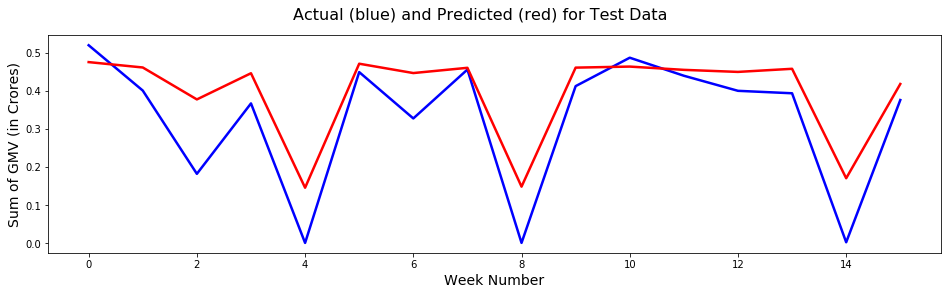

In [164]:
# Using the finally selected features to fit our linear model
model.fit(X_camera_accessory_train[auto_selected_predictors],y_camera_accessory_train)

# Scaling test dataset
scaler = StandardScaler()
cols = X_camera_accessory_test.columns
X_camera_accessory_test[cols] = scaler.fit_transform(X_camera_accessory_test[cols])

# Predicting on train and test dataset
y_train_pred = model.predict(X_camera_accessory_train[auto_selected_predictors])
r_square_train = r2_score(y_camera_accessory_train, y_train_pred)
y_test_pred = model.predict(X_camera_accessory_test[auto_selected_predictors])
r_square_test = r2_score(y_camera_accessory_test, y_test_pred)

# Plotting actual vs. predicted for test dataset
plot_actual_predicted(y_camera_accessory_test, y_test_pred)

# Computing Adjusted R Square
k = len(list(model.coef_))
adj_r_square_train = 1-(1-r_square_train)*(y_camera_accessory_train.size-1)/(y_camera_accessory_train.size-k-1)
adj_r_square_test = 1-(1-r_square_test)*(y_camera_accessory_test.size-1)/(y_camera_accessory_test.size-k-1)

# Printing the Equation
predictors = sorted(list(zip(model.coef_,auto_selected_predictors)),reverse=True, key=lambda x:abs(x[0]))
equation = []
for coff, var in predictors:
    equation.append(f'log(({coff:.02f})*{var})')
print(f'log(GMV) = {" + ".join(equation)}')

# Displaying the metrics score
print(f'\nTRAINING DATASET\nR-Square: \t\t{r_square_train} \nAdjusted R-Square: \t{adj_r_square_train}')
print(f'\nTEST DATASET\nR-Square: \t\t{r_square_test} \nAdjusted R-Square: \t{adj_r_square_test}')

### 8.2 Building Distributed Lag (Multiplicative) Model for Home Audio

In [165]:
# Splitting & Scaling Data
X_home_audio_train, X_home_audio_test, y_home_audio_train, y_home_audio_test = train_test_split(X_home_audio, y_home_audio, test_size = 0.3, random_state = 100)

scaler = StandardScaler()
cols = X_home_audio_train.columns
X_home_audio_train[cols] = scaler.fit_transform(X_home_audio_train[cols])

# Linear Regression Model
model = linear_model.LinearRegression(n_jobs=-1)
model.fit(X_home_audio_train,y_home_audio_train)

# Recursive Feature Elimination | Selecting 4 Features
# In regression analysis, many researchers say that there should be at least 10 observations per variable.
# Thus with ~40 observations, we can have max. 4 features
rfe = RFE(model, 4)
rfe = rfe.fit(X_home_audio_train,y_home_audio_train)

# Ranking of columns w.r.t ranking
auto_selected_predictors = list(X_home_audio_train.columns[rfe.support_])

# First Iteration; Considering all columns
model.fit(X_home_audio_train,y_home_audio_train)
y_pred = model.predict(X_home_audio_train)
r_square = r2_score(y_home_audio_train, y_pred)

# Computing Adjusted R Square
k = len(list(model.coef_))
adj_r_square = 1-(1-r_square)*(y_home_audio_train.size-1)/(y_home_audio_train.size-k-1)

# Printing the Equation
predictors = sorted(list(zip(model.coef_,X_home_audio_train.columns)),reverse=True, key=lambda x:abs(x[0]))
equation = []
for coff, var in predictors:
    equation.append(f'log(({coff:.02f})*{var})')
print(f'log(GMV) = {" + ".join(equation)}')

# Displaying the metrics score
print(f'\nR-Square: \t\t{r_square} \nAdjusted R-Square: \t{adj_r_square}')

log(GMV) = log((-1.29)*Affiliates_lag_1) + log((1.23)*Online_marketing_lag_1) + log((0.19)*luxury_product) + log((0.13)*TV_lag_1) + log((0.12)*Digital_lag_1) + log((-0.11)*Content_Marketing_lag_1) + log((-0.09)*Sponsorship_lag_1) + log((-0.06)*SEM_lag_1) + log((-0.06)*product_procurement_sla) + log((-0.05)*is_hot) + log((-0.04)*mass_product) + log((-0.03)*payment_type) + log((0.03)*stock_index) + log((-0.02)*week_of_year) + log((0.02)*discount_percentage) + log((-0.02)*is_sale_day) + log((0.01)*is_pay_day) + log((0.01)*nps) + log((-0.01)*is_rainy) + log((0.01)*is_snow_on_ground) + log((-0.01)*units) + log((-0.00)*gmv_lag_1) + log((-0.00)*sla)

R-Square: 		0.9596576427103864 
Adjusted R-Square: 	0.888282702890301


In [166]:
# HOME AUDIO DISTRIBUTED LAG (MULTIPLICATIVE) MODEL | CONSIDERING FEATURES SELECTED BY RFE, THUS BEST FEATURE SUBSET
make_lr_model_mp(X_home_audio_train, y_home_audio_train, auto_selected_predictors)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     55.14
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           6.61e-14
Time:                        02:15:52   Log-Likelihood:                 55.427
No. Observations:                  37   AIC:                            -100.9
Df Residuals:                      32   BIC:                            -92.80
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [167]:
# Further feature selection (based on p-value and VIF)
auto_selected_predictors.remove('Online_marketing_lag_1')
make_lr_model_mp(X_home_audio_train, y_home_audio_train, auto_selected_predictors)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     75.58
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           7.23e-15
Time:                        02:15:53   Log-Likelihood:                 55.377
No. Observations:                  37   AIC:                            -102.8
Df Residuals:                      33   BIC:                            -96.31
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3698      0.009  

log(GMV) = log((0.14)*luxury_product) + log((0.04)*Digital_lag_1) + log((-0.03)*Affiliates_lag_1)

TRAINING DATASET
R-Square: 		0.8729479144724483 
Adjusted R-Square: 	0.8613977248790345

TEST DATASET
R-Square: 		0.6377943358632314 
Adjusted R-Square: 	0.5472429198290392


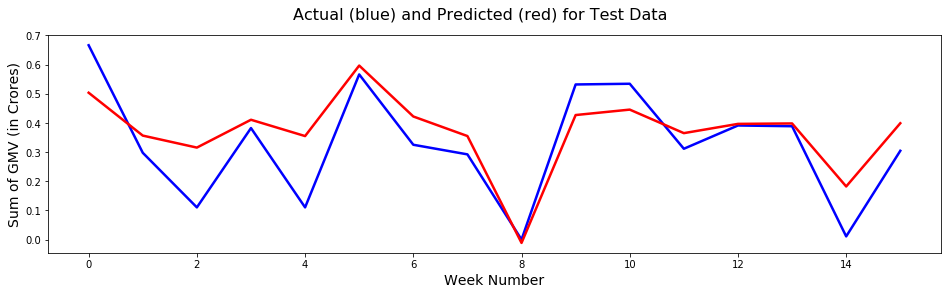

In [168]:
# Using the finally selected features to fit our linear model
model.fit(X_home_audio_train[auto_selected_predictors],y_home_audio_train)

# Scaling test dataset
scaler = StandardScaler()
cols = X_home_audio_test.columns
X_home_audio_test[cols] = scaler.fit_transform(X_home_audio_test[cols])

# Predicting on train and test dataset
y_train_pred = model.predict(X_home_audio_train[auto_selected_predictors])
r_square_train = r2_score(y_home_audio_train, y_train_pred)
y_test_pred = model.predict(X_home_audio_test[auto_selected_predictors])
r_square_test = r2_score(y_home_audio_test, y_test_pred)

# Plotting actual vs. predicted for test dataset
plot_actual_predicted(y_home_audio_test, y_test_pred)

# Computing Adjusted R Square
k = len(list(model.coef_))
adj_r_square_train = 1-(1-r_square_train)*(y_home_audio_train.size-1)/(y_home_audio_train.size-k-1)
adj_r_square_test = 1-(1-r_square_test)*(y_home_audio_test.size-1)/(y_home_audio_test.size-k-1)

# Printing the Equation
predictors = sorted(list(zip(model.coef_,auto_selected_predictors)),reverse=True, key=lambda x:abs(x[0]))
equation = []
for coff, var in predictors:
    equation.append(f'log(({coff:.02f})*{var})')
print(f'log(GMV) = {" + ".join(equation)}')

# Displaying the metrics score
print(f'\nTRAINING DATASET\nR-Square: \t\t{r_square_train} \nAdjusted R-Square: \t{adj_r_square_train}')
print(f'\nTEST DATASET\nR-Square: \t\t{r_square_test} \nAdjusted R-Square: \t{adj_r_square_test}')

### 8.3 Building Distributed Lag (Multiplicative) Model for Gaming Accessory

In [169]:
# Splitting & Scaling Data
X_gaming_accessory_train, X_gaming_accessory_test, y_gaming_accessory_train, y_gaming_accessory_test = train_test_split(X_gaming_accessory, y_gaming_accessory, test_size = 0.3, random_state = 100)

scaler = StandardScaler()
cols = X_gaming_accessory_train.columns
X_gaming_accessory_train[cols] = scaler.fit_transform(X_gaming_accessory_train[cols])

# Linear Regression Model
model = linear_model.LinearRegression(n_jobs=-1)
model.fit(X_gaming_accessory_train,y_gaming_accessory_train)

# Recursive Feature Elimination | Selecting 4 Features
# In regression analysis, many researchers say that there should be at least 10 observations per variable.
# Thus with ~40 observations, we can have max. 4 features
rfe = RFE(model, 4)
rfe = rfe.fit(X_gaming_accessory_train,y_gaming_accessory_train)

# Ranking of columns w.r.t ranking
auto_selected_predictors = list(X_gaming_accessory_train.columns[rfe.support_])

# First Iteration; Considering all columns
model.fit(X_gaming_accessory_train,y_gaming_accessory_train)
y_pred = model.predict(X_gaming_accessory_train)
r_square = r2_score(y_gaming_accessory_train, y_pred)

# Computing Adjusted R Square
k = len(list(model.coef_))
adj_r_square = 1-(1-r_square)*(y_gaming_accessory_train.size-1)/(y_gaming_accessory_train.size-k-1)

# Printing the Equation
predictors = sorted(list(zip(model.coef_,X_gaming_accessory_train.columns)),reverse=True, key=lambda x:abs(x[0]))
equation = []
for coff, var in predictors:
    equation.append(f'log(({coff:.02f})*{var})')
print(f'log(GMV) = {" + ".join(equation)}')

# Displaying the metrics score
print(f'\nR-Square: \t\t{r_square} \nAdjusted R-Square: \t{adj_r_square}')

log(GMV) = log((-0.26)*Affiliates_lag_1) + log((0.24)*Online_marketing_lag_1) + log((0.19)*luxury_product) + log((-0.12)*SEM_lag_1) + log((0.08)*Digital_lag_1) + log((-0.08)*units) + log((-0.06)*mass_product) + log((0.05)*discount_percentage) + log((0.05)*TV_lag_1) + log((-0.05)*gmv_lag_1) + log((-0.04)*Sponsorship_lag_1) + log((-0.04)*nps) + log((0.04)*Content_Marketing_lag_1) + log((0.04)*stock_index) + log((-0.02)*payment_type) + log((0.02)*week_of_year) + log((-0.01)*is_rainy) + log((0.01)*is_sale_day) + log((-0.01)*is_hot) + log((-0.01)*is_snow_on_ground) + log((-0.01)*sla) + log((0.00)*is_pay_day) + log((0.00)*product_procurement_sla)

R-Square: 		0.9569454420503319 
Adjusted R-Square: 	0.88077199337015


In [170]:
# GAMING ACCESSORY DISTRIBUTED LAG (MULTIPLICATIVE) MODEL | CONSIDERING FEATURES SELECTED BY RFE, THUS BEST FEATURE SUBSET
make_lr_model_mp(X_gaming_accessory_train, y_gaming_accessory_train, auto_selected_predictors)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     4.662
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00445
Time:                        02:15:54   Log-Likelihood:                 42.833
No. Observations:                  37   AIC:                            -75.67
Df Residuals:                      32   BIC:                            -67.61
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [171]:
# Further feature selection (based on p-value and VIF)
auto_selected_predictors.remove('Affiliates_lag_1')
auto_selected_predictors.remove('Online_marketing_lag_1')
make_lr_model_mp(X_gaming_accessory_train, y_gaming_accessory_train, auto_selected_predictors)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     4.438
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0194
Time:                        02:15:54   Log-Likelihood:                 38.630
No. Observations:                  37   AIC:                            -71.26
Df Residuals:                      34   BIC:                            -66.43
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2566      0.015     17.568

log(GMV) = log((0.16)*SEM_lag_1) + log((-0.15)*Digital_lag_1)

TRAINING DATASET
R-Square: 		0.2070167812964423 
Adjusted R-Square: 	0.1603707096079977

TEST DATASET
R-Square: 		0.42540245589969394 
Adjusted R-Square: 	0.3370028337304162


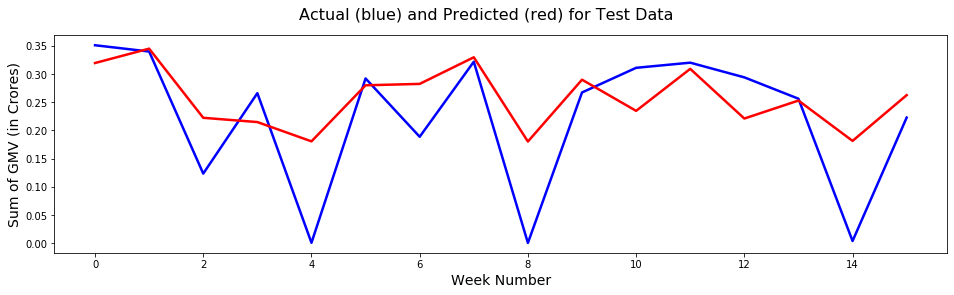

In [172]:
# Using the finally selected features to fit our linear model
model.fit(X_gaming_accessory_train[auto_selected_predictors],y_gaming_accessory_train)

# Scaling test dataset
scaler = StandardScaler()
cols = X_gaming_accessory_test.columns
X_gaming_accessory_test[cols] = scaler.fit_transform(X_gaming_accessory_test[cols])

# Predicting on train and test dataset
y_train_pred = model.predict(X_gaming_accessory_train[auto_selected_predictors])
r_square_train = r2_score(y_gaming_accessory_train, y_train_pred)
y_test_pred = model.predict(X_gaming_accessory_test[auto_selected_predictors])
r_square_test = r2_score(y_gaming_accessory_test, y_test_pred)

# Plotting actual vs. predicted for test dataset
plot_actual_predicted(y_gaming_accessory_test, y_test_pred)

# Computing Adjusted R Square
k = len(list(model.coef_))
adj_r_square_train = 1-(1-r_square_train)*(y_gaming_accessory_train.size-1)/(y_gaming_accessory_train.size-k-1)
adj_r_square_test = 1-(1-r_square_test)*(y_gaming_accessory_test.size-1)/(y_gaming_accessory_test.size-k-1)

# Printing the Equation
predictors = sorted(list(zip(model.coef_,auto_selected_predictors)),reverse=True, key=lambda x:abs(x[0]))
equation = []
for coff, var in predictors:
    equation.append(f'log(({coff:.02f})*{var})')
print(f'log(GMV) = {" + ".join(equation)}')

# Displaying the metrics score
print(f'\nTRAINING DATASET\nR-Square: \t\t{r_square_train} \nAdjusted R-Square: \t{adj_r_square_train}')
print(f'\nTEST DATASET\nR-Square: \t\t{r_square_test} \nAdjusted R-Square: \t{adj_r_square_test}')

### 8.4 Conclusion of Distributed Lag (Multiplicative) Model

1. We noticed a significant drop in r-square value and adjusted r-square value for product subcategory 'Camera Accessory'
2. The features that are mostly affecting GMV for subcategory 'Camera Accessory' are:
    * luxury_product
    * Online_marketing_lag_1 (Media Investment Lagged by 1 week)
3. We noticed a significant drop in r-square value and adjusted r-square value for product subcategory 'Home Audio'
4. The features that are mostly affecting GMV for subcategory 'Home Audio' are:
    * luxury_product
    * Digital_lag_1 (Media Investment Lagged by 1 week)
    * Affiliates_lag_1 (Media Investment Lagged by 1 week)
5. We noticed a significant drop in r-square value and adjusted r-square value for product subcategory 'Gaming Accessory'
6. The features that are mostly affecting GMV for subcategory 'Gaming Accessory' are:
    * luxury_product
    * units
7. The drop in r-square value is significantly high and thus we would prefer simple linear additive model over distributed lag (multiplicative) model

## 9. Fine Tuning Best Models (Hyperparameter Optimization)

We do conclude from above models that the following models are giving us good results:
1. Simple Additive Linear Model
2. Koyck Model
3. Distributed Lag (Additive) Model

### 9.1 Fine Tuning Simple Additive Linear Model

#### 9.1.1 Hyperparameter Optimization of Simple Additive Linear Model - Camera Accessory

In [173]:
# Splitting & Scaling Data
X_camera_accessory = df_camera_accessory_original.drop(columns=['gmv'])
y_camera_accessory = df_camera_accessory_original['gmv']

X_camera_accessory_train, X_camera_accessory_test, y_camera_accessory_train, y_camera_accessory_test = train_test_split(X_camera_accessory, y_camera_accessory, test_size = 0.3, random_state = 100)

# Selecting the most significant features on basis of above models
selected_predictors = ['luxury_product','mass_product', 'SEM']

scaler = StandardScaler()
X_camera_accessory_train[selected_predictors] = scaler.fit_transform(X_camera_accessory_train[selected_predictors])
X_camera_accessory_test[selected_predictors] = scaler.fit_transform(X_camera_accessory_test[selected_predictors])

# Ridge Regression Model with Hyperparameter Optimization | Considering selected features
model = linear_model.Ridge()

In [174]:
# Hyperparameter Optimization
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.05, 0.01, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0 ]}

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = model, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_camera_accessory_train[selected_predictors], y_camera_accessory_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.05, 0.01, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

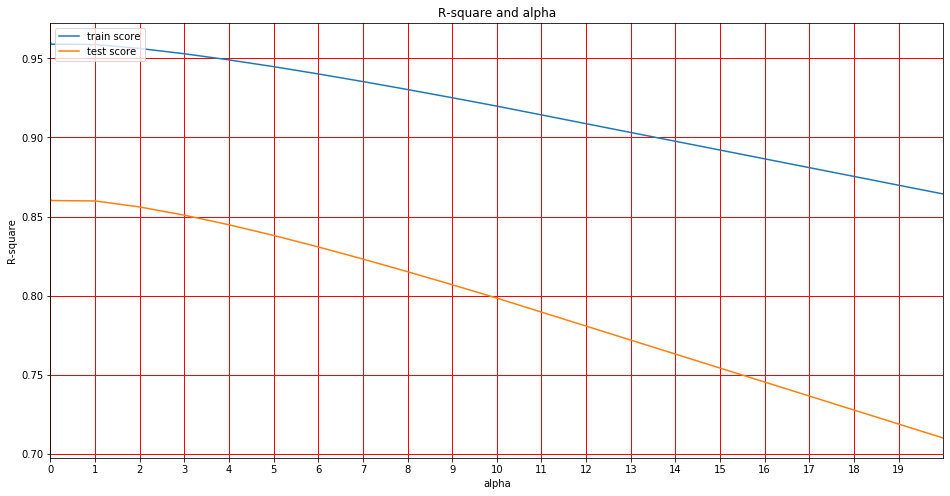

{'alpha': 0.2}


In [175]:
# Plotting at various values of alpha
cv_results = pd.DataFrame(model_cv.cv_results_)

# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R-square')
plt.title("R-square and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 20)
plt.xticks(np.arange(0, 20, 1))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

print(model_cv.best_params_)

GMV = (0.14)*luxury_product + (0.06)*mass_product + (-0.00)*SEM

TRAINING DATASET
R-Square: 		0.9590328882976774 
Adjusted R-Square: 	0.9553086054156481

TEST DATASET
R-Square: 		0.8093541437108276 
Adjusted R-Square: 	0.7616926796385345


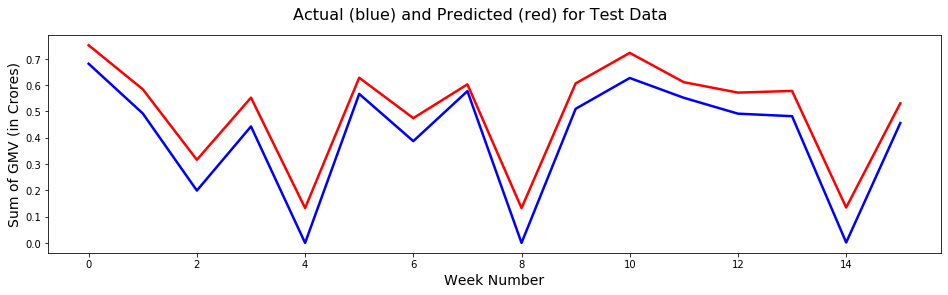

In [176]:
# Fitting Model
model = linear_model.Ridge(0.2)
model.fit(X_camera_accessory_train[selected_predictors],y_camera_accessory_train)

# Predicting on train and test dataset
y_train_pred = model.predict(X_camera_accessory_train[selected_predictors])
r_square_train = r2_score(y_camera_accessory_train, y_train_pred)
y_test_pred = model.predict(X_camera_accessory_test[selected_predictors])
r_square_test = r2_score(y_camera_accessory_test, y_test_pred)

# Plotting actual vs. predicted for test dataset
plot_actual_predicted(y_camera_accessory_test.values, y_test_pred)

# Computing Adjusted R Square
k = len(list(model.coef_))
adj_r_square_train = 1-(1-r_square_train)*(y_camera_accessory_train.size-1)/(y_camera_accessory_train.size-k-1)
adj_r_square_test = 1-(1-r_square_test)*(y_camera_accessory_test.size-1)/(y_camera_accessory_test.size-k-1)

# Printing the Equation
predictors = sorted(list(zip(model.coef_,selected_predictors)),reverse=True, key=lambda x:abs(x[0]))
equation = []
for coff, var in predictors:
    equation.append(f'({coff:.02f})*{var}')
print(f'GMV = {" + ".join(equation)}')

# Displaying the metrics score
print(f'\nTRAINING DATASET\nR-Square: \t\t{r_square_train} \nAdjusted R-Square: \t{adj_r_square_train}')
print(f'\nTEST DATASET\nR-Square: \t\t{r_square_test} \nAdjusted R-Square: \t{adj_r_square_test}')

#### 9.1.2 Hyperparameter Optimization of Simple Additive Linear Model - Home Audio

In [177]:
# Splitting & Scaling Data
X_home_audio = df_home_audio_original.drop(columns=['gmv'])
y_home_audio = df_home_audio_original['gmv']

X_home_audio_train, X_home_audio_test, y_home_audio_train, y_home_audio_test = train_test_split(X_home_audio, y_home_audio, test_size = 0.3, random_state = 100)

# Selecting the most significant features on basis of above models
selected_predictors = ['luxury_product','mass_product', 'Digital']

scaler = StandardScaler()
X_home_audio_train[selected_predictors] = scaler.fit_transform(X_home_audio_train[selected_predictors])
X_home_audio_test[selected_predictors] = scaler.fit_transform(X_home_audio_test[selected_predictors])

# Ridge Regression Model with Hyperparameter Optimization | Considering selected features
model = linear_model.Ridge()

In [178]:
# Hyperparameter Optimization
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.05, 0.01, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0 ]}

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = model, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_home_audio_train[selected_predictors], y_home_audio_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.05, 0.01, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

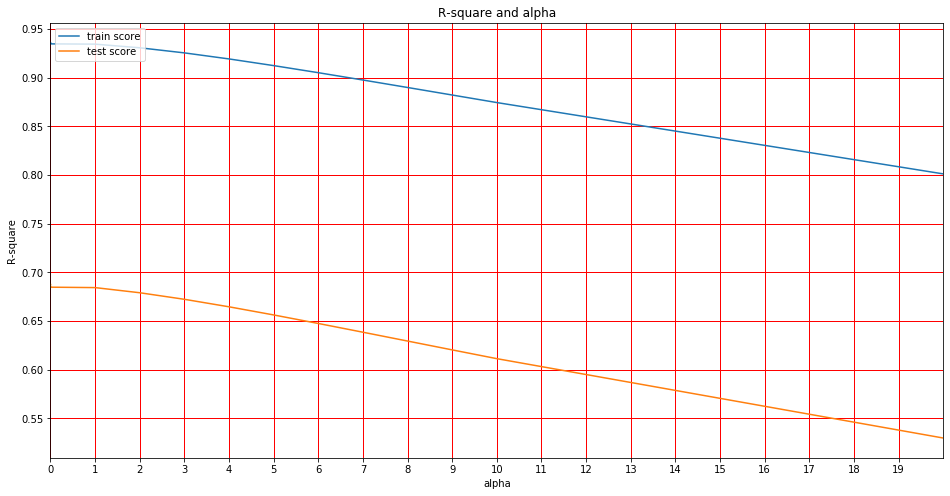

{'alpha': 0.0001}


In [179]:
# Plotting at various values of alpha
cv_results = pd.DataFrame(model_cv.cv_results_)

# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R-square')
plt.title("R-square and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 20)
plt.xticks(np.arange(0, 20, 1))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

print(model_cv.best_params_)

GMV = (0.23)*luxury_product + (0.05)*mass_product + (0.03)*Digital

TRAINING DATASET
R-Square: 		0.9395469812041434 
Adjusted R-Square: 	0.9340512522227018

TEST DATASET
R-Square: 		0.8984122070898063 
Adjusted R-Square: 	0.8730152588622578


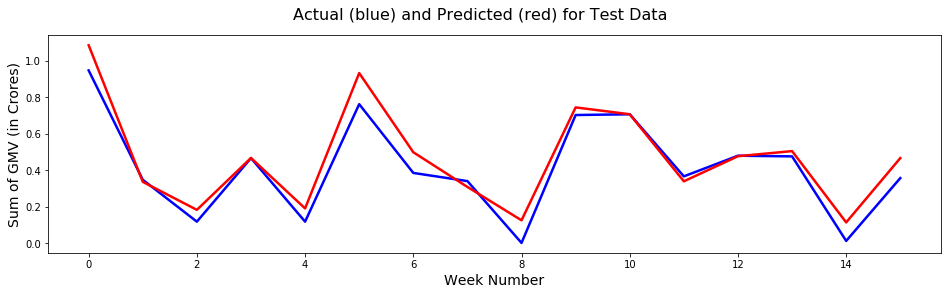

In [180]:
# Fitting Model
model = linear_model.Ridge(0.0001)
model.fit(X_home_audio_train[selected_predictors],y_home_audio_train)

# Predicting on train and test dataset
y_train_pred = model.predict(X_home_audio_train[selected_predictors])
r_square_train = r2_score(y_home_audio_train, y_train_pred)
y_test_pred = model.predict(X_home_audio_test[selected_predictors])
r_square_test = r2_score(y_home_audio_test, y_test_pred)

# Plotting actual vs. predicted for test dataset
plot_actual_predicted(y_home_audio_test.values, y_test_pred)

# Computing Adjusted R Square
k = len(list(model.coef_))
adj_r_square_train = 1-(1-r_square_train)*(y_home_audio_train.size-1)/(y_home_audio_train.size-k-1)
adj_r_square_test = 1-(1-r_square_test)*(y_home_audio_test.size-1)/(y_home_audio_test.size-k-1)

# Printing the Equation
predictors = sorted(list(zip(model.coef_,selected_predictors)),reverse=True, key=lambda x:abs(x[0]))
equation = []
for coff, var in predictors:
    equation.append(f'({coff:.02f})*{var}')
print(f'GMV = {" + ".join(equation)}')

# Displaying the metrics score
print(f'\nTRAINING DATASET\nR-Square: \t\t{r_square_train} \nAdjusted R-Square: \t{adj_r_square_train}')
print(f'\nTEST DATASET\nR-Square: \t\t{r_square_test} \nAdjusted R-Square: \t{adj_r_square_test}')

#### 9.1.3 Hyperparameter Optimization of Simple Additive Linear Model - Gaming Accessory

In [181]:
# Splitting & Scaling Data
X_gaming_accessory = df_gaming_accessory_original.drop(columns=['gmv'])
y_gaming_accessory = df_gaming_accessory_original['gmv']

X_gaming_accessory_train, X_gaming_accessory_test, y_gaming_accessory_train, y_gaming_accessory_test = train_test_split(X_gaming_accessory, y_gaming_accessory, test_size = 0.3, random_state = 100)

# Selecting the most significant features on basis of above models
selected_predictors = ['luxury_product','Online marketing', 'Digital']

scaler = StandardScaler()
X_gaming_accessory_train[selected_predictors] = scaler.fit_transform(X_gaming_accessory_train[selected_predictors])
X_gaming_accessory_test[selected_predictors] = scaler.fit_transform(X_gaming_accessory_test[selected_predictors])

# Ridge Regression Model with Hyperparameter Optimization | Considering selected features
model = linear_model.Ridge()

In [182]:
# Hyperparameter Optimization
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.05, 0.01, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0, 30.0, 40.0, 50.0 ]}

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = model, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_gaming_accessory_train[selected_predictors], y_gaming_accessory_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.05, 0.01, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,
                                   30.0, 40.0, 50.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

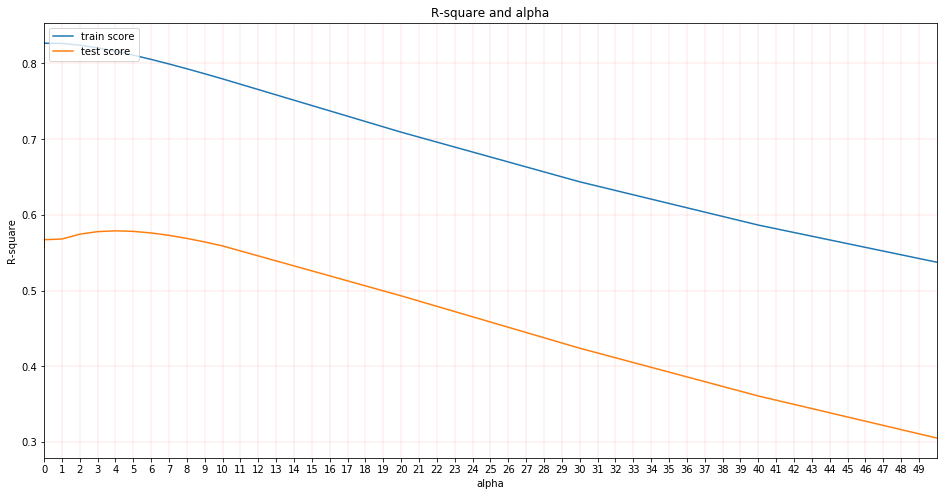

{'alpha': 4.0}


In [183]:
# Plotting at various values of alpha
cv_results = pd.DataFrame(model_cv.cv_results_)

# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R-square')
plt.title("R-square and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 50)
plt.xticks(np.arange(0, 50, 1))
plt.grid(color='r', linestyle='-', linewidth=.1)
plt.show()

print(model_cv.best_params_)

GMV = (0.09)*luxury_product + (0.03)*Online marketing + (0.02)*Digital

TRAINING DATASET
R-Square: 		0.8128415458447006 
Adjusted R-Square: 	0.7958271409214915

TEST DATASET
R-Square: 		0.843133828306182 
Adjusted R-Square: 	0.8039172853827276


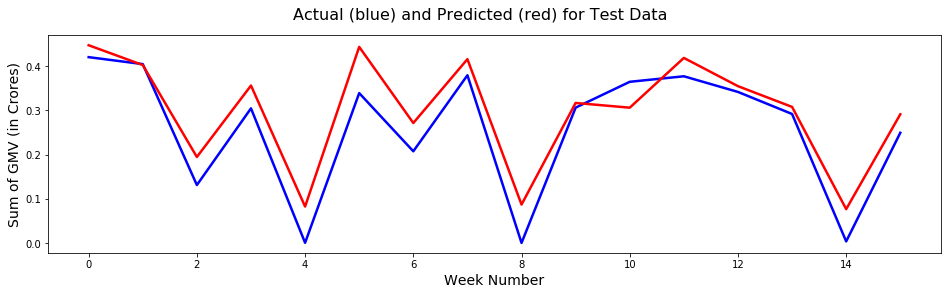

In [184]:
# Fitting Model
model = linear_model.Ridge(4.0)
model.fit(X_gaming_accessory_train[selected_predictors],y_gaming_accessory_train)

# Predicting on train and test dataset
y_train_pred = model.predict(X_gaming_accessory_train[selected_predictors])
r_square_train = r2_score(y_gaming_accessory_train, y_train_pred)
y_test_pred = model.predict(X_gaming_accessory_test[selected_predictors])
r_square_test = r2_score(y_gaming_accessory_test, y_test_pred)

# Plotting actual vs. predicted for test dataset
plot_actual_predicted(y_gaming_accessory_test.values, y_test_pred)

# Computing Adjusted R Square
k = len(list(model.coef_))
adj_r_square_train = 1-(1-r_square_train)*(y_gaming_accessory_train.size-1)/(y_gaming_accessory_train.size-k-1)
adj_r_square_test = 1-(1-r_square_test)*(y_gaming_accessory_test.size-1)/(y_gaming_accessory_test.size-k-1)

# Printing the Equation
predictors = sorted(list(zip(model.coef_,selected_predictors)),reverse=True, key=lambda x:abs(x[0]))
equation = []
for coff, var in predictors:
    equation.append(f'({coff:.02f})*{var}')
print(f'GMV = {" + ".join(equation)}')

# Displaying the metrics score
print(f'\nTRAINING DATASET\nR-Square: \t\t{r_square_train} \nAdjusted R-Square: \t{adj_r_square_train}')
print(f'\nTEST DATASET\nR-Square: \t\t{r_square_test} \nAdjusted R-Square: \t{adj_r_square_test}')

### 9.2 Fine Tuning Koyck Model

In [185]:
# Camera Accessory Dataset Preparation (Introducing gmv_lag value) | Lag of dependent feature
X_camera_accessory = df_camera_accessory_original.copy(deep=True)
X_camera_accessory['gmv_lag_1'] = X_camera_accessory['gmv'].shift(1)
X_camera_accessory['gmv_lag_2'] = X_camera_accessory['gmv'].shift(2)
X_camera_accessory['gmv_lag_3'] = X_camera_accessory['gmv'].shift(3)
X_camera_accessory.drop(columns=['gmv'], inplace=True)
X_camera_accessory.interpolate(method ='linear', limit_direction ='backward', inplace=True)
y_camera_accessory = df_camera_accessory_original['gmv']

In [186]:
# Home Audio Dataset Preparation (Introducing gmv_lag value) | Lag of dependent feature
X_home_audio = df_home_audio_original.copy(deep=True)
X_home_audio['gmv_lag_1'] = X_home_audio['gmv'].shift(1)
X_home_audio['gmv_lag_2'] = X_home_audio['gmv'].shift(2)
X_home_audio['gmv_lag_3'] = X_home_audio['gmv'].shift(3)
X_home_audio.drop(columns=['gmv'], inplace=True)
X_home_audio.interpolate(method ='linear', limit_direction ='backward', inplace=True)
y_home_audio = df_home_audio_original['gmv']

In [187]:
# Gaming Accessory Dataset Preparation (Introducing gmv_lag value) | Lag of dependent feature
X_gaming_accessory = df_gaming_accessory_original.copy(deep=True)
X_gaming_accessory['gmv_lag_1'] = X_gaming_accessory['gmv'].shift(1)
X_gaming_accessory['gmv_lag_2'] = X_gaming_accessory['gmv'].shift(2)
X_gaming_accessory['gmv_lag_3'] = X_gaming_accessory['gmv'].shift(3)
X_gaming_accessory.drop(columns=['gmv'], inplace=True)
X_gaming_accessory.interpolate(method ='linear', limit_direction ='backward', inplace=True)
y_gaming_accessory = df_gaming_accessory_original['gmv']

#### 9.2.1 Hyperparameter Optimization of Koyck Model - Camera Accessory

In [188]:
X_camera_accessory_train, X_camera_accessory_test, y_camera_accessory_train, y_camera_accessory_test = train_test_split(X_camera_accessory, y_camera_accessory, test_size = 0.3, random_state = 100)

# Selecting the most significant features on basis of above models
selected_predictors = ['luxury_product',' Affiliates']

scaler = StandardScaler()
X_camera_accessory_train[selected_predictors] = scaler.fit_transform(X_camera_accessory_train[selected_predictors])
X_camera_accessory_test[selected_predictors] = scaler.fit_transform(X_camera_accessory_test[selected_predictors])

# Ridge Regression Model with Hyperparameter Optimization | Considering selected features
model = linear_model.Ridge()

In [189]:
# Hyperparameter Optimization
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.05, 0.01, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0 ]}

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = model, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_camera_accessory_train[selected_predictors], y_camera_accessory_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.05, 0.01, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

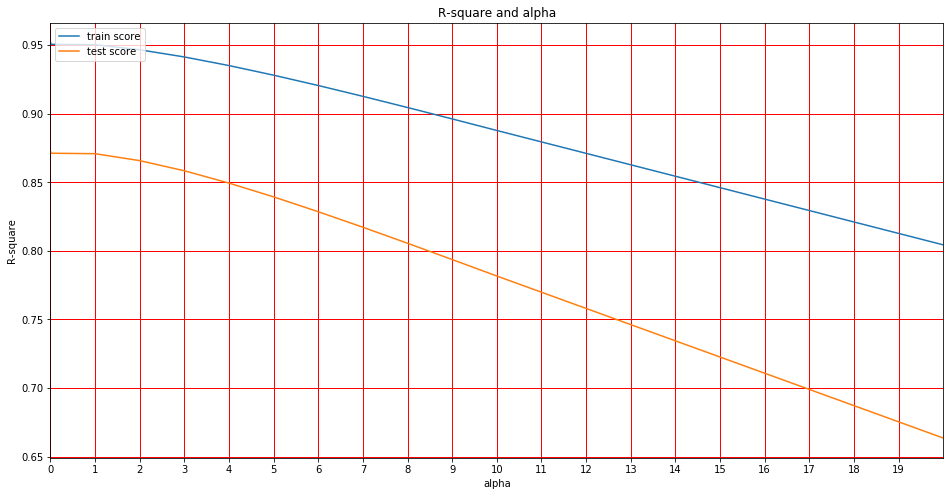

{'alpha': 0.1}


In [190]:
# Plotting at various values of alpha
cv_results = pd.DataFrame(model_cv.cv_results_)

# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R-square')
plt.title("R-square and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 20)
plt.xticks(np.arange(0, 20, 1))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

print(model_cv.best_params_)

GMV = (0.18)*luxury_product + (0.03)* Affiliates

TRAINING DATASET
R-Square: 		0.9554351759757723 
Adjusted R-Square: 	0.952813715739053

TEST DATASET
R-Square: 		0.8058299611834802 
Adjusted R-Square: 	0.7759576475194002


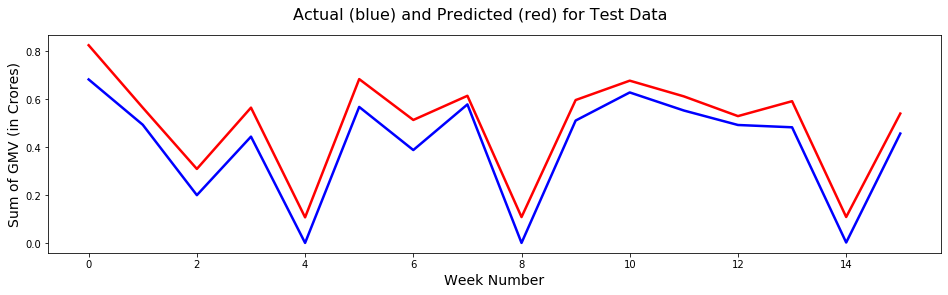

In [191]:
# Fitting Model
model = linear_model.Ridge(0.1)
model.fit(X_camera_accessory_train[selected_predictors],y_camera_accessory_train)

# Predicting on train and test dataset
y_train_pred = model.predict(X_camera_accessory_train[selected_predictors])
r_square_train = r2_score(y_camera_accessory_train, y_train_pred)
y_test_pred = model.predict(X_camera_accessory_test[selected_predictors])
r_square_test = r2_score(y_camera_accessory_test, y_test_pred)

# Plotting actual vs. predicted for test dataset
plot_actual_predicted(y_camera_accessory_test.values, y_test_pred)

# Computing Adjusted R Square
k = len(list(model.coef_))
adj_r_square_train = 1-(1-r_square_train)*(y_camera_accessory_train.size-1)/(y_camera_accessory_train.size-k-1)
adj_r_square_test = 1-(1-r_square_test)*(y_camera_accessory_test.size-1)/(y_camera_accessory_test.size-k-1)

# Printing the Equation
predictors = sorted(list(zip(model.coef_,selected_predictors)),reverse=True, key=lambda x:abs(x[0]))
equation = []
for coff, var in predictors:
    equation.append(f'({coff:.02f})*{var}')
print(f'GMV = {" + ".join(equation)}')

# Displaying the metrics score
print(f'\nTRAINING DATASET\nR-Square: \t\t{r_square_train} \nAdjusted R-Square: \t{adj_r_square_train}')
print(f'\nTEST DATASET\nR-Square: \t\t{r_square_test} \nAdjusted R-Square: \t{adj_r_square_test}')

#### 9.2.2 Hyperparameter Optimization of Koyck Model - Home Audio

In [192]:
X_home_audio_train, X_home_audio_test, y_home_audio_train, y_home_audio_test = train_test_split(X_home_audio, y_home_audio, test_size = 0.3, random_state = 100)

# Selecting the most significant features on basis of above models
selected_predictors = ['luxury_product','Digital']

scaler = StandardScaler()
X_home_audio_train[selected_predictors] = scaler.fit_transform(X_home_audio_train[selected_predictors])
X_home_audio_test[selected_predictors] = scaler.fit_transform(X_home_audio_test[selected_predictors])

# Ridge Regression Model with Hyperparameter Optimization | Considering selected features
model = linear_model.Ridge()

In [193]:
# Hyperparameter Optimization
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.05, 0.01, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0 ]}

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = model, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_home_audio_train[selected_predictors], y_home_audio_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.05, 0.01, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

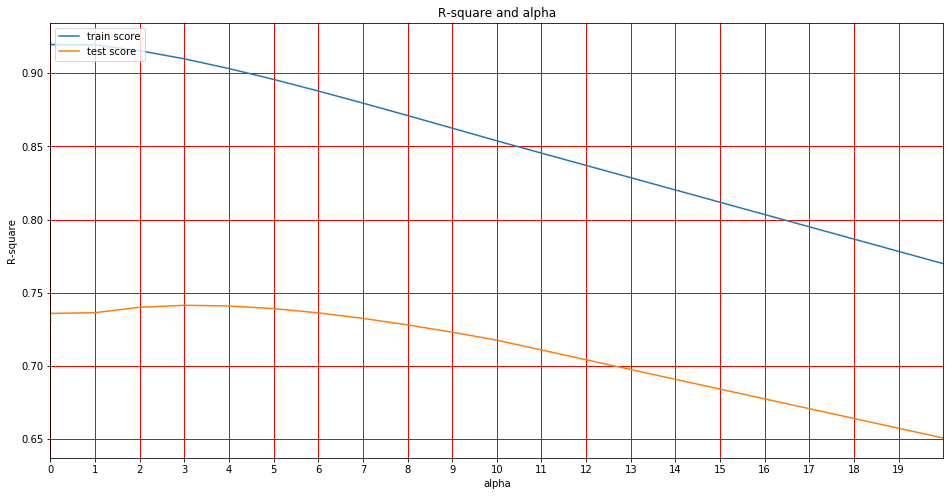

{'alpha': 3.0}


In [194]:
# Plotting at various values of alpha
cv_results = pd.DataFrame(model_cv.cv_results_)

# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R-square')
plt.title("R-square and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 20)
plt.xticks(np.arange(0, 20, 1))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

print(model_cv.best_params_)

GMV = (0.22)*luxury_product + (0.05)*Digital

TRAINING DATASET
R-Square: 		0.9197587867106481 
Adjusted R-Square: 	0.9150387153406863

TEST DATASET
R-Square: 		0.865099225551764 
Adjusted R-Square: 	0.8443452602520354


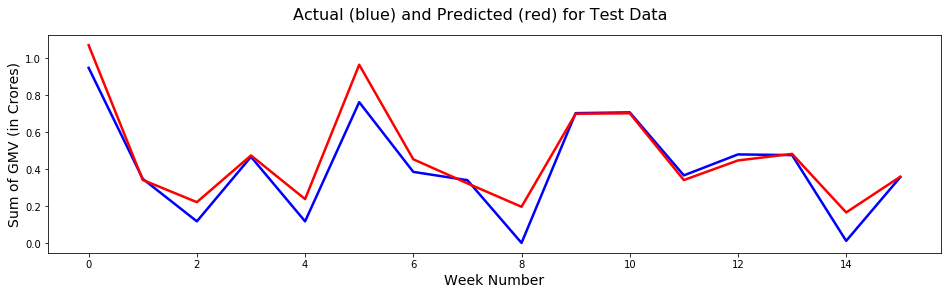

In [195]:
# Fitting Model
model = linear_model.Ridge(3.0)
model.fit(X_home_audio_train[selected_predictors],y_home_audio_train)

# Predicting on train and test dataset
y_train_pred = model.predict(X_home_audio_train[selected_predictors])
r_square_train = r2_score(y_home_audio_train, y_train_pred)
y_test_pred = model.predict(X_home_audio_test[selected_predictors])
r_square_test = r2_score(y_home_audio_test, y_test_pred)

# Plotting actual vs. predicted for test dataset
plot_actual_predicted(y_home_audio_test.values, y_test_pred)

# Computing Adjusted R Square
k = len(list(model.coef_))
adj_r_square_train = 1-(1-r_square_train)*(y_home_audio_train.size-1)/(y_home_audio_train.size-k-1)
adj_r_square_test = 1-(1-r_square_test)*(y_home_audio_test.size-1)/(y_home_audio_test.size-k-1)

# Printing the Equation
predictors = sorted(list(zip(model.coef_,selected_predictors)),reverse=True, key=lambda x:abs(x[0]))
equation = []
for coff, var in predictors:
    equation.append(f'({coff:.02f})*{var}')
print(f'GMV = {" + ".join(equation)}')

# Displaying the metrics score
print(f'\nTRAINING DATASET\nR-Square: \t\t{r_square_train} \nAdjusted R-Square: \t{adj_r_square_train}')
print(f'\nTEST DATASET\nR-Square: \t\t{r_square_test} \nAdjusted R-Square: \t{adj_r_square_test}')

#### 9.2.3 Hyperparameter Optimization of Koyck Model - Gaming Accessory

In [196]:
X_gaming_accessory_train, X_gaming_accessory_test, y_gaming_accessory_train, y_gaming_accessory_test = train_test_split(X_gaming_accessory, y_gaming_accessory, test_size = 0.3, random_state = 100)

# Selecting the most significant features on basis of above models
selected_predictors = ['luxury_product','SEM']

scaler = StandardScaler()
X_gaming_accessory_train[selected_predictors] = scaler.fit_transform(X_gaming_accessory_train[selected_predictors])
X_gaming_accessory_test[selected_predictors] = scaler.fit_transform(X_gaming_accessory_test[selected_predictors])

# Ridge Regression Model with Hyperparameter Optimization | Considering selected features
model = linear_model.Ridge()

In [197]:
# Hyperparameter Optimization
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.05, 0.01, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0, 30.0, 40.0, 50.0 ]}

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = model, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_gaming_accessory_train[selected_predictors], y_gaming_accessory_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.05, 0.01, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,
                                   30.0, 40.0, 50.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

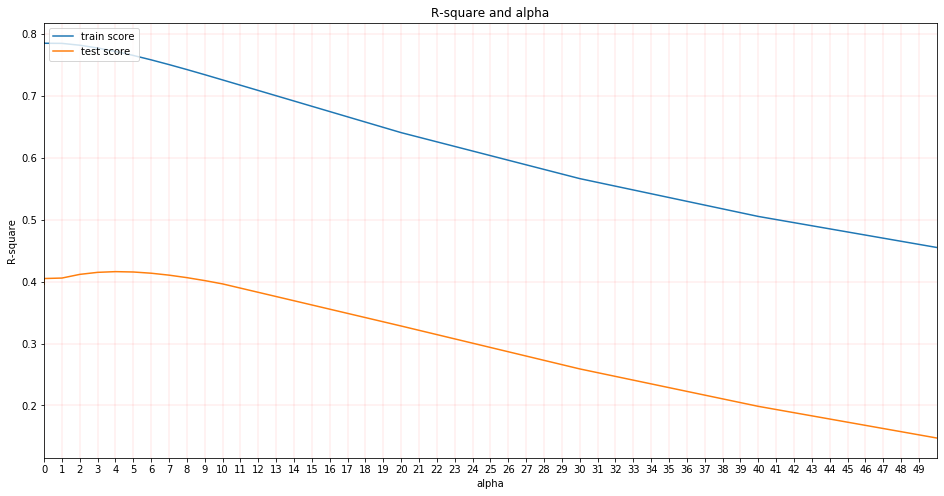

{'alpha': 4.0}


In [198]:
# Plotting at various values of alpha
cv_results = pd.DataFrame(model_cv.cv_results_)

# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R-square')
plt.title("R-square and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 50)
plt.xticks(np.arange(0, 50, 1))
plt.grid(color='r', linestyle='-', linewidth=.1)
plt.show()

print(model_cv.best_params_)

GMV = (0.10)*luxury_product + (0.03)*SEM

TRAINING DATASET
R-Square: 		0.7726254978862276 
Adjusted R-Square: 	0.7592505271736527

TEST DATASET
R-Square: 		0.7728686815992236 
Adjusted R-Square: 	0.737925401845258


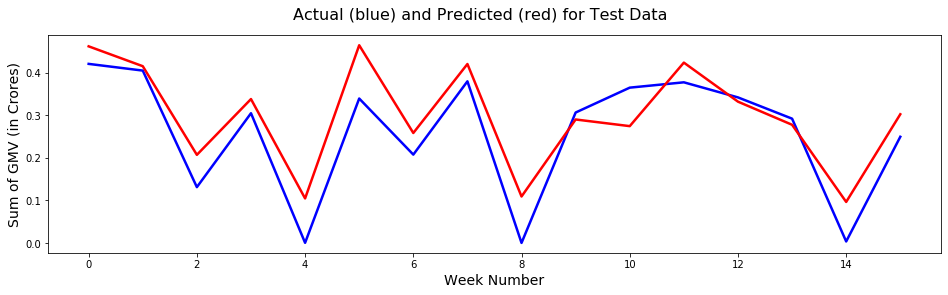

In [199]:
# Fitting Model
model = linear_model.Ridge(4.0)
model.fit(X_gaming_accessory_train[selected_predictors],y_gaming_accessory_train)

# Predicting on train and test dataset
y_train_pred = model.predict(X_gaming_accessory_train[selected_predictors])
r_square_train = r2_score(y_gaming_accessory_train, y_train_pred)
y_test_pred = model.predict(X_gaming_accessory_test[selected_predictors])
r_square_test = r2_score(y_gaming_accessory_test, y_test_pred)

# Plotting actual vs. predicted for test dataset
plot_actual_predicted(y_gaming_accessory_test.values, y_test_pred)

# Computing Adjusted R Square
k = len(list(model.coef_))
adj_r_square_train = 1-(1-r_square_train)*(y_gaming_accessory_train.size-1)/(y_gaming_accessory_train.size-k-1)
adj_r_square_test = 1-(1-r_square_test)*(y_gaming_accessory_test.size-1)/(y_gaming_accessory_test.size-k-1)

# Printing the Equation
predictors = sorted(list(zip(model.coef_,selected_predictors)),reverse=True, key=lambda x:abs(x[0]))
equation = []
for coff, var in predictors:
    equation.append(f'({coff:.02f})*{var}')
print(f'GMV = {" + ".join(equation)}')

# Displaying the metrics score
print(f'\nTRAINING DATASET\nR-Square: \t\t{r_square_train} \nAdjusted R-Square: \t{adj_r_square_train}')
print(f'\nTEST DATASET\nR-Square: \t\t{r_square_test} \nAdjusted R-Square: \t{adj_r_square_test}')

### 9.3 Fine Tuning Distributed Lag (Additive) Model

In [200]:
# Camera Accessory Dataset Preparation (Introducing lag values) | Lag of dependent as well as independent features
X_camera_accessory = df_camera_accessory_original.copy(deep=True)
X_camera_accessory['gmv_lag_1'] = X_camera_accessory['gmv'].shift(1)
X_camera_accessory['TV_lag_1'] = X_camera_accessory['TV'].shift(1)
X_camera_accessory['Digital_lag_1'] = X_camera_accessory['Digital'].shift(1)
X_camera_accessory['Sponsorship_lag_1'] = X_camera_accessory['Sponsorship'].shift(1)
X_camera_accessory['Content_Marketing_lag_1'] = X_camera_accessory['Content Marketing'].shift(1)
X_camera_accessory['Online_marketing_lag_1'] = X_camera_accessory['Online marketing'].shift(1)
X_camera_accessory['Affiliates_lag_1'] = X_camera_accessory[' Affiliates'].shift(1)
X_camera_accessory['SEM_lag_1'] = X_camera_accessory['SEM'].shift(1)

X_camera_accessory.drop(columns=['gmv', 'TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates', 'SEM'], inplace=True)
X_camera_accessory.interpolate(method ='linear', limit_direction ='backward', inplace=True)
y_camera_accessory = df_camera_accessory_original['gmv']

In [201]:
# Home Audio Dataset Preparation (Introducing lag values) | Lag of dependent as well as independent features
X_home_audio = df_home_audio_original.copy(deep=True)
X_home_audio['gmv_lag_1'] = X_home_audio['gmv'].shift(1)
X_home_audio['TV_lag_1'] = X_home_audio['TV'].shift(1)
X_home_audio['Digital_lag_1'] = X_home_audio['Digital'].shift(1)
X_home_audio['Sponsorship_lag_1'] = X_home_audio['Sponsorship'].shift(1)
X_home_audio['Content_Marketing_lag_1'] = X_home_audio['Content Marketing'].shift(1)
X_home_audio['Online_marketing_lag_1'] = X_home_audio['Online marketing'].shift(1)
X_home_audio['Affiliates_lag_1'] = X_home_audio[' Affiliates'].shift(1)
X_home_audio['SEM_lag_1'] = X_home_audio['SEM'].shift(1)

X_home_audio.drop(columns=['gmv', 'TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates', 'SEM'], inplace=True)
X_home_audio.interpolate(method ='linear', limit_direction ='backward', inplace=True)
y_home_audio = df_home_audio_original['gmv']

In [202]:
# Gaming Accessory Dataset Preparation (Introducing lag values) | Lag of dependent as well as independent features
X_gaming_accessory = df_gaming_accessory_original.copy(deep=True)
X_gaming_accessory['gmv_lag_1'] = X_gaming_accessory['gmv'].shift(1)
X_gaming_accessory['TV_lag_1'] = X_gaming_accessory['TV'].shift(1)
X_gaming_accessory['Digital_lag_1'] = X_gaming_accessory['Digital'].shift(1)
X_gaming_accessory['Sponsorship_lag_1'] = X_gaming_accessory['Sponsorship'].shift(1)
X_gaming_accessory['Content_Marketing_lag_1'] = X_gaming_accessory['Content Marketing'].shift(1)
X_gaming_accessory['Online_marketing_lag_1'] = X_gaming_accessory['Online marketing'].shift(1)
X_gaming_accessory['Affiliates_lag_1'] = X_gaming_accessory[' Affiliates'].shift(1)
X_gaming_accessory['SEM_lag_1'] = X_gaming_accessory['SEM'].shift(1)

X_gaming_accessory.drop(columns=['gmv', 'TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates', 'SEM'], inplace=True)
X_gaming_accessory.interpolate(method ='linear', limit_direction ='backward', inplace=True)
y_gaming_accessory = df_gaming_accessory_original['gmv']

#### 9.3.1 Hyperparameter Optimization of Distributed Lag (Additive) Model - Camera Accessory

In [203]:
X_camera_accessory_train, X_camera_accessory_test, y_camera_accessory_train, y_camera_accessory_test = train_test_split(X_camera_accessory, y_camera_accessory, test_size = 0.3, random_state = 100)

# Selecting the most significant features on basis of above models
selected_predictors = ['luxury_product','Affiliates_lag_1']

scaler = StandardScaler()
X_camera_accessory_train[selected_predictors] = scaler.fit_transform(X_camera_accessory_train[selected_predictors])
X_camera_accessory_test[selected_predictors] = scaler.fit_transform(X_camera_accessory_test[selected_predictors])

# Ridge Regression Model with Hyperparameter Optimization | Considering selected features
model = linear_model.Ridge()

In [204]:
# Hyperparameter Optimization
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.05, 0.01, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0 ]}

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = model, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_camera_accessory_train[selected_predictors], y_camera_accessory_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.05, 0.01, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

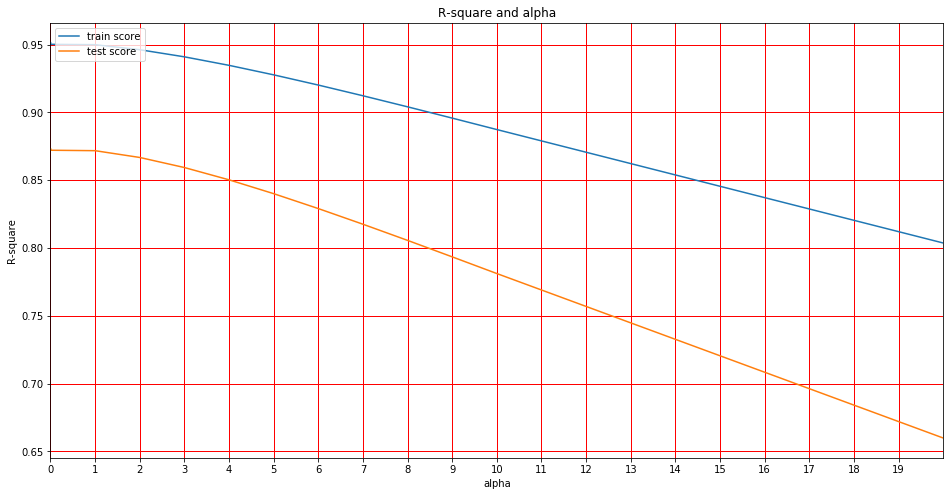

{'alpha': 0.2}


In [205]:
# Plotting at various values of alpha
cv_results = pd.DataFrame(model_cv.cv_results_)

# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R-square')
plt.title("R-square and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 20)
plt.xticks(np.arange(0, 20, 1))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

print(model_cv.best_params_)

GMV = (0.18)*luxury_product + (0.03)*Affiliates_lag_1

TRAINING DATASET
R-Square: 		0.9551877926215078 
Adjusted R-Square: 	0.9525517804227729

TEST DATASET
R-Square: 		0.8053843832933844 
Adjusted R-Square: 	0.7754435191846742


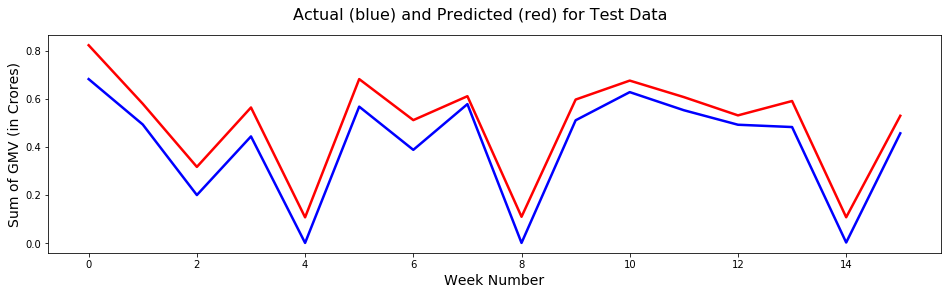

In [206]:
# Fitting Model
model = linear_model.Ridge(0.2)
model.fit(X_camera_accessory_train[selected_predictors],y_camera_accessory_train)

# Predicting on train and test dataset
y_train_pred = model.predict(X_camera_accessory_train[selected_predictors])
r_square_train = r2_score(y_camera_accessory_train, y_train_pred)
y_test_pred = model.predict(X_camera_accessory_test[selected_predictors])
r_square_test = r2_score(y_camera_accessory_test, y_test_pred)

# Plotting actual vs. predicted for test dataset
plot_actual_predicted(y_camera_accessory_test.values, y_test_pred)

# Computing Adjusted R Square
k = len(list(model.coef_))
adj_r_square_train = 1-(1-r_square_train)*(y_camera_accessory_train.size-1)/(y_camera_accessory_train.size-k-1)
adj_r_square_test = 1-(1-r_square_test)*(y_camera_accessory_test.size-1)/(y_camera_accessory_test.size-k-1)

# Printing the Equation
predictors = sorted(list(zip(model.coef_,selected_predictors)),reverse=True, key=lambda x:abs(x[0]))
equation = []
for coff, var in predictors:
    equation.append(f'({coff:.02f})*{var}')
print(f'GMV = {" + ".join(equation)}')

# Displaying the metrics score
print(f'\nTRAINING DATASET\nR-Square: \t\t{r_square_train} \nAdjusted R-Square: \t{adj_r_square_train}')
print(f'\nTEST DATASET\nR-Square: \t\t{r_square_test} \nAdjusted R-Square: \t{adj_r_square_test}')

#### 9.3.2 Hyperparameter Optimization of Distributed Lag (Additive) Model - Home Audio

In [207]:
X_home_audio_train, X_home_audio_test, y_home_audio_train, y_home_audio_test = train_test_split(X_home_audio, y_home_audio, test_size = 0.3, random_state = 100)

# Selecting the most significant features on basis of above models
selected_predictors = ['luxury_product','Digital_lag_1', 'Online_marketing_lag_1']

scaler = StandardScaler()
X_home_audio_train[selected_predictors] = scaler.fit_transform(X_home_audio_train[selected_predictors])
X_home_audio_test[selected_predictors] = scaler.fit_transform(X_home_audio_test[selected_predictors])

# Ridge Regression Model with Hyperparameter Optimization | Considering selected features
model = linear_model.Ridge()

In [208]:
# Hyperparameter Optimization
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.05, 0.01, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0 ]}

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = model, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_home_audio_train[selected_predictors], y_home_audio_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.05, 0.01, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

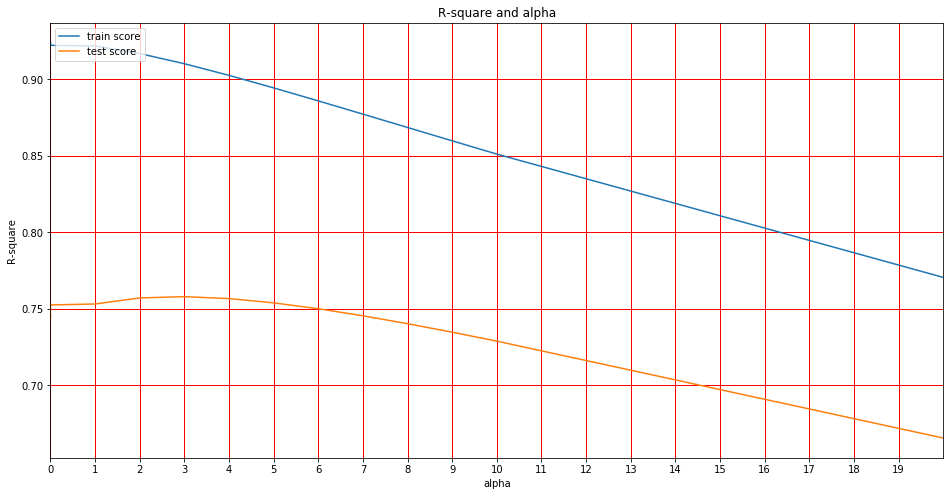

{'alpha': 3.0}


In [209]:
# Plotting at various values of alpha
cv_results = pd.DataFrame(model_cv.cv_results_)

# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R-square')
plt.title("R-square and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 20)
plt.xticks(np.arange(0, 20, 1))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

print(model_cv.best_params_)

GMV = (0.23)*luxury_product + (0.05)*Digital_lag_1 + (-0.02)*Online_marketing_lag_1

TRAINING DATASET
R-Square: 		0.9206550459166158 
Adjusted R-Square: 	0.9134418682726718

TEST DATASET
R-Square: 		0.8338910230779327 
Adjusted R-Square: 	0.7923637788474159


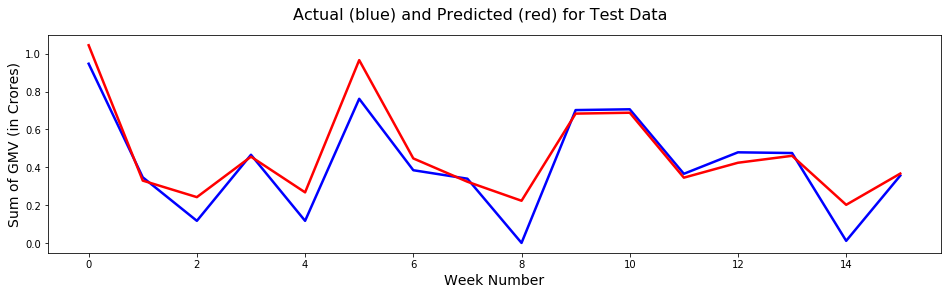

In [210]:
# Fitting Model
model = linear_model.Ridge(3.0)
model.fit(X_home_audio_train[selected_predictors],y_home_audio_train)

# Predicting on train and test dataset
y_train_pred = model.predict(X_home_audio_train[selected_predictors])
r_square_train = r2_score(y_home_audio_train, y_train_pred)
y_test_pred = model.predict(X_home_audio_test[selected_predictors])
r_square_test = r2_score(y_home_audio_test, y_test_pred)

# Plotting actual vs. predicted for test dataset
plot_actual_predicted(y_home_audio_test.values, y_test_pred)

# Computing Adjusted R Square
k = len(list(model.coef_))
adj_r_square_train = 1-(1-r_square_train)*(y_home_audio_train.size-1)/(y_home_audio_train.size-k-1)
adj_r_square_test = 1-(1-r_square_test)*(y_home_audio_test.size-1)/(y_home_audio_test.size-k-1)

# Printing the Equation
predictors = sorted(list(zip(model.coef_,selected_predictors)),reverse=True, key=lambda x:abs(x[0]))
equation = []
for coff, var in predictors:
    equation.append(f'({coff:.02f})*{var}')
print(f'GMV = {" + ".join(equation)}')

# Displaying the metrics score
print(f'\nTRAINING DATASET\nR-Square: \t\t{r_square_train} \nAdjusted R-Square: \t{adj_r_square_train}')
print(f'\nTEST DATASET\nR-Square: \t\t{r_square_test} \nAdjusted R-Square: \t{adj_r_square_test}')

#### 9.3.3 Hyperparameter Optimization of Distributed Lag (Additive) Model - Gaming Accessory

In [211]:
X_gaming_accessory_train, X_gaming_accessory_test, y_gaming_accessory_train, y_gaming_accessory_test = train_test_split(X_gaming_accessory, y_gaming_accessory, test_size = 0.3, random_state = 100)

# Selecting the most significant features on basis of above models
selected_predictors = ['luxury_product','mass_product', 'Content_Marketing_lag_1']

scaler = StandardScaler()
X_gaming_accessory_train[selected_predictors] = scaler.fit_transform(X_gaming_accessory_train[selected_predictors])
X_gaming_accessory_test[selected_predictors] = scaler.fit_transform(X_gaming_accessory_test[selected_predictors])

# Ridge Regression Model with Hyperparameter Optimization | Considering selected features
model = linear_model.Ridge()

In [212]:
# Hyperparameter Optimization
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.05, 0.01, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0, 30.0, 40.0, 50.0 ]}

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = model, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_gaming_accessory_train[selected_predictors], y_gaming_accessory_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.05, 0.01, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,
                                   30.0, 40.0, 50.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

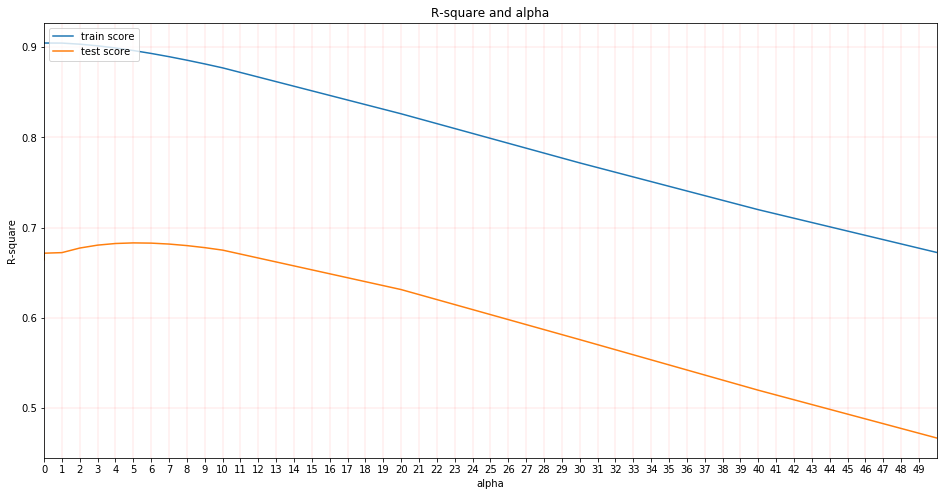

{'alpha': 5.0}


In [213]:
# Plotting at various values of alpha
cv_results = pd.DataFrame(model_cv.cv_results_)

# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R-square')
plt.title("R-square and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 50)
plt.xticks(np.arange(0, 50, 1))
plt.grid(color='r', linestyle='-', linewidth=.1)
plt.show()

print(model_cv.best_params_)

GMV = (0.06)*luxury_product + (0.06)*mass_product + (0.01)*Content_Marketing_lag_1

TRAINING DATASET
R-Square: 		0.8962724824041207 
Adjusted R-Square: 	0.8868427080772225

TEST DATASET
R-Square: 		0.828073216258574 
Adjusted R-Square: 	0.7850915203232175


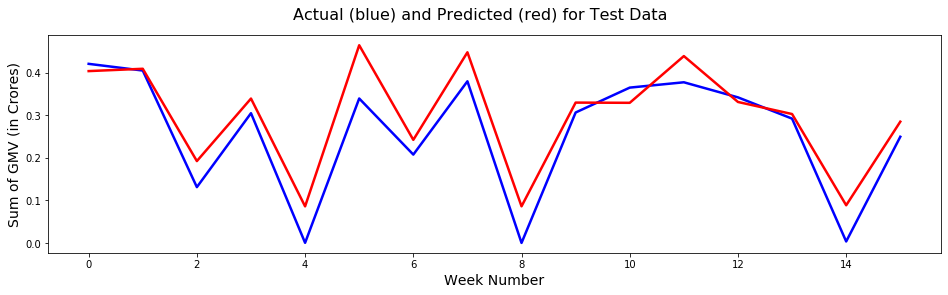

In [214]:
# Fitting Model
model = linear_model.Ridge(5.0)
model.fit(X_gaming_accessory_train[selected_predictors],y_gaming_accessory_train)

# Predicting on train and test dataset
y_train_pred = model.predict(X_gaming_accessory_train[selected_predictors])
r_square_train = r2_score(y_gaming_accessory_train, y_train_pred)
y_test_pred = model.predict(X_gaming_accessory_test[selected_predictors])
r_square_test = r2_score(y_gaming_accessory_test, y_test_pred)

# Plotting actual vs. predicted for test dataset
plot_actual_predicted(y_gaming_accessory_test.values, y_test_pred)

# Computing Adjusted R Square
k = len(list(model.coef_))
adj_r_square_train = 1-(1-r_square_train)*(y_gaming_accessory_train.size-1)/(y_gaming_accessory_train.size-k-1)
adj_r_square_test = 1-(1-r_square_test)*(y_gaming_accessory_test.size-1)/(y_gaming_accessory_test.size-k-1)

# Printing the Equation
predictors = sorted(list(zip(model.coef_,selected_predictors)),reverse=True, key=lambda x:abs(x[0]))
equation = []
for coff, var in predictors:
    equation.append(f'({coff:.02f})*{var}')
print(f'GMV = {" + ".join(equation)}')

# Displaying the metrics score
print(f'\nTRAINING DATASET\nR-Square: \t\t{r_square_train} \nAdjusted R-Square: \t{adj_r_square_train}')
print(f'\nTEST DATASET\nR-Square: \t\t{r_square_test} \nAdjusted R-Square: \t{adj_r_square_test}')

## 10. Summarizing Model Result & Recommendation

### 10.1 Model Result & Recommendation for subcategory Camera Accessory

1. We choose Simple Linear Additive Model for Camera Accessory since it does have high R-square and high Adjuster R-square values. It does generalizes well on test dataset.
2. We also choose Distributed Lag (Additive) Model for Camera Accessory  as alternate model since it does have high R-square and high Adjuster R-square values. It does generalizes well on test dataset.
3. As per our analysis, SEM (Media Investment) is most effective for Camera Accessory.
4. As per our analysis, Affiliate (Media Investment) is also effective for Camera Accessory.
5. In general, both luxury as well as mass products are contributing in GMV, however, we may prioritize sale of luxury products since their contribution to GMV is higher.

### 10.2 Model Result & Recommendation for subcategory Home Audio

1. We choose Simple Linear Additive Model for Home Audio since it does have high R-square and high Adjuster R-square values. It does generalizes well on test dataset.
2. We also choose Distributed Lag (Additive) Model for Home Audio  as alternate model since it does have high R-square and high Adjuster R-square values. It does generalizes well on test dataset.
3. As per our analysis, Digital (Media Investment) is most effective for Home Audio.
4. As per our analysis, Online Marketing (Media Investment) is also effective for Home Audio.
5. In general, both luxury as well as mass products are contributing in GMV, however, we may prioritize sale of luxury products since their contribution to GMV is higher.

### 10.3 Model Result & Recommendation for subcategory Gaming Accessory

1. We choose Simple Linear Additive Model for Gaming Accessory since it does have high R-square and high Adjuster R-square values. It does generalizes well on test dataset.
2. We also choose Distributed Lag (Additive) Model for Gaming Accessory  as alternate model since it does have high R-square and high Adjuster R-square values. It does generalizes well on test dataset.
3. As per our analysis, Online Marketing (Media Investment) is most effective for Gaming Accessory.
4. As per our analysis, Digital (Media Investment) is also effective for Gaming Accessory.
5. As per our analysis, Content Marketing (Media Investment) is also effective for Gaming Accessory.
6. In general, both luxury as well as mass products are contributing in GMV, however, we may prioritize sale of luxury products since their contribution to GMV is higher.